In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy as sci

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
codontable_standard = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W',
    }

def convert_dict_to_aa(codon_dict):
    
    aa_dict_of_dicts = {}
    
    for pos in list(codon_dict.keys()):
        
        aa_dict_of_dicts[pos] = {}
        #print(pos)
        
        n_codons_detected_dict={}
        
        for codon in list(codon_dict[pos].keys()):            
            #print(codon)
            
            aa = codontable_standard[codon]
            #print(aa_dict_of_dicts[pos])
            
            if np.isnan(codon_dict[pos][codon]) == False:
            
                if aa in list(aa_dict_of_dicts[pos].keys()):           
                    aa_dict_of_dicts[pos][aa] += codon_dict[pos][codon]
                    n_codons_detected_dict[aa] +=1

                else:
                    aa_dict_of_dicts[pos][aa] = codon_dict[pos][codon]
                    n_codons_detected_dict[aa] =1
                    
        for aa in list(n_codons_detected_dict.keys()):
            
            n_codons_detected = n_codons_detected_dict[aa]
            
            aa_dict_of_dicts[pos][aa] = aa_dict_of_dicts[pos][aa]/float(n_codons_detected)
                
    return aa_dict_of_dicts






In [3]:
data = pd.read_csv('annotated_df_v5.tsv', sep='\t', index_col=0)
data_df = pd.read_csv('annotated_df_v5.tsv', sep='\t', index_col=0)

In [4]:
data_df.columns

Index(['codon', 'wt', 'measured', 'CY_1', 'CY_1_R1', 'CY_1_MAD_1', 'CY_1_R2',
       'CY_1_MAD_2', 'FC_1', 'FC_1_R1', 'FC_1_MAD_1', 'FC_1_R2', 'FC_1_MAD_2',
       'CY_2', 'CY_2_R1', 'CY_2_MAD_1', 'CY_2_R2', 'CY_2_MAD_2', 'FC_2',
       'FC_2_R1', 'FC_2_MAD_1', 'FC_2_R2', 'FC_2_MAD_2', 'FC_CY_2',
       'FC_CY_2_R1', 'FC_CY_2_MAD_1', 'FC_CY_2_R2', 'FC_CY_2_MAD_2', 'CY_3',
       'CY_3_R1', 'CY_3_MAD_1', 'CY_3_R2', 'CY_3_MAD_2', 'FC_3', 'FC_3_R1',
       'FC_3_MAD_1', 'FC_3_R2', 'FC_3_MAD_2', 'CY_1_to_2', 'CY_3_to_2',
       'FC_1_to_2', 'FC_3_to_2', 'CY_123', 'FC_123', 'CY_score', 'FC_score',
       'FC_CY_score', 'interface', 'ddG_struc_HET', 'ddG_struc_HM',
       'ddG_inter_HET', 'ddG_inter_HM', 'r4s_score', 'RSA', 'temp',
       'ortholog_aa_freq', 'dist_act_site'],
      dtype='object')

In [5]:
select_wt = data['wt'] == data['measured']

select_stop = data['measured'] == '*'

select_F2 = data['codon'].isin(range(49,111))

In [6]:
ref_seq = "ATGGTTACCGGTGGTATGGCTTCTAAATGGGACCAAAAAGGTATGGACATTGCTTACGAAGAAGCTGCTTTGGGTTACAAGGAAGGTGGTGTTCCAATCGGTGGTTGTTT"\
          "GATCAACAACAAGGATGGTTCCGTCTTAGGTAGAGGTCACAACATGAGATTCCAAAAGGGTTCTGCCACTCTACATGGCGAAATCTCTACTTTGGAAAACTGTGGTAGAT"\
          "TGGAAGGTAAGGTCTATAAGGACACCACCTTGTACACTACTTTGTCACCATGCGACATGTGTACTGGTGCCATTATTATGTACGGTATCCCAAGATGTGTCGTCGGTGAA"\
          "AATGTTAACTTCAAGTCCAAGGGTGAAAAGTACTTGCAAACCAGAGGTCACGAAGTTGTTGTCGTTGATGACGAAAGATGTAAGAAGATCATGAAGCAATTTATTGATGA"\
          "ACGTCCACAAGACTGGTTCGAAGATATTGGTGAA"

dict_of_wt = {}

for codon in range(0,157):
    
    pos_1 = ((codon+1)*3)
    pos_2 = ((codon+1)*3)+1
    pos_3 = ((codon+1)*3)+2
    
    wt = ref_seq[pos_1]+ref_seq[pos_2]+ref_seq[pos_3]
    
    dict_of_wt[(codon+2)] = wt
    
print(dict_of_wt)
#now we have the whole thing in one place

{2: 'GTT', 3: 'ACC', 4: 'GGT', 5: 'GGT', 6: 'ATG', 7: 'GCT', 8: 'TCT', 9: 'AAA', 10: 'TGG', 11: 'GAC', 12: 'CAA', 13: 'AAA', 14: 'GGT', 15: 'ATG', 16: 'GAC', 17: 'ATT', 18: 'GCT', 19: 'TAC', 20: 'GAA', 21: 'GAA', 22: 'GCT', 23: 'GCT', 24: 'TTG', 25: 'GGT', 26: 'TAC', 27: 'AAG', 28: 'GAA', 29: 'GGT', 30: 'GGT', 31: 'GTT', 32: 'CCA', 33: 'ATC', 34: 'GGT', 35: 'GGT', 36: 'TGT', 37: 'TTG', 38: 'ATC', 39: 'AAC', 40: 'AAC', 41: 'AAG', 42: 'GAT', 43: 'GGT', 44: 'TCC', 45: 'GTC', 46: 'TTA', 47: 'GGT', 48: 'AGA', 49: 'GGT', 50: 'CAC', 51: 'AAC', 52: 'ATG', 53: 'AGA', 54: 'TTC', 55: 'CAA', 56: 'AAG', 57: 'GGT', 58: 'TCT', 59: 'GCC', 60: 'ACT', 61: 'CTA', 62: 'CAT', 63: 'GGC', 64: 'GAA', 65: 'ATC', 66: 'TCT', 67: 'ACT', 68: 'TTG', 69: 'GAA', 70: 'AAC', 71: 'TGT', 72: 'GGT', 73: 'AGA', 74: 'TTG', 75: 'GAA', 76: 'GGT', 77: 'AAG', 78: 'GTC', 79: 'TAT', 80: 'AAG', 81: 'GAC', 82: 'ACC', 83: 'ACC', 84: 'TTG', 85: 'TAC', 86: 'ACT', 87: 'ACT', 88: 'TTG', 89: 'TCA', 90: 'CCA', 91: 'TGC', 92: 'GAC', 93: 'A

In [7]:
aa_order=['*', 'G','A','V', 'L', 'I', 'M', 'C', 'P', 'W', 'F', 'Y', 'S', 'T', 'N', 'Q', 'H', 'K', 'R', 'D', 'E']
len(aa_order)

21

In [8]:
def get_aa_df_all(df, df_col):
    
    dict_of_dict={}
    
    for codon in range(2,159):
        
        codon_dict = {}
        
        for aa in range(0,21):
            
            key_aa = aa_order[aa]
            
            val_filter = (df['codon']==codon)&(df['measured']==key_aa)
            
            codon_dict[key_aa] = float(list(df[val_filter][df_col])[0])
            
        dict_of_dict[codon] = codon_dict
        
    return pd.DataFrame(dict_of_dict)
            
df_CY = get_aa_df_all(data, 'CY_score')
df_FC = get_aa_df_all(data, 'FC_score')

<AxesSubplot:>

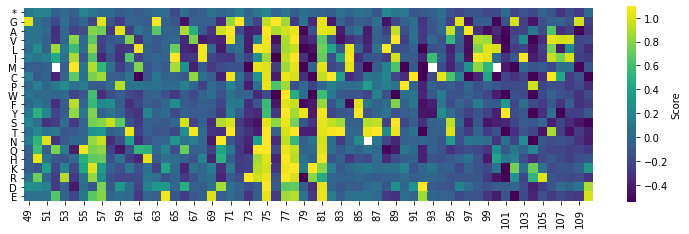

In [9]:
plt.figure(figsize=(12,8))
df_CY_F2= df_CY[[x for x in range(49,111)]]

sns.heatmap(df_CY_F2, square=True, robust=True, cmap='viridis', cbar_kws={'label': 'Score', 'fraction':0.10, 
                                                                         'shrink':0.45})

<AxesSubplot:>

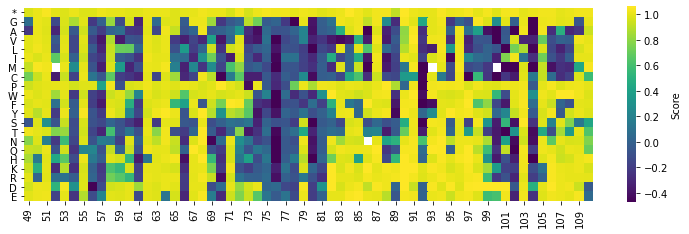

In [10]:
plt.figure(figsize=(12,8))
df_FC_F2= df_FC[[x for x in range(49,111)]]

sns.heatmap(df_FC_F2, square=True, robust=True, cmap='viridis', cbar_kws={'label': 'Score', 'fraction':0.10, 
                                                                         'shrink':0.45})

In [13]:
colors=sns.color_palette("hls", 3)

In [14]:
def f_type(x, y, thresholds=[(0.4, 0.5), (0.5,0.5), (0.1,0.1)]):
    
    if x >=thresholds[0][0] and y<thresholds[0][1]:
        mut_type = 'Wt-like'

    elif x <thresholds[1][0] and y>=thresholds[1][1]:
        mut_type = 'Nonsense-like'

    elif x <thresholds[2][0] and y<thresholds[2][1]:
        mut_type = 'Elbow'
        
    else:
        mut_type='other'
    
    return mut_type

data_df['mut_type'] = data_df.apply(lambda x: f_type(x['CY_score'], x['FC_score']), axis=1)

data_df['mut_type']

0         Elbow
1       Wt-like
2       Wt-like
3       Wt-like
4       Wt-like
         ...   
3292    Wt-like
3293    Wt-like
3294    Wt-like
3295    Wt-like
3296    Wt-like
Name: mut_type, Length: 3297, dtype: object

Text(0, 0.5, 'Fitness in 5-FC')

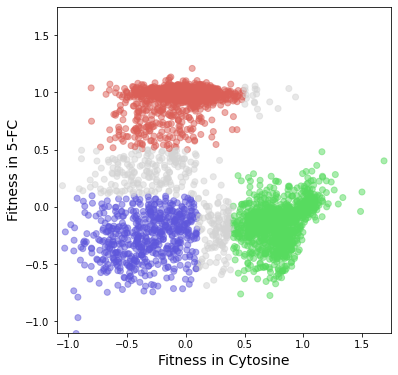

In [15]:
plt.figure(figsize=(6,6))

mut_colors = {'Wt-like':colors[1], 'Nonsense-like':colors[0], 'Elbow':colors[2], 'other':'lightgrey'}


plt.scatter(data_df['CY_score'], data_df['FC_score'], c=data_df['mut_type'].map(mut_colors), alpha=0.5)


plt.xlim(-1.1, 1.75)
plt.ylim(-1.1, 1.75)

plt.xlabel('Fitness in Cytosine', fontsize=14)
plt.ylabel('Fitness in 5-FC', fontsize=14)



In [16]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Greys')

0.75**3


0.421875

In [17]:
near=cmap(0.75**3)

Text(483.0, 0.5, 'Amino Acid')

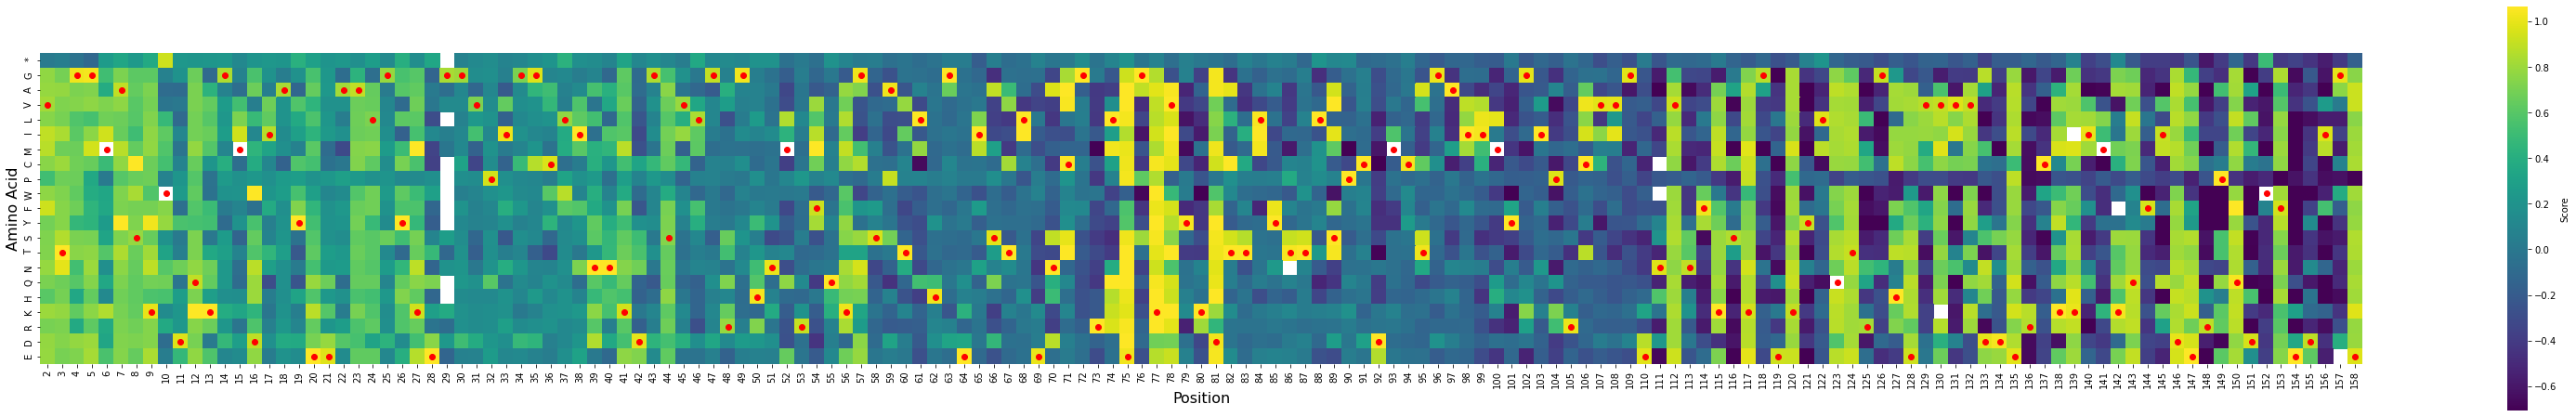

In [18]:
plt.figure(figsize=(56,8))

sns.heatmap(df_CY, square=True, cmap='viridis', cbar_kws={'label': 'Score'}, robust=True)

for codon in range(0,len(df_CY.columns)):
    x_pos = codon+0.5
    # set x coordinates of the annotation. 0.5 increments place the dots in the middle of the squares

    codon_n = int(list(df_CY.columns)[codon])
    # get the codon number in integer format

    seq = dict_of_wt[codon_n]
    # get the dna sequence of this codon number

    y_pos = (aa_order.index(codontable_standard[seq]))+0.5
    # get y coordinates based on the order in in which amino acids are (the df index or a custom order if it has been changed)
    # 0.5 increments again to be in the center of the squares

    plt.plot(x_pos, y_pos, 'ro')



plt.xlabel('Position', fontsize=16)
plt.ylabel('Amino Acid', fontsize=16)

Text(0.5, 0, 'Median 5-FC score')

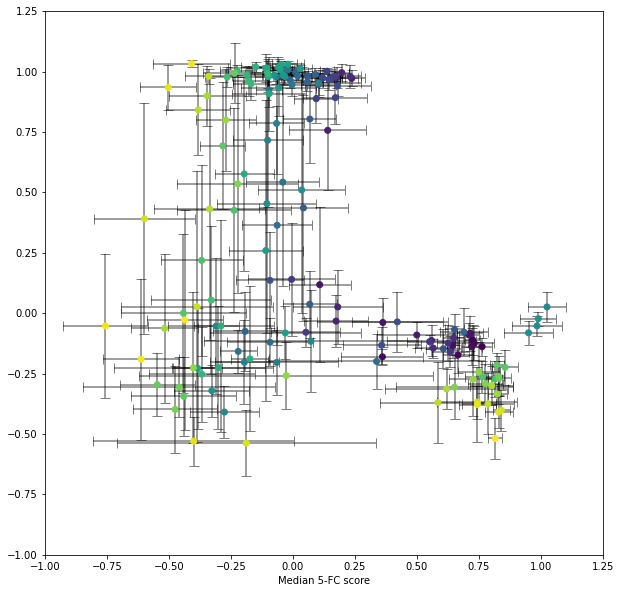

In [19]:
plt.figure(figsize=(10,10))
stop = data_df['measured'] == '*'
wt = data_df['measured'] == data_df['wt']
nonsense = data_df[(stop) & (data_df['codon'].isin([2,3,4,5,158]) == False)]
silent = data_df[wt]
missense = data_df[(~stop)&(~wt)]

CY_medians = []
CY_mads = []
FC_medians = []
FC_mads = []
for x in range(2,159):
    codon_rows = missense['codon'] == x
    
    average_score_CY = np.nanmedian(missense[codon_rows]['CY_score'])
    CY_medians.append(average_score_CY)
    mad_CY = stats.median_abs_deviation(missense[codon_rows]['CY_score'], nan_policy='omit')
    CY_mads.append(mad_CY)
    
    average_score_FC = np.nanmedian(missense[codon_rows]['FC_score'])
    FC_medians.append(average_score_FC)
    mad_FC = stats.median_abs_deviation(missense[codon_rows]['FC_score'], nan_policy='omit')
    FC_mads.append(mad_FC)
    
plt.errorbar(x=CY_medians, y=FC_medians, xerr=CY_mads, yerr=FC_mads, marker='', color='white', 
             linestyle='none', capsize=5, ecolor='k', zorder=3, alpha=0.5)

plt.scatter(CY_medians, FC_medians, c=range(0,157), zorder=6, alpha=1)


plt.xlim(-1,1.25)
plt.ylim(-1,1.25)

plt.xlabel('Median cytosine score')
plt.xlabel('Median 5-FC score')

In [20]:
colors=sns.color_palette("hls", 3)

In [21]:
colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.3712, 0.33999999999999997, 0.86)]

In [22]:
validations_result_hap = pd.read_csv('validations_table_v4.csv', index_col=0, sep=',')

validations_result_hap.loc[1770, ['hap_cy_average']] = np.NaN
validations_result_hap

codon wt measured     mtx1     mtx2    dmso1    dmso2  mtx_average  \
136       8  S        F      NaN      NaN      NaN      NaN          NaN   
168      10  W        *      NaN      NaN      NaN      NaN          NaN   
227      12  Q        K      NaN      NaN      NaN      NaN          NaN   
261      14  G        W  0.01380  0.01360  0.21628  0.21208       0.0137   
263      14  G        Y  0.01388  0.01552  0.20184  0.20676       0.0147   
...     ... ..      ...      ...      ...      ...      ...          ...   
3233    155  D        E      NaN      NaN      NaN      NaN          NaN   
3249    156  I        Q      NaN      NaN      NaN      NaN          NaN   
3250    156  I        H      NaN      NaN      NaN      NaN          NaN   
3274    157  G        D      NaN      NaN      NaN      NaN          NaN   
3275    157  G        E      NaN      NaN      NaN      NaN          NaN   

      dmso_average  hap_fc_1  ...  hap_cy_2  hap_fc_average  hap_cy_average  \
136            NaN       NaN  ...       NaN             NaN             NaN   
168            NaN       NaN  ...       NaN             NaN             NaN   
227            NaN       NaN  ...       NaN             NaN             NaN   
261        0.21418   0.20784  ...   0.01068         0.20750         0.01094   
263        0.20430   0.16984  ...   0.03208         0.16960         0.03144   
...            ...       ...  ...       ...             ...             ...   
3233           NaN       NaN  ...       NaN             NaN             NaN   
3249           NaN   0.14988  ...   0.01560         0.15884         0.01588   
3250           NaN   0.16264  ...   0.02148         0.15546         0.02130   
3274           NaN   0.21184  ...   0.01008         0.20648         0.01174   
3275           NaN   0.18588  ...   0.01172         0.20662         0.01578   

      2nd_batch_FC  2nd_batch_CY  adjusted_2nd_batch_FC  \
136            NaN           NaN                    NaN   
168       0.111533      0.002547               0.219011   
227       0.049200      0.086733               0.126145   
261            NaN           NaN                    NaN   
263            NaN           NaN                    NaN   
...            ...           ...                    ...   
3233      0.100987      0.004160               0.203298   
3249           NaN           NaN                    NaN   
3250           NaN           NaN                    NaN   
3274           NaN           NaN                    NaN   
3275      0.110747      0.003067               0.217839   

      adjusted_2nd_batch_CY  combined_hap_fc  combined_hap_cy  escape_outlier  
136                     NaN              NaN              NaN              No  
168                0.016087         0.219011         0.016087             Yes  
227                0.139102         0.126145         0.139102             Yes  
261                     NaN         0.207500         0.010940              No  
263                     NaN         0.169600         0.031440              No  
...                     ...              ...              ...             ...  
3233               0.018444         0.203298         0.018444             Yes  
3249                    NaN         0.158840         0.015880              No  
3250                    NaN         0.155460         0.021300              No  
3274                    NaN         0.206480         0.011740             Yes  
3275               0.016846         0.212229         0.016313              No  

[95 rows x 22 columns]

In [24]:
data_df.columns

Index(['codon', 'wt', 'measured', 'CY_1', 'CY_1_R1', 'CY_1_MAD_1', 'CY_1_R2',
       'CY_1_MAD_2', 'FC_1', 'FC_1_R1', 'FC_1_MAD_1', 'FC_1_R2', 'FC_1_MAD_2',
       'CY_2', 'CY_2_R1', 'CY_2_MAD_1', 'CY_2_R2', 'CY_2_MAD_2', 'FC_2',
       'FC_2_R1', 'FC_2_MAD_1', 'FC_2_R2', 'FC_2_MAD_2', 'FC_CY_2',
       'FC_CY_2_R1', 'FC_CY_2_MAD_1', 'FC_CY_2_R2', 'FC_CY_2_MAD_2', 'CY_3',
       'CY_3_R1', 'CY_3_MAD_1', 'CY_3_R2', 'CY_3_MAD_2', 'FC_3', 'FC_3_R1',
       'FC_3_MAD_1', 'FC_3_R2', 'FC_3_MAD_2', 'CY_1_to_2', 'CY_3_to_2',
       'FC_1_to_2', 'FC_3_to_2', 'CY_123', 'FC_123', 'CY_score', 'FC_score',
       'FC_CY_score', 'interface', 'ddG_struc_HET', 'ddG_struc_HM',
       'ddG_inter_HET', 'ddG_inter_HM', 'r4s_score', 'RSA', 'temp',
       'ortholog_aa_freq', 'dist_act_site', 'mut_type'],
      dtype='object')

In [161]:
missense['CY_score']

1       0.768967
2       0.788358
4       0.743511
5       0.893553
6       0.877108
          ...   
3291    0.832248
3292    0.815396
3293    0.977290
3294    0.786936
3295    0.792971
Name: CY_score, Length: 2983, dtype: float64

In [25]:
CY_score_dict = {}
FC_score_dict = {}
FC_CY_score_dict = {}

struct_ddg_dict={}

inter_ddg_dict={}

inter_ddg_HM = {}


for mutant in list(validations_result_hap.index):
    
    CY_score = data_df.loc[mutant]['CY_score']
    CY_score_dict[mutant] = CY_score
    
    FC_score = data_df.loc[mutant]['FC_score']
    FC_score_dict[mutant] = FC_score
    
    FC_CY_score = data_df.loc[mutant]['FC_CY_score']
    FC_CY_score_dict[mutant] = FC_CY_score
    
    struct_ddg = data_df.loc[mutant]['ddG_struc_HET']
    struct_ddg_dict[mutant] = struct_ddg
    
    inter_ddg = data_df.loc[mutant]['ddG_inter_HET']
    inter_ddg_dict[mutant] = inter_ddg
    
    inter_ddg_hm = data_df.loc[mutant]['ddG_inter_HM']
    inter_ddg_HM[mutant] = inter_ddg_hm
    
    
validations_result_hap['CY_score'] = pd.Series(CY_score_dict)
validations_result_hap['FC_score'] = pd.Series(FC_score_dict)
validations_result_hap['FC_CY_score'] = pd.Series(FC_CY_score_dict)

validations_result_hap['ddG_struc_HET'] = pd.Series(struct_ddg_dict)
validations_result_hap['ddG_inter_HET'] = pd.Series(inter_ddg_dict)
validations_result_hap['ddG_inter_HM'] = pd.Series(inter_ddg_dict)



validations_result_hap.columns

Index(['codon', 'wt', 'measured', 'mtx1', 'mtx2', 'dmso1', 'dmso2',
       'mtx_average', 'dmso_average', 'hap_fc_1', 'hap_fc_2', 'hap_cy_1',
       'hap_cy_2', 'hap_fc_average', 'hap_cy_average', '2nd_batch_FC',
       '2nd_batch_CY', 'adjusted_2nd_batch_FC', 'adjusted_2nd_batch_CY',
       'combined_hap_fc', 'combined_hap_cy', 'escape_outlier', 'CY_score',
       'FC_score', 'FC_CY_score', 'ddG_struc_HET', 'ddG_inter_HET',
       'ddG_inter_HM'],
      dtype='object')

/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  This is separate from the ipykernel package so we can avoid doing imports until


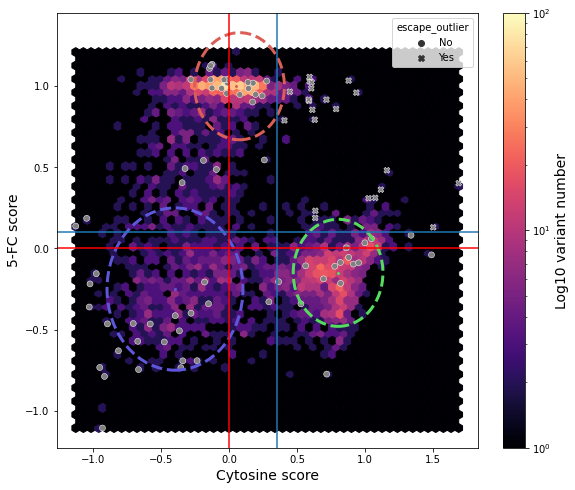

In [27]:
fig, axes = plt.subplots(figsize=(9,8))

hb = plt.hexbin(data_df['CY_score'], data_df['FC_score'], gridsize=50, bins='log', vmax=100, cmap='magma')

plt.plot([0.05], [1], c=colors[0], marker='o', ms=2)
axes.add_patch(plt.Circle((0.075, 1), 0.33, color=colors[0], fill=False, lw=3, ls='--'))

plt.plot([0.80], [-0.15], c=colors[1], marker='o', ms=2)
axes.add_patch(plt.Circle((0.80, -0.15), 0.33, color=colors[1], fill=False, lw=3, ls='--'))


plt.plot([-0.40], [-0.25], c=colors[2], marker='o', ms=2)
axes.add_patch(plt.Circle((-0.40, -0.25), 0.50, color=colors[2], fill=False, lw=3, ls='--'))
    
cb = fig.colorbar(hb, ax=axes, fraction=1/9)
cb.set_label('Log10 variant number', fontsize=14)
cb.set_ticks([1,10,100])

plt.xlabel('Cytosine score', fontsize=14)
plt.ylabel('5-FC score', fontsize=14)

sns.scatterplot(data=validations_result_hap, x='CY_score', y='FC_score', color='grey', style='escape_outlier')

plt.axvline(0.35)
plt.axhline(0.1)

plt.axvline(0, color='red')
plt.axhline(0, color='red')

In [28]:
def check_centroid_dist(data_coord, center, r=0.25):
    
    dist_center = np.sqrt((np.abs(data_coord[0]-center[0])**2)+(np.abs(data_coord[1]-center[1])**2))
    
    if dist_center <=r:
        return 1
    else:
        return 0

In [29]:
validations_result_hap.columns

Index(['codon', 'wt', 'measured', 'mtx1', 'mtx2', 'dmso1', 'dmso2',
       'mtx_average', 'dmso_average', 'hap_fc_1', 'hap_fc_2', 'hap_cy_1',
       'hap_cy_2', 'hap_fc_average', 'hap_cy_average', '2nd_batch_FC',
       '2nd_batch_CY', 'adjusted_2nd_batch_FC', 'adjusted_2nd_batch_CY',
       'combined_hap_fc', 'combined_hap_cy', 'escape_outlier', 'CY_score',
       'FC_score', 'FC_CY_score', 'ddG_struc_HET', 'ddG_inter_HET',
       'ddG_inter_HM'],
      dtype='object')

/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  This is separate from the ipykernel package so we can avoid doing imports until


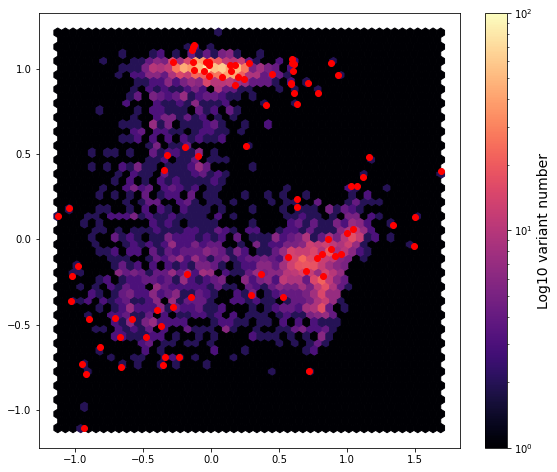

In [30]:
fig, axes = plt.subplots(figsize=(9,8))

hb = plt.hexbin(data_df['CY_score'], data_df['FC_score'], gridsize=50, bins='log', vmax=100, cmap='magma')
cb = fig.colorbar(hb, ax=axes, fraction=1/9)
cb.set_label('Log10 variant number', fontsize=14)
cb.set_ticks([1,10,100])

plt.scatter(validations_result_hap['CY_score'], validations_result_hap['FC_score'], color='red')

Text(0, 0.5, 'MTX growth rate (OD/h) R2')

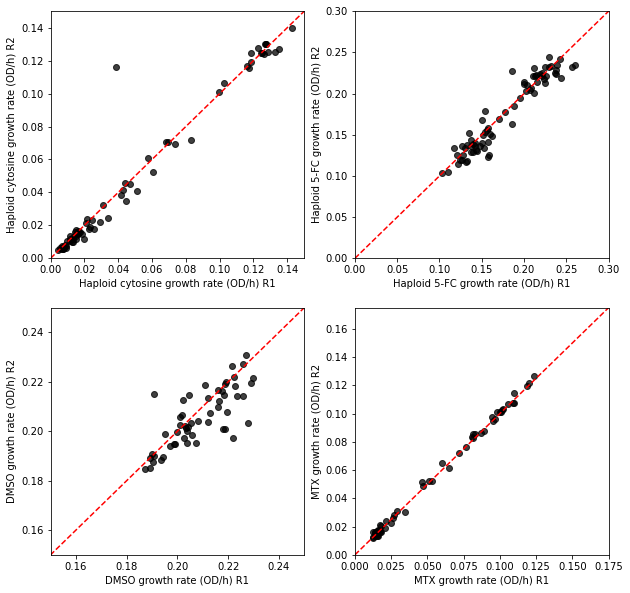

In [31]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.plot(validations_result_hap['hap_cy_1'], validations_result_hap['hap_cy_2'], 'ko', alpha=0.75)
plt.xlim(0,0.15)
plt.ylim(0,0.15)
plt.plot([0,1], [0,1], 'r--')

plt.xlabel('Haploid cytosine growth rate (OD/h) R1')
plt.ylabel('Haploid cytosine growth rate (OD/h) R2')



plt.subplot(222)
plt.plot(validations_result_hap['hap_fc_1'], validations_result_hap['hap_fc_2'], 'ko', alpha=0.75)
plt.xlim(0,0.30)
plt.ylim(0,0.30)
plt.plot([0,1], [0,1], 'r--')

plt.xlabel('Haploid 5-FC growth rate (OD/h) R1')
plt.ylabel('Haploid 5-FC growth rate (OD/h) R2')


plt.subplot(223)

plt.plot(validations_result_hap['dmso1'], validations_result_hap['dmso2'], 'ko', alpha=0.75)

plt.xlim(0.15,0.25)
plt.ylim(0.15,0.25)
plt.plot([0,1], [0,1], 'r--')

plt.xlabel('DMSO growth rate (OD/h) R1')
plt.ylabel('DMSO growth rate (OD/h) R2')


plt.subplot(224)

plt.plot(validations_result_hap['mtx1'], validations_result_hap['mtx2'], 'ko', alpha=0.75)


plt.xlim(0,0.175)
plt.ylim(0,0.175)
plt.plot([0,1], [0,1], 'r--')

plt.xlabel('MTX growth rate (OD/h) R1')
plt.ylabel('MTX growth rate (OD/h) R2')


In [67]:
mut_type_dict = {}

for mutant in list(validations_result_hap.index):
    
    x_coord = validations_result_hap.loc[mutant]['CY_score']
    y_coord = validations_result_hap.loc[mutant]['FC_score']
    
    if check_centroid_dist((x_coord, y_coord), (0.075, 1), r=0.33) ==1:
        
        mut_type_dict[mutant] = 'Nonsense-like'
        
    elif check_centroid_dist((x_coord, y_coord), (0.80, -0.15), r=0.33) ==1:
        
        mut_type_dict[mutant] = 'Silent-like'
        
    elif x_coord<=0 and y_coord <=0:
        
        mut_type_dict[mutant] = 'Front minima'
        
    else:
        
        mut_type_dict[mutant] = 'Other'
        
validations_result_hap['Mutation cluster'] = pd.Series(mut_type_dict)

validations_result_hap.columns

Index(['codon', 'wt', 'measured', 'mtx1', 'mtx2', 'dmso1', 'dmso2',
       'mtx_average', 'dmso_average', 'hap_fc_1', 'hap_fc_2', 'hap_cy_1',
       'hap_cy_2', 'hap_fc_average', 'hap_cy_average', '2nd_batch_FC',
       '2nd_batch_CY', 'adjusted_2nd_batch_FC', 'adjusted_2nd_batch_CY',
       'combined_hap_fc', 'combined_hap_cy', 'escape_outlier', 'CY_score',
       'FC_score', 'FC_CY_score', 'ddG_struc_HET', 'ddG_inter_HET',
       'ddG_inter_HM', 'Mutation cluster', 'log_hap_cy', 'log_hap_fc',
       'ddg_product'],
      dtype='object')

In [35]:
len(validations_result_hap['combined_hap_fc'].dropna()),len(validations_result_hap['combined_hap_cy'].dropna())

(88, 87)

In [73]:
validations_result_hap[validations_result_hap['combined_hap_fc']>0]['Mutation cluster'].value_counts()

Other            42
Front minima     21
Nonsense-like    17
Silent-like       8
Name: Mutation cluster, dtype: int64

In [74]:
validations_result_hap['log_hap_cy'] = np.log2(validations_result_hap['combined_hap_cy'])
validations_result_hap['log_hap_fc'] = np.log2(validations_result_hap['combined_hap_fc'])

validations_result_hap.loc[1770, ['log_hap_fc']] = np.NaN

validations_result_hap['log_hap_fc'].max()

-2.0163660792668785

In [75]:
validations_result_hap['log_hap_fc'].min()

-3.214909845005243

In [76]:
slope, inter, rval, pval, std_slope = stats.linregress(validations_result_hap['log_hap_fc'].dropna(), 
                                                 validations_result_hap['log_hap_cy'].dropna())

slope, inter, rval, pval, std_slope

(-3.7282554404658197,
 -14.581044196792774,
 -0.8987001806446225,
 3.580326738457651e-32,
 0.19733944376666165)

In [77]:
(-0.8974029333606486)**2

0.8053320248042967

In [78]:
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(validations_result_hap['log_hap_fc'].dropna())-2)

In [79]:
print(f"slope (95%): {slope:.6f} +/- {ts*std_slope:.6f}")


slope (95%): -3.728255 +/- 0.392364


/home/phil/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


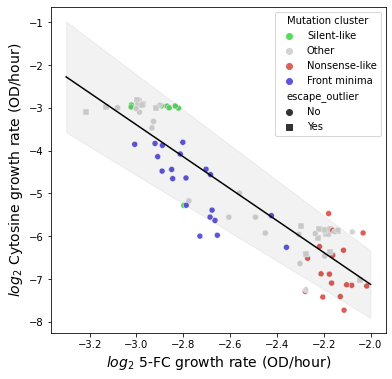

In [80]:
plt.figure(figsize=(6,6))

xrange = np.linspace(-3.3, -2.0, 100)

sns.scatterplot(data=validations_result_hap, y='log_hap_cy', x='log_hap_fc', hue='Mutation cluster',
            palette = mut_colors, style = 'escape_outlier', markers=['o', 's'])

plt.plot(xrange, ((xrange*slope)+inter),  'k-')

plt.fill_between(xrange, ((xrange*(slope+(ts*std_slope)))+inter), ((xrange*(slope-(ts*std_slope)))+inter), color='k', alpha=0.05)
#plt.plot(xrange, ((xrange*(slope+(ts*std_slope)))+inter) ,'k-', alpha=0.15)
#plt.plot(xrange, ((xrange*(slope-(ts*std_slope)))+inter), 'k-', alpha=0.15)

plt.xlabel('$log_2$ 5-FC growth rate (OD/hour)', fontsize=14)
plt.ylabel('$log_2$ Cytosine growth rate (OD/hour)', fontsize=14)

plt.savefig('./figures/vals_loglog_cyx_fcy.svg', format='svg', dpi=300)

In [81]:
10**-4.486457640934798

3.262438691531585e-05

In [82]:
2**-14.903689683943384

3.262438691531587e-05

In [83]:
def front(x,a,k):
    return (a)*(x**-k)

In [84]:
stats.spearmanr(validations_result_hap['combined_hap_fc'], validations_result_hap['combined_hap_cy'], nan_policy='omit')

SpearmanrResult(correlation=-0.8507092053252507, pvalue=1.8304713856672226e-25)

In [85]:
validations_result_hap['combined_hap_cy'].dropna()

168     0.016087
227     0.139102
261     0.010940
263     0.031440
345     0.008500
          ...   
3233    0.018444
3249    0.015880
3250    0.021300
3274    0.011740
3275    0.016313
Name: combined_hap_cy, Length: 87, dtype: float64

/home/phil/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


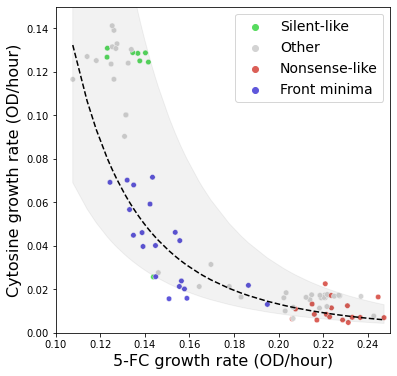

In [86]:
plt.figure(figsize=(6,6))

x_vals = validations_result_hap['combined_hap_fc'].dropna()
y_vals = validations_result_hap['combined_hap_cy'].dropna()


colors=sns.color_palette("hls", 3)
mut_colors = {'Silent-like':colors[1], 'Nonsense-like':colors[0], 'Front minima':colors[2], 'Other':'lightgrey'}


sns.scatterplot(data=validations_result_hap, x='combined_hap_fc', y='combined_hap_cy', hue='Mutation cluster',
            palette = mut_colors, s=30)


plt.plot(sorted(list(x_vals)), front(sorted(list(x_vals)), *np.array([(10**-4.48646), 3.72825])), 'k--')


lower_y = front(sorted(list(x_vals)), *np.array([2**(-14.5810), (3.72825-(ts*std_slope))]))
upper_y = front(sorted(list(x_vals)), *np.array([2**(-14.5810), (3.72825+(ts*std_slope))]))

plt.fill_between(sorted(list(x_vals)), lower_y, upper_y, color='k', alpha=0.05)




#plt.text(0.18, 0.075, '$y=0.0000326*x^{-3.82}$\n'+r'$R^{2}=0.805$', fontsize=14)
plt.ylim(0,0.15)
plt.xlim(0.10,0.25)

plt.xlabel('5-FC growth rate (OD/hour)', fontsize=16)
plt.ylabel('Cytosine growth rate (OD/hour)', fontsize=16)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=14)

plt.savefig('./figures/treadoff_cy_by_fc.svg', format='svg', dpi=300)

SpearmanrResult(correlation=0.15645377686525422, pvalue=0.2585738491265552)

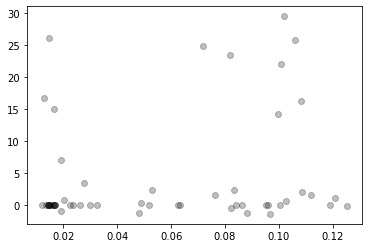

In [87]:
plt.scatter(validations_result_hap['mtx_average'], validations_result_hap['ddG_inter_HM'], color='k', alpha=0.25)
stats.spearmanr(validations_result_hap['mtx_average'], validations_result_hap['ddG_inter_HM'], nan_policy='omit')

SpearmanrResult(correlation=-0.47474747474747475, pvalue=0.00028661736539890804)

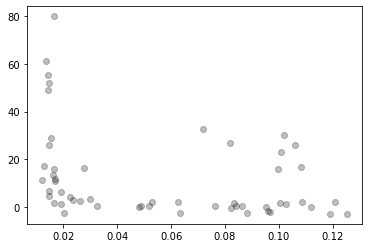

In [88]:
plt.scatter(validations_result_hap['mtx_average'], validations_result_hap['ddG_struc_HET'], color='k', alpha=0.25)
stats.spearmanr(validations_result_hap['mtx_average'], validations_result_hap['ddG_struc_HET'], nan_policy='omit')

In [89]:
validations_result_hap['ddg_product'] = np.sqrt(validations_result_hap['ddG_struc_HET']*validations_result_hap['ddG_struc_HET'])

SpearmanrResult(correlation=-0.4118543929864685, pvalue=0.0019729420709875926)

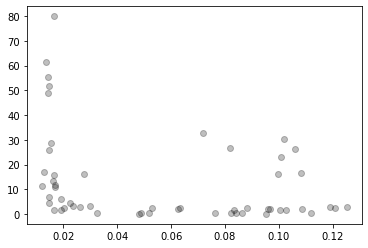

In [90]:
plt.scatter(validations_result_hap['mtx_average'], validations_result_hap['ddg_product'], color='k', alpha=0.25)
stats.spearmanr(validations_result_hap['mtx_average'], validations_result_hap['ddg_product'], nan_policy='omit')

/home/phil/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/phil/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/phil/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

54 54
54 54
54 54
93 54
72 54
73 54


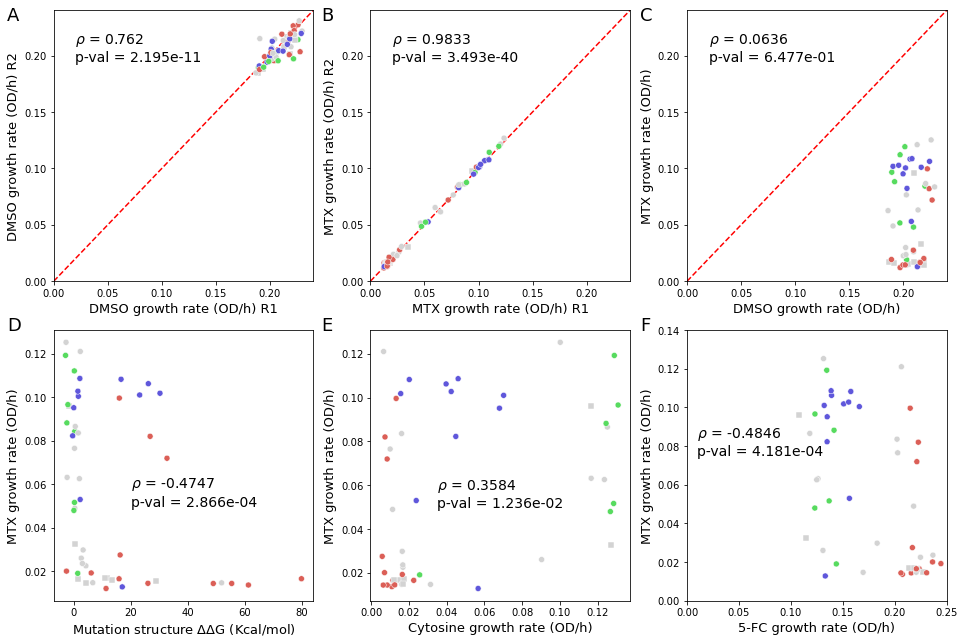

In [91]:

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(4.5*3,9))


############# panel A
sns.scatterplot(data = validations_result_hap, x = 'dmso1', y='dmso2', hue='Mutation cluster', palette = mut_colors, style = 'escape_outlier', markers=['o', 's'],
                legend=False, ax =axs[0,0], zorder=9)


axs[0,0].set_xlim(0,0.24)
axs[0,0].set_ylim(0,0.24)
axs[0,0].plot([0,1], [0,1], 'r--')

axs[0,0].set_xlabel('DMSO growth rate (OD/h) R1', fontsize=13)
axs[0,0].set_ylabel('DMSO growth rate (OD/h) R2', fontsize=13)

rho, pval = stats.spearmanr(validations_result_hap['dmso1'], validations_result_hap['dmso2'], nan_policy='omit')

axs[0,0].text(0.02, 0.195, r'$\rho$ = '+str(round(rho, 4))+'\np-val = '+str(np.format_float_scientific(pval, 3)), fontsize=14)

print(len(validations_result_hap['dmso1'].dropna()), len(validations_result_hap['dmso2'].dropna()))

############## panel B
sns.scatterplot(data = validations_result_hap, x = 'mtx1', y='mtx2', hue='Mutation cluster', style = 'escape_outlier', markers=['o', 's'],
                palette = mut_colors, legend=False, ax =axs[0,1], zorder=9)


axs[0,1].set_xlim(0,0.24)
axs[0,1].set_ylim(0,0.24)
axs[0,1].plot([0,1], [0,1], 'r--')

axs[0,1].set_xlabel('MTX growth rate (OD/h) R1', fontsize=13)
axs[0,1].set_ylabel('MTX growth rate (OD/h) R2', fontsize=13)


rho, pval = stats.spearmanr(validations_result_hap['mtx1'], validations_result_hap['mtx2'], nan_policy='omit')

axs[0,1].text(0.02, 0.195, r'$\rho$ = '+str(round(rho, 4))+'\np-val = '+str(np.format_float_scientific(pval, 3)), fontsize=14)

print(len(validations_result_hap['mtx1'].dropna()), len(validations_result_hap['mtx2'].dropna()))



###################### panel C

sns.scatterplot(data = validations_result_hap, x = 'dmso_average', y='mtx_average', hue='Mutation cluster', palette = mut_colors, 
                style = 'escape_outlier', markers=['o', 's'], legend=False, ax =axs[0,2])


axs[0,2].set_xlim(0,0.24)
axs[0,2].set_ylim(0,0.24)
axs[0,2].plot([0,1], [0,1], 'r--')

axs[0,2].set_xlabel('DMSO growth rate (OD/h)', fontsize=13)
axs[0,2].set_ylabel('MTX growth rate (OD/h)', fontsize=13)


rho, pval = stats.spearmanr(validations_result_hap['dmso_average'], validations_result_hap['mtx_average'], nan_policy='omit')

axs[0,2].text(0.02, 0.195, r'$\rho$ = '+str(round(rho, 4))+'\np-val = '+str(np.format_float_scientific(pval, 3)), fontsize=14)

print(len(validations_result_hap['dmso_average'].dropna()), len(validations_result_hap['mtx_average'].dropna()))


##################### panel D


sns.scatterplot(data = validations_result_hap, x = 'ddG_struc_HET', y='mtx_average', hue='Mutation cluster', palette = mut_colors, 
                style = 'escape_outlier', markers=['o', 's'], legend=False, ax =axs[1,0])

axs[1,0].set_xlabel(r'Mutation structure $\Delta\Delta$G (Kcal/mol)', fontsize=13)
axs[1,0].set_ylabel('MTX growth rate (OD/h)', fontsize=13)

rho, pval = stats.spearmanr(validations_result_hap['ddG_struc_HET'], validations_result_hap['mtx_average'], nan_policy='omit')

axs[1,0].text(20, 0.05, r'$\rho$ = '+str(round(rho, 4))+'\np-val = '+str(np.format_float_scientific(pval, 3)), fontsize=14)

print(len(validations_result_hap['ddG_struc_HET'].dropna()), len(validations_result_hap['mtx_average'].dropna()))


#################### Panel E


sns.scatterplot(data = validations_result_hap, x = 'combined_hap_cy', y='mtx_average', hue='Mutation cluster', palette = mut_colors, 
                style = 'escape_outlier', markers=['o', 's'], legend=False, ax =axs[1,1])

axs[1,1].set_xlabel('Cytosine growth rate (OD/h)', fontsize=13)
axs[1,1].set_ylabel('MTX growth rate (OD/h)', fontsize=13)


rho, pval = stats.spearmanr(validations_result_hap['combined_hap_cy'], validations_result_hap['mtx_average'],
                            nan_policy='omit')

axs[1,1].text(0.035, 0.05, r'$\rho$ = '+str(round(rho, 4))+'\np-val = '+str(np.format_float_scientific(pval, 3)), fontsize=14)

print(len(validations_result_hap['hap_cy_average'].dropna()), len(validations_result_hap['mtx_average'].dropna()))


##################### Panel F


sns.scatterplot(data = validations_result_hap, x = 'combined_hap_fc', y='mtx_average', hue='Mutation cluster', palette = mut_colors, style = 'escape_outlier', markers=['o', 's'],
                legend=False, ax =axs[1,2])

axs[1,2].set_xlabel('5-FC growth rate (OD/h)', fontsize=13)
axs[1,2].set_ylabel('MTX growth rate (OD/h)', fontsize=13)
axs[1,2].set_ylim(0,0.14)
axs[1,2].set_xlim(0,0.25)


rho, pval = stats.spearmanr(validations_result_hap['combined_hap_fc'], validations_result_hap['mtx_average'], nan_policy='omit')

axs[1,2].text(0.01, 0.075, r'$\rho$ = '+str(round(rho, 4))+'\np-val = '+str(np.format_float_scientific(pval, 3)), fontsize=14)

print(len(validations_result_hap['hap_fc_average'].dropna()), len(validations_result_hap['mtx_average'].dropna()))

fig.tight_layout()

axs[1,2].text(-0.045,0.14, 'F', fontsize=18)
axs[1,2].text(-0.352,0.14, 'E', fontsize=18)
axs[1,2].text(-0.655,0.14, 'D', fontsize=18)

axs[1,2].text(-0.655,0.30, 'A', fontsize=18)
axs[1,2].text(-0.352,0.30, 'B', fontsize=18)
axs[1,2].text(-0.045,0.30, 'C', fontsize=18)


plt.savefig('./figures/PPI_data.svg', format='svg', dpi=300)

In [92]:
stats.spearmanr(validations_result_hap['hap_cy_1'], validations_result_hap['hap_cy_2'], nan_policy='omit')
rho, pval = stats.spearmanr(validations_result_hap['hap_cy_1'], validations_result_hap['hap_cy_2'], nan_policy='omit')

In [93]:
stats.spearmanr(validations_result_hap['hap_cy_average'], validations_result_hap['FC_CY_score'], nan_policy='omit')

print(len(validations_result_hap[(validations_result_hap['hap_cy_average']>-1)&(validations_result_hap['FC_CY_score']>-3)]))

34


In [94]:
import matplotlib.gridspec as gridspec


## Supplementary figure 13

/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  
/home/phil/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/phil/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

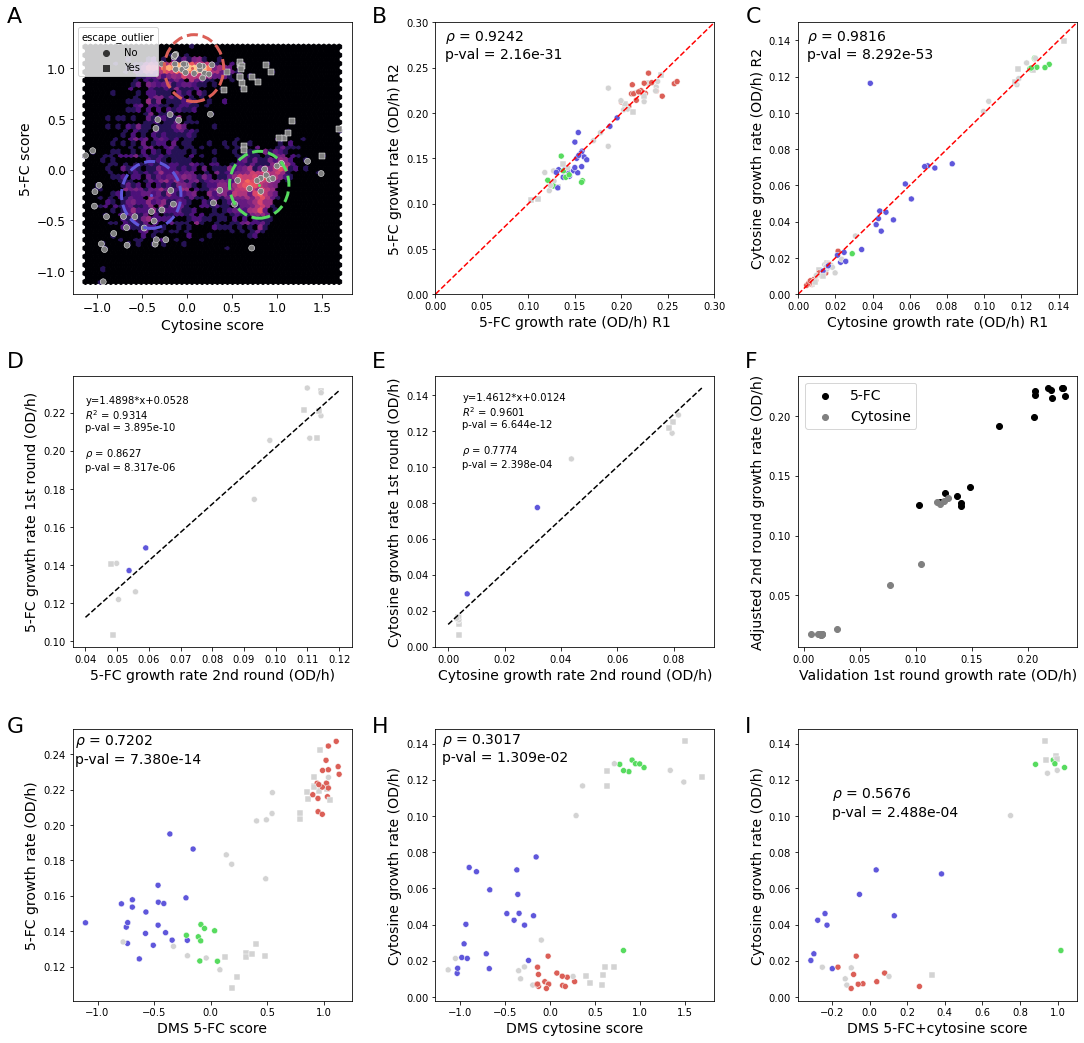

In [95]:
fig = plt.figure(figsize=(18,18))
gs = gridspec.GridSpec(3, 3)
gs.update(hspace=0.3, wspace=0.3) # set the spacing between axes. 


ax1 = fig.add_subplot(gs[0,0])

hb = ax1.hexbin(data_df['CY_score'], data_df['FC_score'], gridsize=50, bins='log', vmax=100, cmap='magma')
#cb = fig.colorbar(hb, ax=ax1, fraction=1/10)
#cb.set_label('Log10 variant number', fontsize=14)
#cb.set_ticks([1,10,100])

sns.scatterplot(data=validations_result_hap, x='CY_score', y='FC_score', color='grey', style='escape_outlier', markers=['o', 's'])

plt.xlabel('Cytosine score', fontsize=14)
plt.ylabel('5-FC score', fontsize=14)

plt.plot([0.05], [1], c=colors[0], marker='o', ms=2)
ax1.add_patch(plt.Circle((0.075, 1), 0.33, color=colors[0], fill=False, lw=3, ls='--'))

plt.plot([0.80], [-0.15], c=colors[1], marker='o', ms=2)
ax1.add_patch(plt.Circle((0.80, -0.15), 0.33, color=colors[1], fill=False, lw=3, ls='--'))


plt.plot([-0.40], [-0.25], c=colors[2], marker='o', ms=2)
ax1.add_patch(plt.Circle((-0.40, -0.25), 0.33, color=colors[2], fill=False, lw=3, ls='--'))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb.ax.tick_params(labelsize=12)

plt.text(-2, 1.45, 'A', fontsize=22)
plt.text(2.05, 1.45, 'B', fontsize=22)
plt.text(6.2, 1.45, 'C', fontsize=22)

plt.text(-2, -1.95, 'D', fontsize=22)
plt.text(2.05, -1.95, 'E', fontsize=22)
plt.text(6.2, -1.95, 'F', fontsize=22)


plt.text(-2, -5.55, 'G', fontsize=22)
plt.text(2.05, -5.55, 'H', fontsize=22)
plt.text(6.2, -5.55, 'I', fontsize=22)



##################################
ax2 = fig.add_subplot(gs[0,2])


sns.scatterplot(data=validations_result_hap, x='hap_cy_1', y='hap_cy_2', hue='Mutation cluster',
            palette = mut_colors, legend=False, style='escape_outlier', markers=['o', 's'])


plt.xlim(0,0.15)
plt.ylim(0,0.15)
plt.plot([0,1], [0,1], 'r--')

plt.xlabel('Cytosine growth rate (OD/h) R1', fontsize=14)
plt.ylabel('Cytosine growth rate (OD/h) R2', fontsize=14)

stats.spearmanr(validations_result_hap['hap_cy_1'], validations_result_hap['hap_cy_2'], nan_policy='omit')
rho, pval = stats.spearmanr(validations_result_hap['hap_cy_1'], 
                            validations_result_hap['hap_cy_2'], nan_policy='omit')

plt.text(0.005, 0.13, r'$\rho$ = '+str(round(rho, 4))+'\np-val = '+str(np.format_float_scientific(pval, 3)), fontsize=14)


#################################
ax3 = fig.add_subplot(gs[0,1])


sns.scatterplot(data=validations_result_hap, x='hap_fc_1', y='hap_fc_2', hue='Mutation cluster',
            palette = mut_colors, legend=False, style='escape_outlier', markers=['o', 's'])

plt.xlim(0,0.30)
plt.ylim(0,0.30)
plt.plot([0,1], [0,1], 'r--')

plt.xlabel('5-FC growth rate (OD/h) R1', fontsize=14)
plt.ylabel('5-FC growth rate (OD/h) R2', fontsize=14)


rho, pval = stats.spearmanr(validations_result_hap['hap_fc_1'], 
                            validations_result_hap['hap_fc_2'], nan_policy='omit')

plt.text(0.01, 0.26, r'$\rho$ = '+str(round(rho, 4))+'\np-val = '+str(np.format_float_scientific(pval, 3)), fontsize=14)

#################################
ax7 = fig.add_subplot(gs[1,0])

sns.scatterplot(data=validations_result_hap, x='2nd_batch_FC', y='hap_fc_average', hue='Mutation cluster',
            palette = mut_colors, legend=False, style='escape_outlier', markers=['o', 's'])


plt.xlabel('5-FC growth rate 2nd round (OD/h)', fontsize=14)
plt.ylabel('5-FC growth rate 1st round (OD/h)', fontsize=14)



mask = ~np.isnan(validations_result_hap['2nd_batch_FC']) & ~np.isnan(validations_result_hap['hap_fc_average'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x=validations_result_hap['2nd_batch_FC'][mask], y=validations_result_hap['hap_fc_average'][mask])



rho, pval = stats.spearmanr(validations_result_hap['hap_fc_average'], 
                            validations_result_hap['2nd_batch_FC'], nan_policy='omit')


lin_reg_str = 'y='+str(round(slope, 4))+'*x+'+str(round(intercept, 4))+'\n'
r_2 = r_value**2

plt.text(0.04,0.19, (lin_reg_str+r'$R^2$ = '+ str((round(r_2, 4))))+'\np-val = '+str(np.format_float_scientific(p_value, precision=3))+'\n\n'+r'$\rho$ = '+ str(round(rho,4))+ '\np-val = '+str(np.format_float_scientific(pval, precision=3)))


plt.plot(np.linspace(0.04,0.12, 50), [(x*slope)+intercept for x in np.linspace(0.04,0.12, 50)], 'k--')


#################################

ax8 = fig.add_subplot(gs[1,1])

sns.scatterplot(data=validations_result_hap, x='2nd_batch_CY', y='hap_cy_average', hue='Mutation cluster',
            palette = mut_colors, legend=False, style='escape_outlier', markers=['o', 's'])


plt.xlabel('Cytosine growth rate 2nd round (OD/h)', fontsize=14)
plt.ylabel('Cytosine growth rate 1st round (OD/h)', fontsize=14)



mask = ~np.isnan(validations_result_hap['2nd_batch_CY']) & ~np.isnan(validations_result_hap['hap_cy_average'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x=validations_result_hap['2nd_batch_CY'][mask], y=validations_result_hap['hap_cy_average'][mask])



rho, pval = stats.spearmanr(validations_result_hap['hap_cy_average'], 
                            validations_result_hap['2nd_batch_CY'], nan_policy='omit')


lin_reg_str = 'y='+str(round(slope, 4))+'*x+'+str(round(intercept, 4))+'\n'
r_2 = r_value**2

plt.text(0.005,0.10, (lin_reg_str+r'$R^2$ = '+ str((round(r_2, 4))))+'\np-val = '+str(np.format_float_scientific(p_value, precision=3))+'\n\n'+r'$\rho$ = '+ str(round(rho,4))+ '\np-val = '+str(np.format_float_scientific(pval, precision=3)))


plt.plot(np.linspace(0.0,0.09, 50), [(x*slope)+intercept for x in np.linspace(0.0,0.09, 50)], 'k--')



#################################

ax9 = fig.add_subplot(gs[1,2])

plt.scatter(validations_result_hap['hap_fc_average'], validations_result_hap['adjusted_2nd_batch_FC'], color='k')
plt.scatter(validations_result_hap['hap_cy_average'], validations_result_hap['adjusted_2nd_batch_CY'], color='grey')

plt.xlabel('Validation 1st round growth rate (OD/h)', fontsize=14)
plt.ylabel('Adjusted 2nd round growth rate (OD/h)', fontsize=14)

plt.legend(['5-FC', 'Cytosine'], fontsize=14)

#################################
ax4 = fig.add_subplot(gs[2,1])

sns.scatterplot(data=validations_result_hap, x='CY_score', y='hap_cy_average', hue='Mutation cluster',
            palette = mut_colors, legend=False, style='escape_outlier', markers=['o', 's'])


rho, pval = stats.spearmanr(validations_result_hap['CY_score'], 
                            validations_result_hap['hap_cy_average'], nan_policy='omit')

plt.text(-1.2, 0.13, r'$\rho$ = '+str(round(rho, 4))+'\np-val = '+str(np.format_float_scientific(pval, 3)), fontsize=14)


plt.xlabel('DMS cytosine score', fontsize=14)
plt.ylabel('Cytosine growth rate (OD/h)', fontsize=14)

################################
ax5 = fig.add_subplot(gs[2,0])


sns.scatterplot(data=validations_result_hap, x='FC_score', y='combined_hap_fc', hue='Mutation cluster',
            palette = mut_colors, legend=False, style='escape_outlier', markers=['o', 's'])


rho, pval = stats.spearmanr(validations_result_hap['FC_score'], 
                            validations_result_hap['combined_hap_fc'], nan_policy='omit')

plt.text(-1.2, 0.235, r'$\rho$ = '+str(round(rho, 4))+'\np-val = '+str(np.format_float_scientific(pval, 3)), fontsize=14)

plt.xlabel('DMS 5-FC score', fontsize=14)
plt.ylabel('5-FC growth rate (OD/h)', fontsize=14)


#################################
ax6 = fig.add_subplot(gs[2,2])

sns.scatterplot(data=validations_result_hap, x='FC_CY_score', y='combined_hap_cy', hue='Mutation cluster',
            palette = mut_colors, legend=False, style='escape_outlier', markers=['o', 's'])


rho, pval = stats.spearmanr(validations_result_hap['FC_CY_score'], 
                            validations_result_hap['combined_hap_cy'], nan_policy='omit')

plt.text(-0.2, 0.10, r'$\rho$ = '+str(round(rho, 4))+'\np-val = '+str(np.format_float_scientific(pval, 3)), fontsize=14)

plt.xlabel('DMS 5-FC+cytosine score', fontsize=14)
plt.ylabel('Cytosine growth rate (OD/h)', fontsize=14)



plt.savefig('./figures/validations_corr.svg', format='svg', dpi=300)

In [96]:
mask = ~np.isnan(validations_result_hap['FC_CY_score']) & ~np.isnan(validations_result_hap['combined_hap_fc'])
validations_result_hap[mask]

codon wt measured     mtx1     mtx2    dmso1    dmso2  mtx_average  \
1023     50  H        Q  0.01592  0.01736  0.21280  0.20736      0.01664   
1170     57  G        Q  0.01804  0.02008  0.20436  0.20180      0.01906   
1205     59  A        P  0.09676  0.09640  0.18936  0.18932      0.09658   
1206     59  A        W  0.07192  0.07196  0.22596  0.22728      0.07194   
1208     59  A        Y  0.08056  0.08344  0.22144  0.22632      0.08200   
1213     59  A        H  0.09804  0.10112  0.22236  0.22208      0.09958   
1228     60  T        F  0.07660  0.07640  0.19060  0.21500      0.07650   
1236     60  T        R  0.12040  0.12160  0.21224  0.21328      0.12100   
1249     61  L        F  0.08164  0.08284  0.20108  0.20568      0.08224   
1333     65  I        F  0.04628  0.05160  0.19092  0.19000      0.04894   
1350     66  S        M  0.12360  0.12680  0.22968  0.22172      0.12520   
1391     68  L        I      NaN      NaN      NaN      NaN          NaN   
1410     69  E        V  0.08168  0.08544  0.22700  0.23080      0.08356   
1451     71  C        A  0.08696  0.08612  0.22280  0.21848      0.08654   
1460     71  C        Y  0.02708  0.02792  0.21780  0.20076      0.02750   
1527     74  L        Q      NaN      NaN      NaN      NaN          NaN   
1551     75  E        R  0.04728  0.04864  0.22176  0.19708      0.04796   
1560     76  G        M  0.10884  0.10760  0.20808  0.20432      0.10822   
1563     76  G        W  0.10132  0.10228  0.19008  0.19080      0.10180   
1565     76  G        Y  0.10560  0.10680  0.22888  0.21960      0.10620   
1568     76  G        N  0.01272  0.01296  0.21604  0.20992      0.01284   
1570     76  G        H  0.10080  0.10120  0.21828  0.21480      0.10100   
1642     80  K        L  0.10960  0.10760  0.21208  0.20392      0.10860   
1678     81  D        D      NaN      NaN      NaN      NaN          NaN   
1770     86  T        M  0.10000  0.10080  0.20384  0.20020      0.10040   
1830     89  S        V  0.05984  0.06528  0.18712  0.18460      0.06256   
1854     90  P        M  0.02884  0.03076  0.20568  0.19864      0.02980   
1876     91  C        C      NaN      NaN      NaN      NaN          NaN   
1877     91  C        P  0.02084  0.01932  0.21876  0.21920      0.02008   
1897     92  D        C  0.05336  0.05260  0.20212  0.21264      0.05298   
1915     93  M        L  0.09540  0.09488  0.19980  0.19972      0.09514   
1921     93  M        F  0.10188  0.10360  0.19724  0.19412      0.10274   
1980     96  G        M  0.01724  0.02124  0.19040  0.18760      0.01924   
1983     96  G        W  0.01552  0.01344  0.20084  0.20268      0.01448   
1990     96  G        H  0.01608  0.01704  0.22784  0.20336      0.01656   
2004     97  A        W      NaN      NaN      NaN      NaN          NaN   
2020     98  I        L  0.05096  0.05232  0.19884  0.19480      0.05164   
2189    106  C        I  0.11880  0.11960  0.20752  0.19536      0.11920   

      dmso_average  hap_fc_1  ...  CY_score  FC_score  FC_CY_score  \
1023       0.21008   0.22388  ...  0.583579  0.917500     0.332263   
1170       0.20308   0.13520  ...  0.817120 -0.086258     1.017900   
1205       0.18934   0.12072  ...  0.912957 -0.096002     0.976800   
1206       0.22662   0.21164  ... -0.056719  0.986707     0.038419   
1208       0.22388   0.22100  ... -0.019254  0.956006    -0.035093   
1213       0.22222   0.21592  ...  0.076972  0.948449     0.080225   
1228       0.20280   0.20232  ... -0.326084  0.492590    -0.129416   
1236       0.21276   0.19944  ... -0.190495  0.542476    -0.120884   
1249       0.20338   0.13244  ... -0.182160 -0.206614     0.131574   
1333       0.19046   0.21436  ...  0.257383  0.545507     0.103481   
1350       0.22570   0.12692  ...  0.290743 -0.328789     0.749954   
1391           NaN       NaN  ...  1.073198  0.312219     0.994133   
1410       0.22890   0.20668  ... -0.347700  0.405725    -0.097232   
1451       0.22064   0.12232  ...  1.336839  0.081624     0.9

In [97]:
slope, inter, rval, pval, std_slope = stats.linregress(validations_result_hap['log_hap_fc'].dropna(), 
                                                 validations_result_hap['log_hap_cy'].dropna())

slope, inter, rval, pval, std_slope

(-3.7282554404658197,
 -14.581044196792774,
 -0.8987001806446225,
 3.580326738457651e-32,
 0.19733944376666165)

In [98]:
2**inter

4.08007671258453e-05

In [99]:
x_vals = validations_result_hap['hap_fc_average'].dropna()
y_vals = validations_result_hap['hap_cy_average'].dropna()

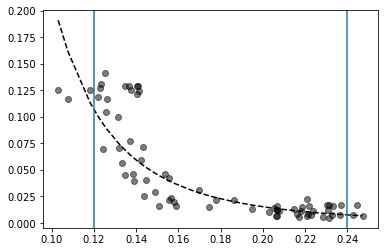

In [100]:
plt.scatter(validations_result_hap['hap_fc_average'], validations_result_hap['hap_cy_average'], color = 'k', alpha=0.5)
plt.plot(sorted(list(x_vals)), front(sorted(list(x_vals)), *np.array([(2**-14.903689683943384), 3.81784])), 'k--')


plt.axvline(0.12)
plt.axvline(0.24)

In [101]:
def trade_off_func(x, mod=0):
    
    return (2**inter)*(x**(slope+mod))

In [102]:
trade_off_func(0.15)/trade_off_func(0.12)

0.4352058422720905

In [103]:
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(validations_result_hap['log_hap_fc'].dropna())-2)

In [104]:
print(f"slope (95%): {slope:.6f} +/- {ts*std_slope:.6f}")


slope (95%): -3.728255 +/- 0.392364


In [105]:
import matplotlib.gridspec as gridspec

## Flip orientation

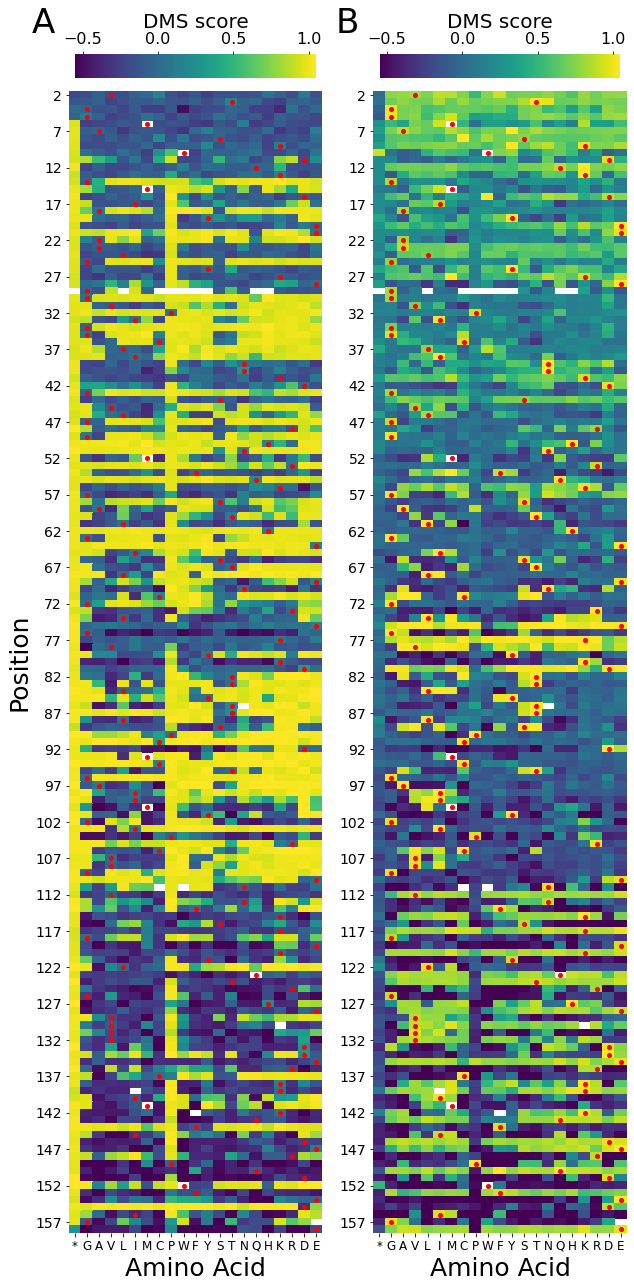

In [106]:
fig = plt.figure(figsize=(10, 25))

ax1 = plt.subplot(121)


sns.heatmap(df_FC.T, square=False, cmap='viridis',cbar_kws={'shrink':0.95, "pad" : 0.01, 'use_gridspec':False, 'location':"top", 'aspect':10}, vmax=1.05, vmin=-0.55, yticklabels=5)


ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=14, labelrotation=0)

cbar = ax1.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=16)
cbar.set_label('DMS score', fontsize=20)

ax1.figure.axes[-1].yaxis.label.set_size(25)




for codon in range(0,len(df_CY.columns)):
    y_pos = codon+0.5
    # set x coordinates of the annotation. 0.5 increments place the dots in the middle of the squares

    codon_n = int(list(df_CY.columns)[codon])
    # get the codon number in integer format

    seq = dict_of_wt[codon_n]
    # get the dna sequence of this codon number

    x_pos = (aa_order.index(codontable_standard[seq]))+0.5
    # get y coordinates based on the order in in which amino acids are (the df index or a custom order if it has been changed)
    # 0.5 increments again to be in the center of the squares

    plt.plot(x_pos, y_pos, 'ro', ms=4)


plt.xlabel('Amino Acid', fontsize=25)
plt.ylabel('Position', fontsize=25)


plt.text(-3.1,-8, 'A', fontsize=34)

ax2 = plt.subplot(122)



sns.heatmap(df_CY.T, square=False, cmap='viridis',cbar_kws={ 'shrink':0.95, "pad" : 0.01, 'use_gridspec':False, 'location':"top", 'aspect':10}, vmax=1.05, vmin=-0.55, yticklabels=5)


ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=14, labelrotation=0)

cbar = ax2.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=16)

cbar.set_label('DMS score', fontsize=20)




for codon in range(0,len(df_FC.columns)):
    y_pos = codon+0.5
    # set x coordinates of the annotation. 0.5 increments place the dots in the middle of the squares

    codon_n = int(list(df_FC.columns)[codon])
    # get the codon number in integer format

    seq = dict_of_wt[codon_n]
    # get the dna sequence of this codon number

    x_pos = (aa_order.index(codontable_standard[seq]))+0.5
    # get y coordinates based on the order in in which amino acids are (the df index or a custom order if it has been changed)
    # 0.5 increments again to be in the center of the squares

    plt.plot(x_pos, y_pos, 'ro', clip_on = True, ms=4)


plt.xlabel('Amino Acid', fontsize=25)


plt.text(-3.1,-8, 'B', fontsize=34)

plt.savefig('./figures/test_fig2_vertical.svg', format='svg', dpi=300)

In [107]:
data_df.columns

Index(['codon', 'wt', 'measured', 'CY_1', 'CY_1_R1', 'CY_1_MAD_1', 'CY_1_R2',
       'CY_1_MAD_2', 'FC_1', 'FC_1_R1', 'FC_1_MAD_1', 'FC_1_R2', 'FC_1_MAD_2',
       'CY_2', 'CY_2_R1', 'CY_2_MAD_1', 'CY_2_R2', 'CY_2_MAD_2', 'FC_2',
       'FC_2_R1', 'FC_2_MAD_1', 'FC_2_R2', 'FC_2_MAD_2', 'FC_CY_2',
       'FC_CY_2_R1', 'FC_CY_2_MAD_1', 'FC_CY_2_R2', 'FC_CY_2_MAD_2', 'CY_3',
       'CY_3_R1', 'CY_3_MAD_1', 'CY_3_R2', 'CY_3_MAD_2', 'FC_3', 'FC_3_R1',
       'FC_3_MAD_1', 'FC_3_R2', 'FC_3_MAD_2', 'CY_1_to_2', 'CY_3_to_2',
       'FC_1_to_2', 'FC_3_to_2', 'CY_123', 'FC_123', 'CY_score', 'FC_score',
       'FC_CY_score', 'interface', 'ddG_struc_HET', 'ddG_struc_HM',
       'ddG_inter_HET', 'ddG_inter_HM', 'r4s_score', 'RSA', 'temp',
       'ortholog_aa_freq', 'dist_act_site', 'mut_type'],
      dtype='object')

In [108]:
stop = data_df['measured'] == '*'
wt = data_df['measured'] == data_df['wt']
nonsense = data_df[(stop) & (data_df['codon'].isin([2,3,4,5,158]) == False)]
silent = data_df[wt]
missense = data_df[(~stop)&(~wt)]

CY_medians = []
CY_mads = []
FC_medians = []
FC_mads = []
ddg_inter_median =[]
ddg_struc_median =[] 

r4s = list(data_df[wt]['r4s_score'])
RSA = list(data_df[wt]['RSA'])
temp = list(data_df[wt]['temp'])

for x in range(2,159):
    codon_rows = missense['codon'] == x
    
    average_score_CY = np.nanmedian(missense[codon_rows]['CY_score'])
    CY_medians.append(average_score_CY)
    mad_CY = stats.median_abs_deviation(missense[codon_rows]['CY_score'], nan_policy='omit')
    CY_mads.append(mad_CY)
    
    average_score_FC = np.nanmedian(missense[codon_rows]['FC_score'])
    FC_medians.append(average_score_FC)
    mad_FC = stats.median_abs_deviation(missense[codon_rows]['FC_score'], nan_policy='omit')
    FC_mads.append(mad_FC)
    
    ddg_inter = np.nanmedian(missense[codon_rows]['ddG_inter_HET'])
    ddg_inter_median.append(ddg_inter)
    
    ddg_struct = np.nanmedian(missense[codon_rows]['ddG_struc_HET'])
    ddg_struc_median.append(ddg_struct)
    


/home/phil/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


531
531 531 -0.0982029661260283 -0.0982029661260283
(0.0, 1.0, -0.0982029661260283, array([[265, 265],
       [266, 266]]))
531 722 -0.0982029661260283 -0.01862114068415275
(19.668752919184094, 9.209503820617924e-06, -0.0518880894394774, array([[226, 400],
       [305, 322]]))
531 1715 -0.0982029661260283 0.1736082108075017
(207.41831518725328, 5.024958635165652e-47, 0.0880307210790225, array([[ 120, 1003],
       [ 411,  712]]))
722
722 531 -0.01862114068415275 -0.0982029661260283
(19.668752919184094, 9.209503820617924e-06, -0.0518880894394774, array([[400, 226],
       [322, 305]]))
722 722 -0.01862114068415275 -0.01862114068415275
(0.0, 1.0, -0.01862114068415275, array([[361, 361],
       [361, 361]]))
722 1715 -0.01862114068415275 0.1736082108075017
(60.070141595785365, 9.153647243136492e-15, 0.1170069097011789, array([[273, 945],
       [449, 770]]))
1715
1715 531 0.1736082108075017 -0.0982029661260283
(207.4183151872533, 5.024958635165579e-47, 0.0880307210790225, array([[1003,  1

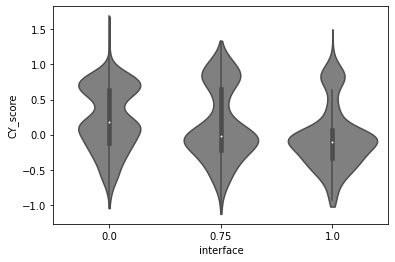

In [111]:
sns.violinplot(data=missense, x='interface', y='CY_score', color='grey', cut=0)


data_groups = [missense[missense['interface'] == 1], missense[missense['interface'] == 0.75], missense[missense['interface'] == 0]]

for x in data_groups:
    
    print (len(x['CY_score'].dropna()))
    
    for y in data_groups:
        print(len(x['CY_score'].dropna()), len(y['CY_score'].dropna()), np.median(x['CY_score'].dropna()), np.median(y['CY_score'].dropna()))
        print(stats.median_test(x['CY_score'].dropna(), y['CY_score'].dropna()))

531
531 531 0.1185918636009423 0.1185918636009423
(0.0, 1.0, 0.1185918636009423, array([[265, 265],
       [266, 266]]))
531 722 0.1185918636009423 0.13818418391059234
(0.10162462908237876, 0.7498886580978249, 0.1304413737989247, array([[262, 364],
       [269, 358]]))
531 1715 0.1185918636009423 0.0005793252026583
(3.1963630972970303, 0.07380222109663546, 0.02149679742631365, array([[284, 839],
       [247, 876]]))
722
722 531 0.13818418391059234 0.1185918636009423
(0.10162462908237876, 0.7498886580978249, 0.1304413737989247, array([[364, 262],
       [358, 269]]))
722 722 0.13818418391059234 0.13818418391059234
(0.0, 1.0, 0.13818418391059234, array([[361, 361],
       [361, 361]]))
722 1715 0.13818418391059234 0.0005793252026583
(5.5904638633772565, 0.01805851337300028, 0.0265027079236578, array([[388, 830],
       [334, 885]]))
1715
1715 531 0.0005793252026583 0.1185918636009423
(3.1963630972970303, 0.07380222109663546, 0.02149679742631365, array([[839, 284],
       [876, 247]]))
17

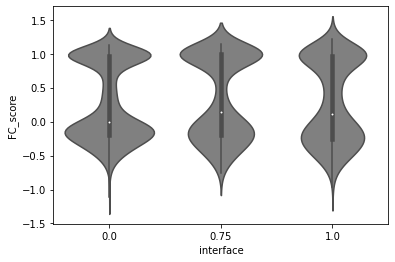

In [113]:
sns.violinplot(data=missense, x='interface', y='FC_score', color='grey')

data_groups = [missense[missense['interface'] == 1], missense[missense['interface'] == 0.75], missense[missense['interface'] == 0]]

for x in data_groups:
    
    print (len(x['FC_score'].dropna()))
    
    for y in data_groups:
        print(len(x['FC_score'].dropna()), len(y['FC_score'].dropna()), np.median(x['FC_score'].dropna()), np.median(y['FC_score'].dropna()))
        print(stats.median_test(x['FC_score'].dropna(), y['FC_score'].dropna()))

In [114]:
no_inter = missense['interface'] == 0

Text(0.5, 0, 'Substrate                    Zinc                     V.d.Waals             Exit')

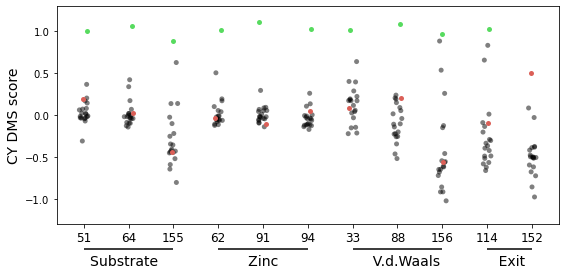

In [115]:
plt.figure(figsize=(9,4))
substrate_binding = [51,64,155, 62,91,94, 33,88,156, 114, 152]

select_substrate_binding = missense['codon'].isin(substrate_binding)


sns.stripplot(data = missense[select_substrate_binding], x='codon', y='CY_score', order = substrate_binding, color='k', alpha=0.5, size=5)

sns.stripplot(data = silent[silent['codon'].isin(substrate_binding)], x='codon', y='CY_score', order = substrate_binding, color=colors[1])

ax = sns.stripplot(data = nonsense[nonsense['codon'].isin(substrate_binding)], x='codon', y='CY_score', order = substrate_binding, color=colors[0])


plt.ylim(-1.30,1.30)
plt.hlines([-1.60,-1.60,-1.60,-1.60], [0,3,6,9] , [2,5,8,10], color='k', clip_on=False )
plt.xticks(fontsize=12)
plt.ylabel('CY DMS score', fontsize=14)

plt.xlabel('Substrate                    Zinc                     V.d.Waals             Exit', labelpad = 10, fontsize=14)

Text(0.5, 0, 'Substrate                    Zinc                     V.d.Waals             Exit')

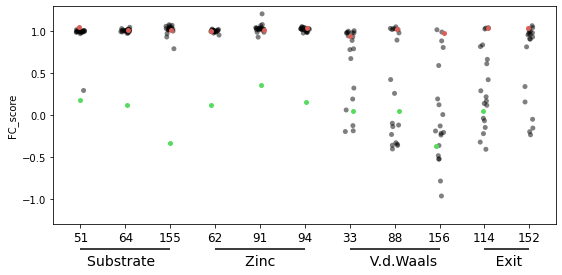

In [116]:
plt.figure(figsize=(9,4))
substrate_binding = [51,64,155, 62,91,94, 33,88,156, 114, 152]

select_substrate_binding = missense['codon'].isin(substrate_binding)


sns.stripplot(data = missense[select_substrate_binding], x='codon', y='FC_score', order = substrate_binding, color='k', alpha=0.5, size=5)

sns.stripplot(data = silent[silent['codon'].isin(substrate_binding)], x='codon', y='FC_score', order = substrate_binding, color=colors[1])

ax = sns.stripplot(data = nonsense[nonsense['codon'].isin(substrate_binding)], x='codon', y='FC_score', order = substrate_binding, color=colors[0])


plt.ylim(-1.30,1.30)
plt.hlines([-1.60,-1.60,-1.60,-1.60], [0,3,6,9] , [2,5,8,10], color='k', clip_on=False )
plt.xticks(fontsize=12)
plt.xlabel('5-FC DMS score', fontsize=14)

plt.xlabel('Substrate                    Zinc                     V.d.Waals             Exit', labelpad = 10, fontsize=14)

Text(0, 0.5, '  Exit        V.d.Waals           Zinc            Substrate')

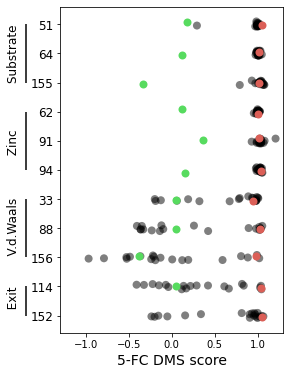

In [117]:
plt.figure(figsize=(4,6))


select_substrate_binding = missense['codon'].isin(substrate_binding)


sns.stripplot(data = missense[select_substrate_binding], x='FC_score', y='codon', order = substrate_binding, color='k', alpha=0.5, size=8, orient='h')
sns.stripplot(data = silent[silent['codon'].isin(substrate_binding)], x='FC_score', y='codon', order = substrate_binding, color=colors[1], orient='h', size=8)

ax = sns.stripplot(data = nonsense[nonsense['codon'].isin(substrate_binding)], x='FC_score', y='codon', order = substrate_binding, color=colors[0], orient='h', size=8)


plt.xlim(-1.30,1.30)
plt.vlines([-1.70,-1.70,-1.70,-1.70], [0,3,6,9] , [2,5,8,10], color='k', clip_on=False )


plt.yticks(fontsize=12)
plt.xlabel('5-FC DMS score', fontsize=14)

plt.ylabel('  Exit        V.d.Waals           Zinc            Substrate', labelpad = 10, fontsize=12)

0.75    6
0.00    3
1.00    2
Name: interface, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2d0c719690>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2d0c0b9350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2d0c719310>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2d0c3b5d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2d0c3b5090>,
 'means': []}

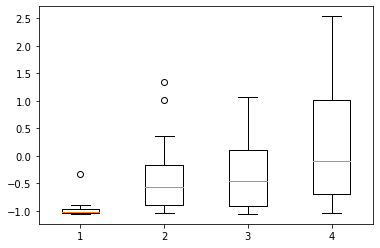

In [118]:
substrate_binding = [51,64,155, 62,91,94, 33,88,156, 114, 152]



select_substrate_binding = silent['codon'].isin(substrate_binding)

print(silent[select_substrate_binding]['interface'].value_counts())


group_list = [silent[select_substrate_binding], silent[silent['interface'] == 1],silent[silent['interface'] == 0.75],silent[silent['interface'] == 0]]

group_vals = [list(x['r4s_score']) for x in group_list]


plt.boxplot(group_vals)

In [119]:
data_groups = [silent[select_substrate_binding], silent[silent['interface'] == 1],silent[silent['interface'] == 0.75],silent[silent['interface'] == 0]]


for x in data_groups:
    
    print (len(x['r4s_score'].dropna()))
    
    for y in data_groups:
        print(len(x['r4s_score'].dropna()), len(y['r4s_score'].dropna()), np.median(x['r4s_score'].dropna()), np.median(y['r4s_score'].dropna()))
        print(stats.ks_2samp(x['r4s_score'].dropna(), y['r4s_score'].dropna()))

11
11 11 -1.022 -1.022
KstestResult(statistic=0.0, pvalue=1.0)
11 28 -1.022 -0.5701499999999999
KstestResult(statistic=0.6038961038961039, pvalue=0.0033512411593320524)
11 38 -1.022 -0.45755
KstestResult(statistic=0.645933014354067, pvalue=0.0006898217244271088)
11 91 -1.022 -0.0995
KstestResult(statistic=0.7882117882117882, pvalue=9.003410232910625e-07)
28
28 11 -0.5701499999999999 -1.022
KstestResult(statistic=0.6038961038961039, pvalue=0.0033512411593320524)
28 28 -0.5701499999999999 -0.5701499999999999
KstestResult(statistic=0.0, pvalue=1.0)
28 38 -0.5701499999999999 -0.45755
KstestResult(statistic=0.17481203007518797, pvalue=0.6308116933646023)
28 91 -0.5701499999999999 -0.0995
KstestResult(statistic=0.3131868131868132, pvalue=0.023374034225016938)
38
38 11 -0.45755 -1.022
KstestResult(statistic=0.645933014354067, pvalue=0.0006898217244271088)
38 28 -0.45755 -0.5701499999999999
KstestResult(statistic=0.17481203007518797, pvalue=0.6308116933646023)
38 38 -0.45755 -0.45755
KstestRes

In [120]:
colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.3712, 0.33999999999999997, 0.86)]

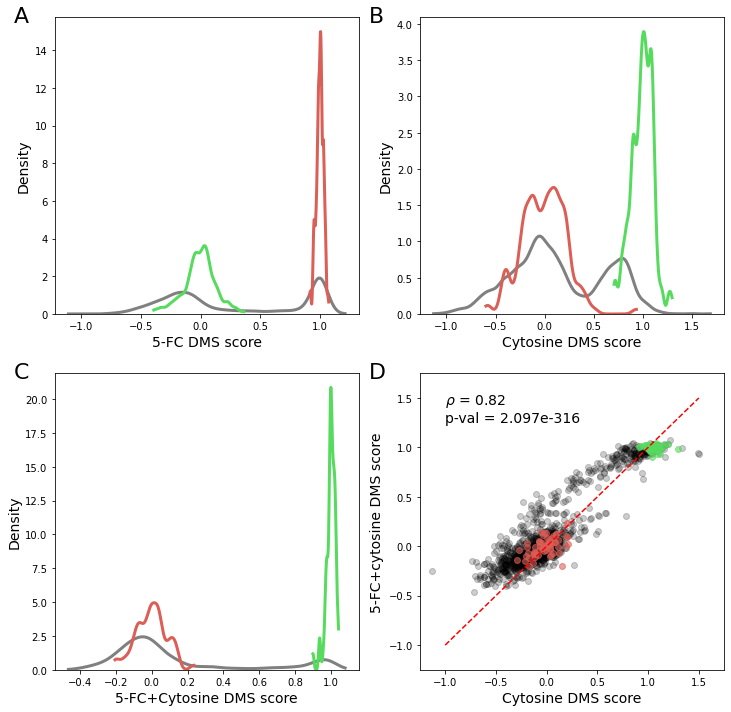

In [121]:
plt.figure(figsize=(12,12))

plt.subplot(221)

sns.kdeplot(missense['FC_score'], color='grey', bw_adjust=0.5, cut=0, lw=3)
sns.kdeplot(nonsense['FC_score'], color=colors[0], bw_adjust=0.5, cut=0, lw=3)
sns.kdeplot(silent['FC_score'], color=colors[1], bw_adjust=0.5, cut=0, lw=3)

plt.xlabel('5-FC DMS score', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.subplot(222)

sns.kdeplot(missense['CY_score'], color='grey', bw_adjust=0.5, cut=0, lw=3)
sns.kdeplot(nonsense['CY_score'], color=colors[0], bw_adjust=0.5, cut=0, lw=3)
sns.kdeplot(silent['CY_score'], color=colors[1], bw_adjust=0.5, cut=0, lw=3)

plt.xlabel('Cytosine DMS score', fontsize=14)
plt.ylabel('Density', fontsize=14)


plt.subplot(223)

sns.kdeplot(missense['FC_CY_score'], color='grey', bw_adjust=0.5, cut=0, lw=3)
sns.kdeplot(nonsense['FC_CY_score'], color=colors[0], bw_adjust=0.5, cut=0, lw=3)
sns.kdeplot(silent['FC_CY_score'], color=colors[1], bw_adjust=0.5, cut=0, lw=3)

plt.xlabel('5-FC+Cytosine DMS score', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.subplot(224)


plt.scatter(missense['CY_score'], missense['FC_CY_score'], color='k', alpha=0.2)
plt.scatter(silent['CY_score'], silent['FC_CY_score'], color=colors[1], alpha=0.6)
plt.scatter(nonsense['CY_score'], nonsense['FC_CY_score'], color=colors[0], alpha=0.6)


rho, pval = stats.spearmanr(data_df['CY_score'], 
                            data_df['FC_CY_score'], nan_policy='omit')

plt.text(-1, 1.25, r'$\rho$ = '+str(round(rho, 4))+'\np-val = '+str(np.format_float_scientific(pval, 3)), fontsize=14)


plt.xlabel('Cytosine DMS score', fontsize=14)
plt.ylabel('5-FC+cytosine DMS score', fontsize=14)
plt.xlim(-1.25,1.75)
plt.ylim(-1.25,1.75)
plt.plot([-1, 1.5], [-1, 1.5], 'r--')


plt.text(-1.75,1.7, 'D', fontsize=22)
plt.text(-5.25,1.7, 'C', fontsize=22)
plt.text(-1.75,5.3, 'B', fontsize=22)
plt.text(-5.25,5.3, 'A', fontsize=22)

plt.savefig('./figures/kde_plots_scores.svg', format='svg', dpi=300)

In [122]:
stats.spearmanr(data_df['CY_score'],data_df['FC_score'], nan_policy='omit')

SpearmanrResult(correlation=-0.23412101909434643, pvalue=5.5551963563309e-42)

In [123]:
data_df['CY_score'].dropna()

0       0.014447
1       0.768967
2       0.788358
3       0.822532
4       0.743511
          ...   
3292    0.815396
3293    0.977290
3294    0.786936
3295    0.792971
3296    0.974570
Name: CY_score, Length: 3272, dtype: float64

In [124]:
len(data_df[(data_df['FC_CY_score']>-5)&(data_df['CY_score']>-5)])

1298

In [125]:
print(len(missense['FC_CY_score'].dropna()),len(nonsense['FC_CY_score'].dropna()),len(silent['FC_CY_score'].dropna()))

1177 62 59


In [126]:
missense.columns

Index(['codon', 'wt', 'measured', 'CY_1', 'CY_1_R1', 'CY_1_MAD_1', 'CY_1_R2',
       'CY_1_MAD_2', 'FC_1', 'FC_1_R1', 'FC_1_MAD_1', 'FC_1_R2', 'FC_1_MAD_2',
       'CY_2', 'CY_2_R1', 'CY_2_MAD_1', 'CY_2_R2', 'CY_2_MAD_2', 'FC_2',
       'FC_2_R1', 'FC_2_MAD_1', 'FC_2_R2', 'FC_2_MAD_2', 'FC_CY_2',
       'FC_CY_2_R1', 'FC_CY_2_MAD_1', 'FC_CY_2_R2', 'FC_CY_2_MAD_2', 'CY_3',
       'CY_3_R1', 'CY_3_MAD_1', 'CY_3_R2', 'CY_3_MAD_2', 'FC_3', 'FC_3_R1',
       'FC_3_MAD_1', 'FC_3_R2', 'FC_3_MAD_2', 'CY_1_to_2', 'CY_3_to_2',
       'FC_1_to_2', 'FC_3_to_2', 'CY_123', 'FC_123', 'CY_score', 'FC_score',
       'FC_CY_score', 'interface', 'ddG_struc_HET', 'ddG_struc_HM',
       'ddG_inter_HET', 'ddG_inter_HM', 'r4s_score', 'RSA', 'temp',
       'ortholog_aa_freq', 'dist_act_site', 'mut_type'],
      dtype='object')

In [127]:
cols_corr = ['CY_score', 'FC_score', 'FC_CY_score', 'interface', 'ddG_inter_HET', 'ddG_inter_HM' , 'ddG_struc_HET', 'ddG_struc_HM', 'RSA', 'temp', 'dist_act_site' , 'r4s_score', 'ortholog_aa_freq']

subset_missense = missense[cols_corr]

corr_matrix = subset_missense.corr(method='spearman')

corr_matrix

CY_score  FC_score  FC_CY_score  interface  ddG_inter_HET  \
CY_score          1.000000 -0.218593     0.802754  -0.206169      -0.220561   
FC_score         -0.218593  1.000000    -0.147522   0.030868       0.088265   
FC_CY_score       0.802754 -0.147522     1.000000  -0.021012      -0.208687   
interface        -0.206169  0.030868    -0.021012   1.000000       0.454913   
ddG_inter_HET    -0.220561  0.088265    -0.208687   0.454913       1.000000   
ddG_inter_HM     -0.215718  0.087944    -0.209444   0.422660       0.875743   
ddG_struc_HET    -0.403741  0.511270    -0.287934   0.046128       0.164614   
ddG_struc_HM     -0.421998  0.522859    -0.304082   0.058758       0.166837   
RSA               0.391042 -0.546860     0.250746  -0.157623      -0.153131   
temp              0.459843 -0.401171     0.290796  -0.372509      -0.279872   
dist_act_site     0.329290 -0.356171     0.083818  -0.438398      -0.268146   
r4s_score         0.455808 -0.507529     0.241350  -0.276662      -0.197786   
ortholog_aa_freq  0.414388 -0.418107     0.365540  -0.112200      -0.133766   

                  ddG_inter_HM  ddG_struc_HET  ddG_struc_HM       RSA  \
CY_score             -0.215718      -0.403741     -0.421998  0.391042   
FC_score              0.087944       0.511270      0.522859 -0.546860   
FC_CY_score          -0.209444      -0.287934     -0.304082  0.250746   
interface             0.422660       0.046128      0.058758 -0.157623   
ddG_inter_HET         0.875743       0.164614      0.166837 -0.153131   
ddG_inter_HM          1.000000       0.163891      0.176998 -0.155933   
ddG_struc_HET         0.163891       1.000000      0.979091 -0.543496   
ddG_struc_HM          0.176998       0.979091      1.000000 -0.563338   
RSA                  -0.155933      -0.543496     -0.563338  1.000000   
temp                 -0.280381      -0.394230     -0.419568  0.716056   
dist_act_site        -0.247409      -0.215384     -0.246072  0.551731   
r4s_score            -0.193657      -0.427027     -0.447269  0.675919   
ortholog_aa_freq     -0.125082      -0.390250     -0.398064  0.342185   

                      temp  dist_act_site  r4s_score  ortholog_aa_freq  
CY_score          0.459843       0.329290   0.455808          0.414388  
FC_score         -0.401171      -0.356171  -0.507529         -0.418107  
FC_CY_score       0.290796       0.083818   0.241350          0.365540  
interface        -0.372509      -0.438398  -0.276662         -0.112200  
ddG_inter_HET    -0.279872      -0.268146  -0.197786         -0.133766  
ddG_inter_HM     -0.280381      -0.247409  -0.193657         -0.125082  
ddG_struc_HET    -0.394230      -0.215384  -0.427027         -0.390250  
ddG_struc_HM     -0.419568      -0.246072  -0.447269         -0.398064  
RSA               0.716056       0.551731   0.675919          0.342185  
temp              1.000000       0.575483   0.647924          0.326475  
dist_act_site     0.575483       1.000000   0.633544          0.318710  
r4s_score         0.647924       0.633544   1.000000          0.439607  
ortholog_aa_freq  0.326475       0.318710   0.439607          1.000000

In [133]:
stats.spearmanr(missense['CY_score'],missense['ddG_struc_HM'], nan_policy='omit')

SpearmanrResult(correlation=-0.42199826226331866, pvalue=1.097975215091703e-127)

In [136]:
missense['FC_score'].dropna()

1      -0.163936
2      -0.067115
4      -0.176187
5      -0.049904
6      -0.002056
          ...   
3291   -0.177247
3292   -0.618938
3293   -0.255429
3294   -0.553013
3295   -0.613846
Name: FC_score, Length: 2968, dtype: float64

In [137]:
corr_dict_of_dict = {}

pval_dict_of_dict = {}

for col_1 in cols_corr:
    
    corr_dict = {}
    
    pval_dict = {}
    
    for col_2 in cols_corr:
        
        indexes = list(missense[(missense[col_1].notna())&(missense[col_2].notna())].index)
        
        rho, pval = stats.spearmanr(missense.loc[indexes][col_1].dropna(), missense[col_2].loc[indexes].dropna(), nan_policy='omit')
        
        corr_dict[col_2] = rho
        
        if pval*(13*13) > 0.05:
                       
            pval_dict[col_2] = np.NaN
            
        elif pval == 0:
            pval_dict[col_2] = 3.401663e-274 #smallest corrected score
            
        else:
            pval_dict[col_2] = pval *13*13
            
    corr_dict_of_dict[col_1] = corr_dict
    pval_dict_of_dict[col_1] = pval_dict



In [138]:
corr_df = pd.DataFrame(corr_dict_of_dict)
corr_df

CY_score  FC_score  FC_CY_score  interface  ddG_inter_HET  \
CY_score          1.000000 -0.218593     0.802754  -0.206169      -0.220561   
FC_score         -0.218593  1.000000    -0.147522   0.030868       0.088265   
FC_CY_score       0.802754 -0.147522     1.000000  -0.021012      -0.208687   
interface        -0.206169  0.030868    -0.021012   1.000000       0.454913   
ddG_inter_HET    -0.220561  0.088265    -0.208687   0.454913       1.000000   
ddG_inter_HM     -0.215718  0.087944    -0.209444   0.422660       0.875743   
ddG_struc_HET    -0.403741  0.511270    -0.287934   0.046128       0.164614   
ddG_struc_HM     -0.421998  0.522859    -0.304082   0.058758       0.166837   
RSA               0.391042 -0.546860     0.250746  -0.157623      -0.153131   
temp              0.459843 -0.401171     0.290796  -0.372509      -0.279872   
dist_act_site     0.329290 -0.356171     0.083818  -0.438398      -0.268146   
r4s_score         0.455808 -0.507529     0.241350  -0.276662      -0.197786   
ortholog_aa_freq  0.414388 -0.418107     0.365540  -0.112200      -0.133766   

                  ddG_inter_HM  ddG_struc_HET  ddG_struc_HM       RSA  \
CY_score             -0.215718      -0.403741     -0.421998  0.391042   
FC_score              0.087944       0.511270      0.522859 -0.546860   
FC_CY_score          -0.209444      -0.287934     -0.304082  0.250746   
interface             0.422660       0.046128      0.058758 -0.157623   
ddG_inter_HET         0.875743       0.164614      0.166837 -0.153131   
ddG_inter_HM          1.000000       0.163891      0.176998 -0.155933   
ddG_struc_HET         0.163891       1.000000      0.979091 -0.543496   
ddG_struc_HM          0.176998       0.979091      1.000000 -0.563338   
RSA                  -0.155933      -0.543496     -0.563338  1.000000   
temp                 -0.280381      -0.394230     -0.419568  0.716056   
dist_act_site        -0.247409      -0.215384     -0.246072  0.551731   
r4s_score            -0.193657      -0.427027     -0.447269  0.675919   
ortholog_aa_freq     -0.125082      -0.390250     -0.398064  0.342185   

                      temp  dist_act_site  r4s_score  ortholog_aa_freq  
CY_score          0.459843       0.329290   0.455808          0.414388  
FC_score         -0.401171      -0.356171  -0.507529         -0.418107  
FC_CY_score       0.290796       0.083818   0.241350          0.365540  
interface        -0.372509      -0.438398  -0.276662         -0.112200  
ddG_inter_HET    -0.279872      -0.268146  -0.197786         -0.133766  
ddG_inter_HM     -0.280381      -0.247409  -0.193657         -0.125082  
ddG_struc_HET    -0.394230      -0.215384  -0.427027         -0.390250  
ddG_struc_HM     -0.419568      -0.246072  -0.447269         -0.398064  
RSA               0.716056       0.551731   0.675919          0.342185  
temp              1.000000       0.575483   0.647924          0.326475  
dist_act_site     0.575483       1.000000   0.633544          0.318710  
r4s_score         0.647924       0.633544   1.000000          0.439607  
ortholog_aa_freq  0.326475       0.318710   0.439607          1.000000

In [139]:
pval_df = pd.DataFrame(pval_dict_of_dict)
pval_df

CY_score       FC_score    FC_CY_score      interface  \
CY_score          3.401663e-274   3.286399e-31  7.414465e-264   1.262653e-27   
FC_score           3.286399e-31  3.401663e-274   6.260306e-05            NaN   
FC_CY_score       7.414465e-264   6.260306e-05  3.401663e-274            NaN   
interface          1.262653e-27            NaN            NaN  3.401663e-274   
ddG_inter_HET      1.364824e-31   2.674541e-04   8.063158e-11  4.007452e-149   
ddG_inter_HM       3.667627e-30   2.918127e-04   6.615113e-11  1.549500e-126   
ddG_struc_HET     8.297430e-114  6.163029e-194   1.120970e-21            NaN   
ddG_struc_HM      1.855578e-125  2.049990e-204   2.252175e-24            NaN   
RSA               8.267633e-107  6.361144e-229   4.184341e-16   8.010933e-16   
temp              5.296832e-153  5.975289e-113   3.838457e-22   1.321856e-96   
dist_act_site      2.686137e-73   1.074222e-86            NaN  2.981500e-137   
r4s_score         5.475390e-150  7.178068e-192   7.825668e-15   2.530224e-51   
ortholog_aa_freq  2.716999e-121  1.043824e-123   2.712475e-36   1.352818e-07   

                  ddG_inter_HET   ddG_inter_HM  ddG_struc_HET   ddG_struc_HM  \
CY_score           1.364824e-31   3.667627e-30  8.297430e-114  1.855578e-125   
FC_score           2.674541e-04   2.918127e-04  6.163029e-194  2.049990e-204   
FC_CY_score        8.063158e-11   6.615113e-11   1.120970e-21   2.252175e-24   
interface         4.007452e-149  1.549500e-126            NaN            NaN   
ddG_inter_HET     3.401663e-274  3.401663e-274   3.184095e-17   1.023129e-17   
ddG_inter_HM      3.401663e-274  3.401663e-274   4.589354e-17   4.668128e-20   
ddG_struc_HET      3.184095e-17   4.589354e-17  3.401663e-274  3.401663e-274   
ddG_struc_HM       1.023129e-17   4.668128e-20  3.401663e-274  3.401663e-274   
RSA                8.732142e-15   2.305725e-15  2.970399e-225  1.232568e-245   
temp               3.038383e-52   1.919141e-52  1.428097e-108  1.696942e-124   
dist_act_site      9.336643e-48   2.352599e-40   3.205663e-30   6.690861e-40   
r4s_score          2.677441e-25   3.294593e-24  1.879217e-129  1.512096e-143   
ortholog_aa_freq   4.435699e-11   1.397708e-09  3.405779e-106  6.803152e-111   

                            RSA           temp  dist_act_site      r4s_score  \
CY_score          8.267633e-107  5.296832e-153   2.686137e-73  5.475390e-150   
FC_score          6.361144e-229  5.975289e-113   1.074222e-86  7.178068e-192   
FC_CY_score        4.184341e-16   3.838457e-22            NaN   7.825668e-15   
interface          8.010933e-16   1.321856e-96  2.981500e-137   2.530224e-51   
ddG_inter_HET      8.732142e-15   3.038383e-52   9.336643e-48   2.677441e-25   
ddG_inter_HM       2.305725e-15   1.919141e-52   2.352599e-40   3.294593e-24   
ddG_struc_HET     2.970399e-225  1.428097e-108   3.205663e-30  1.879217e-129   
ddG_struc_HM      1.232568e-245  1.696942e-124   6.690861e-40  1.512096e-143   
RSA               3.401663e-274  3.401663e-274  1.513506e-233  3.401663e-274   
temp              3.401663e-274  3.401663e-274  8.234271e-259  3.401663e-274   
dist_act_site     1.513506e-233  8.234271e-259  3.401663e-274  3.401663e-274   
r4s_score         3.401663e-274  3.401663e-274  3.401663e-274  3.401663e-274   
ortholog_aa_freq   1.758610e-80   8.350716e-73   9.888827e-69  5.498136e-139   

                  ortholog_aa_freq  
CY_score             2.716999e-121  
FC_score             1.043824e-123  
FC_CY_score           2.712475e-36  
interface             1.352818e-07  
ddG_inter_HET         4.435699e-11  
ddG_inter_HM          1.397708e-09  
ddG_struc_HET        3.405779e-106  
ddG_struc_HM         6.803152e-111  
RSA                   1.758610e-80  
temp                  8.350716e-73  
dist_act_site         9.888827e-69  
r4s_score            5.498136e-139  
ortholog_aa_freq     3.401663e-274

In [140]:
non_s = np.tril(pval_df.isna())

non_s

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [False, False, False,  True, False, False, False, False, False,
        False, False, False, False],
       [False, False, False,  True, False, False, False, False, False,
        False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [False, False, False,

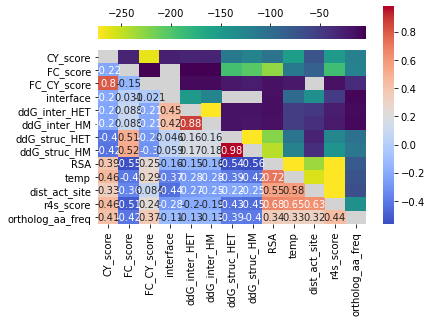

In [141]:
matrix_0 = np.triu(corr_df)
matrix_1 = np.tril(pval_df)


sns.heatmap(corr_df,annot=True,mask=matrix_0,cmap="coolwarm")
g = sns.heatmap(np.log10(pval_df),annot=False,mask=matrix_1,cmap="viridis_r", cbar_kws=dict(use_gridspec=False, location="top"))

g.set_facecolor('lightgrey')

<AxesSubplot:>

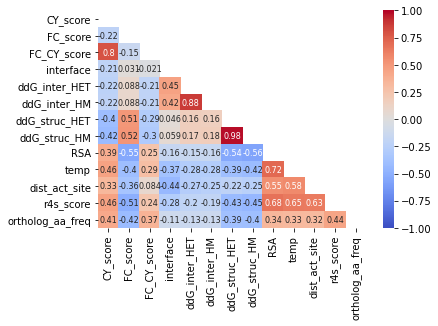

In [142]:
matrix = np.triu(subset_missense.corr(method='spearman'))

sns.heatmap(corr_matrix, cmap='coolwarm', mask=matrix, vmin=-1, vmax=1, center=0, annot=True, fmt = '.2g', annot_kws={'fontsize':8})

In [143]:
ddg_inter_above_1 = missense['ddG_inter_HET'] >= 0.25

In [144]:
2**-4.88

0.03396046445393932

In [145]:
missense['ortholog_aa_freq'].max()

0.8511627906976744

In [146]:
missense['ortholog_aa_freq'] > 0

1       False
2        True
4        True
5       False
6        True
        ...  
3291     True
3292     True
3293     True
3294     True
3295    False
Name: ortholog_aa_freq, Length: 2983, dtype: bool

Text(0, 0.5, 'CY score')

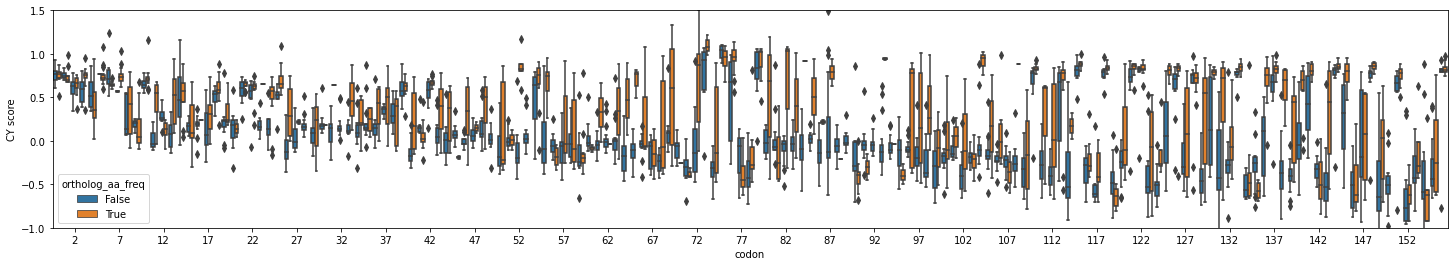

In [147]:
plt.figure(figsize=(25,4))
sns.boxplot(y =missense['CY_score'], x=missense['codon'], hue = (missense['ortholog_aa_freq'] > 0))

plt.ylim(-1,1.5)
plt.xticks(range(2,157,5), [str(x) for x in range(2,157,5)])
plt.ylabel('CY score')

In [148]:
variants_obs = missense[missense['ortholog_aa_freq'] > 0]

In [149]:
variants_obs

codon wt measured      CY_1   CY_1_R1  CY_1_MAD_1   CY_1_R2  CY_1_MAD_2  \
2         2  V        A -0.725852 -0.455205    0.315889 -0.996499    0.119774   
4         2  V        L -0.906831 -0.790490    0.306158 -1.023172    0.072184   
6         2  V        M -0.367699 -0.325223    0.000000 -0.410176    0.000000   
8         2  V        P -1.807827 -1.967567    0.199644 -1.648088    0.174800   
12        2  V        S -0.987230 -1.027244    0.298781 -0.947215    0.361018   
...     ... ..      ...       ...       ...         ...       ...         ...   
3290    158  E        N       NaN       NaN         NaN       NaN         NaN   
3291    158  E        Q       NaN       NaN         NaN       NaN         NaN   
3292    158  E        H       NaN       NaN         NaN       NaN         NaN   
3293    158  E        K       NaN       NaN         NaN       NaN         NaN   
3294    158  E        R       NaN       NaN         NaN       NaN         NaN   

          FC_1   FC_1_R1  ...  ddG_struc_HET  ddG_struc_HM  ddG_inter_HET  \
2    -3.792236 -3.869612  ...            NaN           NaN            NaN   
4    -4.320468 -4.381116  ...            NaN           NaN            NaN   
6    -3.477158 -3.819855  ...            NaN           NaN            NaN   
8    -4.176201 -3.983608  ...            NaN           NaN            NaN   
12   -4.170934 -4.259214  ...            NaN           NaN            NaN   
...        ...       ...  ...            ...           ...            ...   
3290       NaN       NaN  ...        0.11493       0.14783       -0.08022   
3291       NaN       NaN  ...       -0.55145      -0.96357        0.29700   
3292       NaN       NaN  ...       -0.08375      -0.23928        0.01440   
3293       NaN       NaN  ...       -0.63414      -1.22820        0.26376   
3294       NaN       NaN  ...       -0.84740      -1.73269        0.27192   

      ddG_inter_HM  r4s_score       RSA       temp  ortholog_aa_freq  \
2              NaN     1.4201  0.284848  31.314286          0.129032   
4              NaN     1.4201  0.284848  31.314286          0.032258   
6              NaN     1.4201  0.284848  31.314286          0.225806   
8              NaN     1.4201  0.284848  31.314286          0.161290   
12             NaN     1.4201  0.284848  31.314286          0.096774   
...            ...        ...       ...        ...               ...   
3290      -0.33906     0.0553  0.595794  20.715000          0.023697   
3291       0.25896     0.0553  0.595794  20.715000          0.009479   
3292      -0.15748     0.0553  0.595794  20.715000          0.009479   
3293       0.25662     0.0553  0.595794  20.715000          0.037915   
3294       0.09690     0.0553  0.595794  20.715000          0.004739   

      dist_act_site  mut_type  
2               NaN   Wt-like  
4               NaN   Wt-like  
6               NaN   Wt-like  
8               NaN   Wt-like  
12              NaN   Wt-like  
...             ...       ...  
3290       5.711372   Wt-like  
3291       5.711372   Wt-like  
3292       5.711372   Wt-like  
3293       5.711372   Wt-like  
3294       5.711372   Wt-like  

[1080 rows x 58 columns]

1080


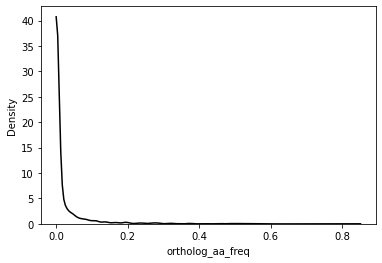

In [150]:
sns.kdeplot(missense['ortholog_aa_freq'], cut=0, color='k', bw_adjust=0.5)
print(len(variants_obs))

In [151]:
is_obs = missense['ortholog_aa_freq'] > 0


(309.5887583316155,
 2.684176746177363e-69,
 0.0637998242962351,
 array([[ 770,  714],
        [ 308, 1176]]))

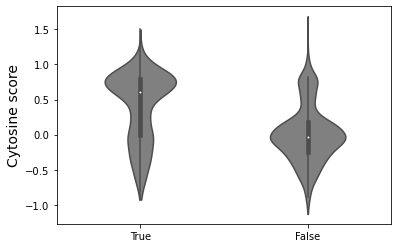

In [152]:
sns.violinplot(y =missense['CY_score'], x=(missense['ortholog_aa_freq'] > 0), cut=0, width=0.45, color='grey', order=[True, False])



plt.xlabel('')
#plt.xticks([0,1], ['No orthologs', 'In orthologs'], fontsize=14)
plt.ylabel('Cytosine score', fontsize=14)


stats.median_test(missense[is_obs]['CY_score'], missense[~is_obs]['CY_score'], nan_policy='omit')


In [153]:
len(missense[~is_obs]['CY_score'].dropna())

1890

(606.0420531849103,
 8.121107433543589e-134,
 0.03404881306721105,
 array([[ 216, 1268],
        [ 862,  622]]))

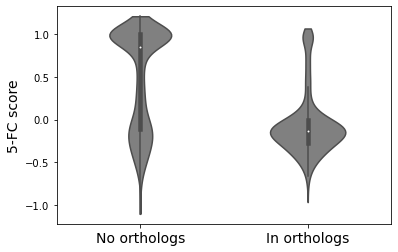

In [154]:
sns.violinplot(y =missense['FC_score'], x=(missense['ortholog_aa_freq'] > 0), cut=0, width=0.45, color='grey')

plt.xlabel('')
plt.xticks([0,1], ['No orthologs', 'In orthologs'], fontsize=14)
plt.ylabel('5-FC score', fontsize=14)

stats.median_test(missense[is_obs]['FC_score'], missense[~is_obs]['FC_score'], nan_policy='omit')



In [158]:
data_df['FC_score'].dropna()

0      -0.197819
1      -0.163936
2      -0.067115
3      -0.182365
4      -0.176187
          ...   
3292   -0.618938
3293   -0.255429
3294   -0.553013
3295   -0.613846
3296   -0.192505
Name: FC_score, Length: 3272, dtype: float64

In [329]:
group_list = [missense[(missense['interface'] == 0)&is_obs], missense[(missense['interface'] == 0.75)&is_obs],missense[(missense['interface'] == 1)&is_obs]]

for group1 in group_list:
    
    for group2 in group_list:
    
        print(stats.mannwhitneyu(group1['ortholog_aa_freq'], group2['ortholog_aa_freq']), len(group1), len(group2))

MannwhitneyuResult(statistic=245700.5, pvalue=0.4999736505887355) 701 701
MannwhitneyuResult(statistic=76959.5, pvalue=0.1505030279534939) 701 230
MannwhitneyuResult(statistic=48636.0, pvalue=0.09343253887440628) 701 149
MannwhitneyuResult(statistic=76959.5, pvalue=0.1505030279534939) 230 701
MannwhitneyuResult(statistic=26450.0, pvalue=0.4998597171465274) 230 230
MannwhitneyuResult(statistic=16791.0, pvalue=0.3705560638248241) 230 149
MannwhitneyuResult(statistic=48636.0, pvalue=0.09343253887440628) 149 701
MannwhitneyuResult(statistic=16791.0, pvalue=0.3705560638248241) 149 230
MannwhitneyuResult(statistic=11100.5, pvalue=0.49973142429712636) 149 149


In [162]:
data_df['ortholog_aa_freq'].max()

1.0

In [331]:
data_df["ortholog_aa_freq"].max()

1.0

In [163]:
missense[is_obs&(missense['FC_score']>0.921)]['ortholog_aa_freq']

codon wt measured      CY_1   CY_1_R1  CY_1_MAD_1   CY_1_R2  CY_1_MAD_2  \
197      11  D        P -3.039436 -2.729063    0.171978 -3.349810    0.416442   
256      14  G        L -2.970323 -3.222697    0.117837 -2.717948    0.249853   
258      14  G        M -3.508144 -3.053047    0.000000 -3.963241    0.000000   
261      14  G        W -3.128267 -2.879006    0.000000 -3.377528    0.000000   
266      14  G        N -2.950587 -3.016594    0.026553 -2.884580    0.025014   
268      14  G        H -3.221430 -2.968590    0.529245 -3.474270    0.315749   
284      15  M        Y -3.111882 -3.655992    0.192023 -2.567772    0.262546   
354      18  A        R -2.962447 -3.105451    0.356400 -2.819442    0.330499   
377      19  Y        E -3.306239 -3.492377    0.275273 -3.120100    0.500003   
386      20  E        P -3.150758 -3.204757    0.171348 -3.096760    0.308338   
402      21  E        V -3.155577 -3.342145    0.044114 -2.969010    0.691252   
411      21  E        S -3.161844 -3.138878    0.141343 -3.184810    0.474425   
413      21  E        N -2.918207 -2.676020    0.773444 -3.160394    0.355870   
415      21  E        H -2.936775 -3.226893    0.933072 -2.646656    0.143373   
416      21  E        K -1.525078 -1.544742    1.461595 -1.505414    1.425884   
433      22  A        T -2.942204 -3.159297    0.110123 -2.725111    0.463781   
470      24  L        P -3.165497 -2.916413    0.241760 -3.414581    0.167318   
642      32  P        S -3.191162 -3.210524    0.179125 -3.171801    0.392492   
718      36  C        L -3.076405 -3.129031    0.486316 -3.023779    0.408813   
731      36  C        K -3.193596 -3.450957    0.138996 -2.936235    0.316131   
747      37  L        S -3.373619 -3.511456    0.736574 -3.235781    0.357591   
758      38  I        A -3.373061 -3.323889    0.334323 -3.422233    0.066602   
767      38  I        Y -3.036480 -2.964221    0.595674 -3.108738    1.318711   
776      38  I        E -2.643672 -2.608557    0.033557 -2.678788    0.466773   
867      43  G        M -4.003678 -3.896928    0.000000 -4.110428    0.000000   
869      43  G        P -2.942573 -2.927273    0.127410 -2.957873    0.457963   
871      43  G        F -3.511580 -3.433105    0.343527 -3.590055    0.145523   
875      43  G        N -3.907842 -4.195585    0.418952 -3.620100    0.000000   
880      43  G        D -2.125021 -1.992661    1.075379 -2.257381    1.605573   
1015     50  H        C -4.568526 -4.958350    0.160973 -4.178702    0.166291   
1075     53  R        L -3.276996 -3.301065    0.706827 -3.252928    0.356561   
1195     58  S        D -4.484027 -4.502189    0.154604 -4.465865    0.080233   
1265     62  H        I -4.135030 -4.253071    0.087463 -4.016988    0.300026   
1274     62  H        N -4.371350 -4.814475    0.000000 -3.928224    0.000000   
1286     63  G        I -4.466222 -4.373744    0.371189 -4.558700    0.301182   
1303     64  E        G -3.847879 -3.564139    0.573671 -4.131619    0.128261   
1411     69  E        L       NaN       NaN         NaN       NaN         NaN   
1417     69  E        F       NaN       NaN         NaN       NaN         NaN   
1425     69  E        R       NaN       NaN         NaN       NaN         NaN   
1453     71  C        L       NaN       NaN         NaN       NaN         NaN   
1457     71  C        P       NaN       NaN         NaN       NaN         NaN   
1721     83  T        E       NaN       NaN         NaN       NaN         NaN   
1789     87  T        L       NaN       NaN         NaN       NaN         NaN   
1976     96  G        A       NaN       NaN         NaN       NaN         NaN   
2048     99  I        Y       NaN       NaN         NaN       NaN         NaN   
2131    103  I        F       NaN       NaN         NaN       NaN         NaN   
2165    105  R        A       NaN       NaN         NaN       NaN         NaN   
2167    105  R        L       NaN       NaN         NaN       NaN         NaN   
2183    105  R        E       NaN    

In [332]:
#Create a matplotlib colormap from the sns seagreen color palette
cmap    = sns.light_palette('grey', reverse=False, as_cmap=True )
# Normalize to the range of possible values from df["c"]
norm = matplotlib.colors.Normalize(vmin=0, vmax=0.85)
# create a color dictionary (value in c : color from colormap) 
colors_swarm = {}
for cval in missense["ortholog_aa_freq"]:
    colors_swarm.update({cval : cmap(norm(cval))})

#colors_swarm

In [334]:
substrate_binding = [51, 64, 155, 62, 91, 94, 33, 88, 156, 114, 152]

0.75    6
0.00    3
1.00    2
Name: interface, dtype: int64
13
8


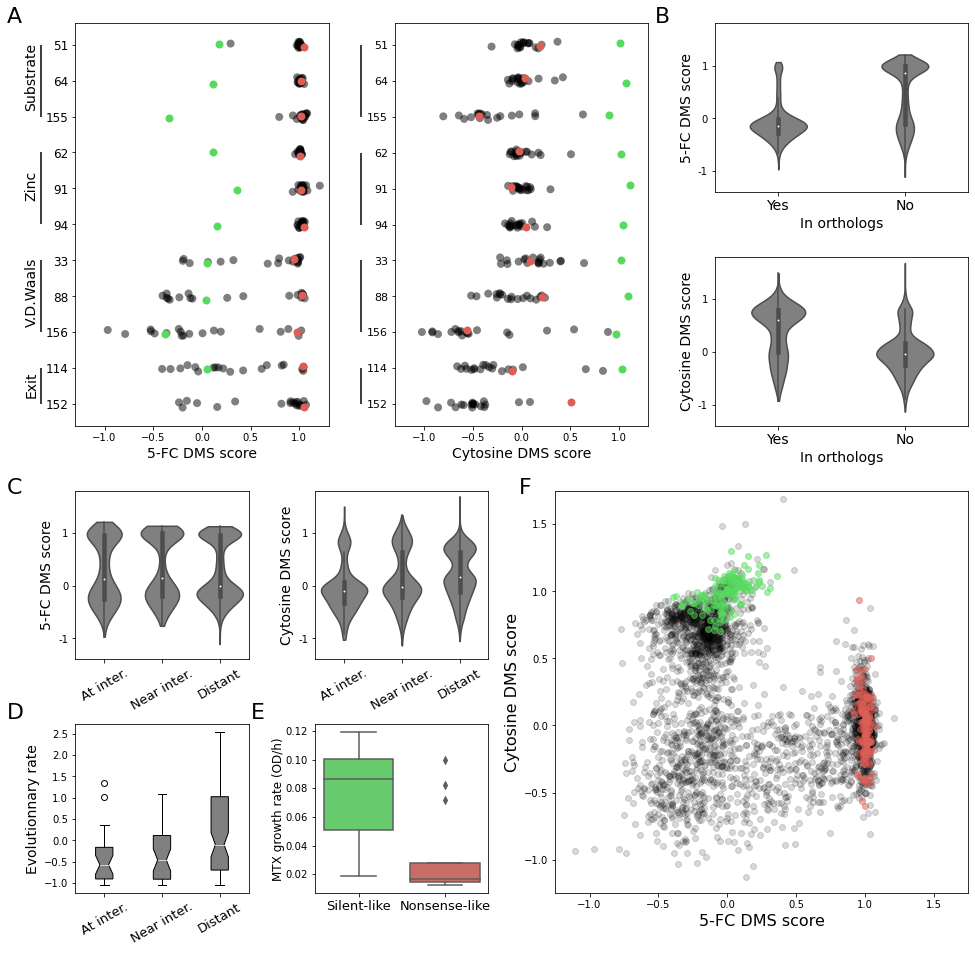

In [348]:
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(12, 12)
gs.update(hspace=5, wspace=5) # set the spacing between axes. 
colors=sns.color_palette("hls", 3)


################################################################## Panel A left
ax1 = fig.add_subplot(gs[0:6, 0:4])

select_substrate_binding = missense['codon'].isin(substrate_binding)


sns.stripplot(data = missense[select_substrate_binding], x='FC_score', y='codon', order = substrate_binding, color='k', alpha=0.5, size=8, orient='h')
sns.stripplot(data = silent[silent['codon'].isin(substrate_binding)], x='FC_score', y='codon', order = substrate_binding, color=colors[1], orient='h', size=8)

ax = sns.stripplot(data = nonsense[nonsense['codon'].isin(substrate_binding)], x='FC_score', y='codon', order = substrate_binding, color=colors[0], orient='h', size=8)


plt.xlim(-1.30,1.30)
plt.vlines([-1.65,-1.65,-1.65,-1.65], [0,3,6,9] , [2,5,8,10], color='k', clip_on=False )


plt.yticks(fontsize=12)
plt.xlabel('5-FC DMS score', fontsize=14)


plt.text(-1.75,1.75, 'Substrate', rotation=90, fontsize=14, horizontalalignment='center')

plt.text(-1.75,4.25, 'Zinc', rotation=90, fontsize=14, horizontalalignment='center')

plt.text(-1.75,7.75, 'V.D.Waals', rotation=90, fontsize=14, horizontalalignment='center')

plt.text(-1.75,9.75, 'Exit', rotation=90, fontsize=14, horizontalalignment='center')



plt.ylabel('')



################################################################## Panel A right
ax2 = fig.add_subplot(gs[0:6, 4:8])

select_substrate_binding = missense['codon'].isin(substrate_binding)


sns.stripplot(data = missense[select_substrate_binding], x='CY_score', y='codon', order = substrate_binding, color='k', alpha=0.5, size=8, orient='h')
sns.stripplot(data = silent[silent['codon'].isin(substrate_binding)], x='CY_score', y='codon', order = substrate_binding, color=colors[1], orient='h', size=8)

ax = sns.stripplot(data = nonsense[nonsense['codon'].isin(substrate_binding)], x='CY_score', y='codon', order = substrate_binding, color=colors[0], orient='h', size=8)


plt.xlim(-1.30,1.30)
plt.vlines([-1.65,-1.65,-1.65,-1.65], [0,3,6,9] , [2,5,8,10], color='k', clip_on=False )


plt.yticks(fontsize=11)
plt.xlabel('Cytosine DMS score', fontsize=14)

plt.ylabel('')



##################################################################
ax3 = fig.add_subplot(gs[0:3, 8:12])

sns.violinplot(y =missense['FC_score'], x=(missense['ortholog_aa_freq'] > 0), cut=0, width=0.45, color='grey', order=[True, False])

plt.xlabel('In orthologs', fontsize=14)
plt.xticks([0,1], ['Yes', 'No'], fontsize=14)
plt.ylabel('5-FC DMS score', fontsize=14)

plt.ylim(-1.40,1.80)
plt.yticks([-1,0,1], ([str(x) for x in [-1,0,1]]))




##################################################################
ax4 = fig.add_subplot(gs[3:6, 8:12])

sns.violinplot(y =missense['CY_score'], x=(missense['ortholog_aa_freq'] > 0), cut=0, width=0.45, color='grey', order=[True, False])



plt.xlabel('In orthologs', fontsize=14)
plt.xticks([0,1], ['Yes', 'No'], fontsize=14)
plt.ylabel('Cytosine DMS score', fontsize=14)
plt.ylim(-1.40,1.80)
plt.yticks([-1,0,1], ([str(x) for x in [-1,0,1]]))




##################################################################
ax5 = fig.add_subplot(gs[9:12, 0:3])

select_substrate_binding = silent['codon'].isin(substrate_binding)

print(silent[select_substrate_binding]['interface'].value_counts())


group_list = [silent[silent['interface'] == 1],silent[silent['interface'] == 0.75],silent[silent['interface'] == 0]]

group_vals = [list(x['r4s_score']) for x in group_list]

plt.ylabel('Evolutionnary rate', fontsize=14)

plt.boxplot(group_vals, notch=True, patch_artist=True, boxprops=dict(facecolor='grey', color='k'), medianprops=dict(color='lightgrey'))


plt.xticks([1,2,3], ['At inter.', 'Near inter.', 'Distant'], fontsize=13, rotation=30)

###########################
ax9 = fig.add_subplot(gs[9:12, 3:6])

select_clustered_muts = validations_result_hap[(validations_result_hap['Mutation cluster']!='Other')&(validations_result_hap['Mutation cluster']!='Front minima')]

print(len(validations_result_hap[(validations_result_hap['Mutation cluster']=='Nonsense-like')]['mtx_average'].dropna()))
print(len(validations_result_hap[(validations_result_hap['Mutation cluster']=='Silent-like')]['mtx_average'].dropna()))


sns.boxplot(data = select_clustered_muts, x='Mutation cluster', y='mtx_average', hue = 'Mutation cluster', palette = mut_colors, ax=ax9, dodge=False)
plt.legend([],[], frameon=False)
plt.xticks(fontsize=13)
plt.xlabel('')
plt.ylabel('MTX growth rate (OD/h)', labelpad=1, fontsize=12)


##################################################################
ax6 = fig.add_subplot(gs[6:9, 0:3])

sns.violinplot(data = missense, x='interface', y='FC_score', color='grey', cut=0, order=[1,0.75,0])

plt.xticks([0,1,2], ['At inter.', 'Near inter.', 'Distant'], fontsize=13, rotation=30)

plt.xlabel('')
plt.ylabel('5-FC DMS score', fontsize=14)
plt.ylim(-1.40,1.80)
plt.yticks([-1,0,1], ([str(x) for x in [-1,0,1]]))


##################################################################
ax7 = fig.add_subplot(gs[6:9, 3:6])


sns.violinplot(data = missense, x='interface', y='CY_score', color='grey', cut=0, order=[1,0.75,0])

plt.xticks([0,1,2], ['At inter.', 'Near inter.', 'Distant'], fontsize=13, rotation=30)

plt.xlabel('')
plt.ylabel('Cytosine DMS score', fontsize=14)

plt.ylim(-1.40,1.80)
plt.yticks([-1,0,1], ([str(x) for x in [-1,0,1]]))


##################################################################
ax8 = fig.add_subplot(gs[6:, 6:])


plt.scatter(missense['FC_score'], missense['CY_score'], color='k', alpha=0.15)

plt.scatter(nonsense['FC_score'], nonsense['CY_score'], color=colors[0], alpha=0.5)
plt.scatter(silent['FC_score'], silent['CY_score'], color=colors[1], alpha=0.5)


plt.xlabel('5-FC DMS score', fontsize=16)
plt.ylabel('Cytosine DMS score', fontsize=16)

plt.xlim(-1.25,1.75)
plt.ylim(-1.25,1.75)




ax1.text(-2,-0.60,'A', fontsize=22)

ax1.text(4.65,-0.60,'B', fontsize=22)


ax1.text(-2,12.5,'C', fontsize=22)

ax1.text(-2,18.75,'D', fontsize=22)

ax1.text(0.5,18.75,'E', fontsize=22)


ax1.text(3.25,12.5,'F', fontsize=22)



plt.savefig('./figures/act_site_inter_properties_v2.pdf', format='pdf', dpi=600)

In [349]:
validations_result_hap['Mutation cluster'].unique()

array(['Silent-like', 'Other', 'Nonsense-like', 'Front minima'],
      dtype=object)

(5.859899475524476,
 0.015489678641960682,
 0.0274999999999999,
 array([[ 3,  7],
        [10,  1]]))

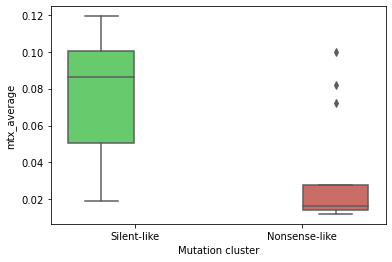

In [350]:
select_clustered_muts = validations_result_hap[(validations_result_hap['Mutation cluster']!='Other')&(validations_result_hap['Mutation cluster']!='Front minima')]
sns.boxplot(data = select_clustered_muts, x='Mutation cluster', y='mtx_average', hue = 'Mutation cluster', palette = mut_colors)
plt.legend([],[], frameon=False)

stats.median_test(validations_result_hap[validations_result_hap['Mutation cluster']=='Nonsense-like']['mtx_average'].dropna(), validations_result_hap[validations_result_hap['Mutation cluster']=='Silent-like']['mtx_average'].dropna())

In [351]:
colors[0]

(0.86, 0.3712, 0.33999999999999997)

In [352]:
missense[(missense['ortholog_aa_freq']>0)&(missense['FC_score']>0.931)][['ortholog_aa_freq']].median()

ortholog_aa_freq    0.004739
dtype: float64

In [353]:
missense[(missense['interface'] == 1)&(missense['ortholog_aa_freq']>0)&(missense['codon']==69)]

codon wt measured  CY_1  CY_1_R1  CY_1_MAD_1  CY_1_R2  CY_1_MAD_2  FC_1  \
1409     69  E        A   NaN      NaN         NaN      NaN         NaN   NaN   
1411     69  E        L   NaN      NaN         NaN      NaN         NaN   NaN   
1412     69  E        I   NaN      NaN         NaN      NaN         NaN   NaN   
1413     69  E        M   NaN      NaN         NaN      NaN         NaN   NaN   
1417     69  E        F   NaN      NaN         NaN      NaN         NaN   NaN   
1418     69  E        Y   NaN      NaN         NaN      NaN         NaN   NaN   
1419     69  E        S   NaN      NaN         NaN      NaN         NaN   NaN   
1421     69  E        N   NaN      NaN         NaN      NaN         NaN   NaN   
1422     69  E        Q   NaN      NaN         NaN      NaN         NaN   NaN   
1424     69  E        K   NaN      NaN         NaN      NaN         NaN   NaN   
1425     69  E        R   NaN      NaN         NaN      NaN         NaN   NaN   
1426     69  E        D   NaN      NaN         NaN      NaN         NaN   NaN   

      FC_1_R1  ...  ddG_struc_HET  ddG_struc_HM  ddG_inter_HET  ddG_inter_HM  \
1409      NaN  ...        0.67451       2.49911        1.50422       4.17524   
1411      NaN  ...        0.34434       1.41897        1.31188       3.24224   
1412      NaN  ...        2.19209       4.92978        1.78976       3.44460   
1413      NaN  ...       -0.02138       0.70137        1.56676       2.48832   
1417      NaN  ...        0.44143       0.31851        0.69084       0.35288   
1418      NaN  ...        1.00579       2.00176        1.40892       2.48692   
1419      NaN  ...        0.93452       3.07596        0.81828       3.11504   
1421      NaN  ...        0.31262       1.67058        0.43572       1.86686   
1422      NaN  ...        0.10104       1.61639        0.89804       2.84584   
1424      NaN  ...        0.16131       1.79958        1.47618       4.17418   
1425      NaN  ...        0.03280       1.98685        0.62356       4.72904   
1426      NaN  ...        0.34808       1.17153        0.18312       0.76686   

      r4s_score       RSA       temp  ortholog_aa_freq  dist_act_site  \
1409    -0.3622  0.191589  11.052222          0.009302       5.114874   
1411    -0.3622  0.191589  11.052222          0.027907       5.114874   
1412    -0.3622  0.191589  11.052222          0.004651       5.114874   
1413    -0.3622  0.191589  11.052222          0.004651       5.114874   
1417    -0.3622  0.191589  11.052222          0.037209       5.114874   
1418    -0.3622  0.191589  11.052222          0.023256       5.114874   
1419    -0.3622  0.191589  11.052222          0.004651       5.114874   
1421    -0.3622  0.191589  11.052222          0.013953       5.114874   
1422    -0.3622  0.191589  11.052222          0.037209       5.114874   
1424    -0.3622  0.191589  11.052222          0.004651       5.114874   
1425    -0.3622  0.191589  11.052222          0.116279       5.114874   
1426    -0.3622  0.191589  11.052222          0.009302       5.114874   

           mut_type  
1409          Elbow  
1411  Nonsense-like  
1412  Nonsense-like  
1413          other  
1417  Nonsense-like  
1418  Nonsense-like  
1419          Elbow  
1421          Elbow  
1422          Elbow  
1424  Nonsense-like  
1425  Nonsense-like  
1426          Elbow  

[12 rows x 58 columns]

In [184]:
stats.spearmanr(missense['ortholog_aa_freq'], missense['dist_act_site'], nan_policy='omit')

SpearmanrResult(correlation=0.31870999251652, pvalue=5.851377046891343e-71)

In [355]:
vir =  ['#440154', '#440255', '#440357', '#450558', '#45065A', '#45085B', '#46095C', '#460B5E', '#460C5F', '#460E61', '#470F62', '#471163',
        '#471265', '#471466', '#471567', '#471669', '#47186A', '#48196B', '#481A6C', '#481C6E', '#481D6F', '#481E70', '#482071', '#482172',
        '#482273', '#482374', '#472575', '#472676', '#472777', '#472878', '#472A79', '#472B7A', '#472C7B', '#462D7C', '#462F7C', '#46307D',
        '#46317E', '#45327F', '#45347F', '#453580', '#453681', '#443781', '#443982', '#433A83', '#433B83', '#433C84', '#423D84', '#423E85',
        '#424085', '#414186', '#414286', '#404387', '#404487', '#3F4587', '#3F4788', '#3E4888', '#3E4989', '#3D4A89', '#3D4B89', '#3D4C89',
        '#3C4D8A', '#3C4E8A', '#3B508A', '#3B518A', '#3A528B', '#3A538B', '#39548B', '#39558B', '#38568B', '#38578C', '#37588C', '#37598C',
        '#365A8C', '#365B8C', '#355C8C', '#355D8C', '#345E8D', '#345F8D', '#33608D', '#33618D', '#32628D', '#32638D', '#31648D', '#31658D',
        '#31668D', '#30678D', '#30688D', '#2F698D', '#2F6A8D', '#2E6B8E', '#2E6C8E', '#2E6D8E', '#2D6E8E', '#2D6F8E', '#2C708E', '#2C718E',
        '#2C728E', '#2B738E', '#2B748E', '#2A758E', '#2A768E', '#2A778E', '#29788E', '#29798E', '#287A8E', '#287A8E', '#287B8E', '#277C8E',
        '#277D8E', '#277E8E', '#267F8E', '#26808E', '#26818E', '#25828E', '#25838D', '#24848D', '#24858D', '#24868D', '#23878D', '#23888D',
        '#23898D', '#22898D', '#228A8D', '#228B8D', '#218C8D', '#218D8C', '#218E8C', '#208F8C', '#20908C', '#20918C', '#1F928C', '#1F938B',
        '#1F948B', '#1F958B', '#1F968B', '#1E978A', '#1E988A', '#1E998A', '#1E998A', '#1E9A89', '#1E9B89', '#1E9C89', '#1E9D88', '#1E9E88',
        '#1E9F88', '#1EA087', '#1FA187', '#1FA286', '#1FA386', '#20A485', '#20A585', '#21A685', '#21A784', '#22A784', '#23A883', '#23A982',
        '#24AA82', '#25AB81', '#26AC81', '#27AD80', '#28AE7F', '#29AF7F', '#2AB07E', '#2BB17D', '#2CB17D', '#2EB27C', '#2FB37B', '#30B47A',
        '#32B57A', '#33B679', '#35B778', '#36B877', '#38B976', '#39B976', '#3BBA75', '#3DBB74', '#3EBC73', '#40BD72', '#42BE71', '#44BE70',
        '#45BF6F', '#47C06E', '#49C16D', '#4BC26C', '#4DC26B', '#4FC369', '#51C468', '#53C567', '#55C666', '#57C665', '#59C764', '#5BC862',
        '#5EC961', '#60C960', '#62CA5F', '#64CB5D', '#67CC5C', '#69CC5B', '#6BCD59', '#6DCE58', '#70CE56', '#72CF55', '#74D054', '#77D052',
        '#79D151', '#7CD24F', '#7ED24E', '#81D34C', '#83D34B', '#86D449', '#88D547', '#8BD546', '#8DD644', '#90D643', '#92D741', '#95D73F',
        '#97D83E', '#9AD83C', '#9DD93A', '#9FD938', '#A2DA37', '#A5DA35', '#A7DB33', '#AADB32', '#ADDC30', '#AFDC2E', '#B2DD2C', '#B5DD2B',
        '#B7DD29', '#BADE27', '#BDDE26', '#BFDF24', '#C2DF22', '#C5DF21', '#C7E01F', '#CAE01E', '#CDE01D', '#CFE11C', '#D2E11B', '#D4E11A',
        '#D7E219', '#DAE218', '#DCE218', '#DFE318', '#E1E318', '#E4E318', '#E7E419', '#E9E419', '#ECE41A', '#EEE51B', '#F1E51C', '#F3E51E',
        '#F6E61F', '#F8E621', '#FAE622', '#FDE724']

In [188]:
0, 63, 127, 191, 255

(0, 63, 127, 191, 255)

In [189]:
vir[0], vir[63], vir[127], vir[191], vir[255]

('#440154', '#3B518A', '#208F8C', '#5BC862', '#FDE724')

In [191]:
min(CY_medians), max(CY_medians)

(-0.7559078316464243, 1.0244276305295164)

In [192]:
min(FC_medians), max(FC_medians)

(-0.5376932755847419, 1.0327780297677769)

## Write annotation files for ChimeraX

In [358]:
median_cy_annot_pdb = './pdb/median_CY_annot.defattr'
median_fc_annot_pdb = './pdb/median_FC_annot.defattr'
median_cyA_fcB_annot_pdb = './pdb/median_CYaFCb_annot.defattr'

with open(median_cy_annot_pdb, 'w') as dest:
    
    dest.write('#\n')
    dest.write('attribute: medianCY\n')
    dest.write('match mode: 1-to-1\n')
    dest.write('recipient: residues\n')
    
    for chain in ['A', 'B']:

        
        if chain == 'A':

            
            for x in range(0,157):
                
                if x != 0:
                    
                    dms_score = CY_medians[x]
                    annot = '\t:'+str((x+2))+'\t'+str(dms_score)+'\n'

                    dest.write(annot)
                    
                    
        if chain =='B':
            
            for x in range(0,157):
                
                dms_score = CY_medians[x]
                annot = '\t:'+str((x+1+201))+'\t'+str(dms_score)+'\n'

                dest.write(annot)
                
                
with open(median_fc_annot_pdb, 'w') as dest:
    
    dest.write('#\n')
    dest.write('attribute: medianFC\n')
    dest.write('match mode: 1-to-1\n')
    dest.write('recipient: residues\n')
    
    for chain in ['A', 'B']:

        
        if chain == 'A':

            
            for x in range(0,157):
                
                if x != 0:
                    
                    dms_score = FC_medians[x]
                    annot = '\t:'+str((x+2))+'\t'+str(dms_score)+'\n'

                    dest.write(annot)
                    
                    
        if chain =='B':
            
            for x in range(0,157):
                
                dms_score = FC_medians[x]
                annot = '\t:'+str((x+1+201))+'\t'+str(dms_score)+'\n'

                dest.write(annot)
            
with open(median_cyA_fcB_annot_pdb, 'w') as dest:
    
    dest.write('#\n')
    dest.write('attribute: medianCyaFCb\n')
    dest.write('match mode: 1-to-1\n')
    dest.write('recipient: residues\n')
    
    for chain in ['A', 'B']:

        
        if chain == 'A':

            
            for x in range(0,157):
                
                if x != 0:
                    
                    dms_score = FC_medians[x]
                    annot = '\t:'+str((x+2))+'\t'+str(dms_score)+'\n'

                    dest.write(annot)
                    
                    
        if chain =='B':
            
            for x in range(0,157):
                
                dms_score = CY_medians[x]
                annot = '\t:'+str((x+1+201))+'\t'+str(dms_score)+'\n'

                dest.write(annot)
                


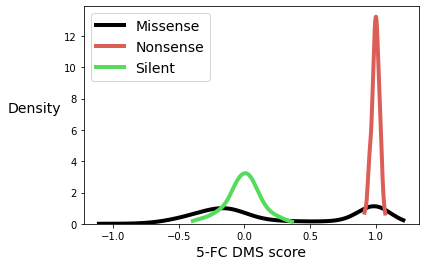

In [359]:
sns.kdeplot(missense['FC_score'], color='k', cut=0, linewidth=4)
sns.kdeplot(nonsense['FC_score'], color=colors[0], cut=0, linewidth=4)
sns.kdeplot(silent['FC_score'], color=colors[1], cut=0, linewidth=4)

plt.legend(['Missense', 'Nonsense', 'Silent'], fontsize=14)

plt.xlabel('5-FC DMS score', fontsize=14)
plt.ylabel('Density', fontsize=14, rotation=0, labelpad=30)

plt.savefig('./figures/5fckdeplot.svg', format='svg', dpi=300)

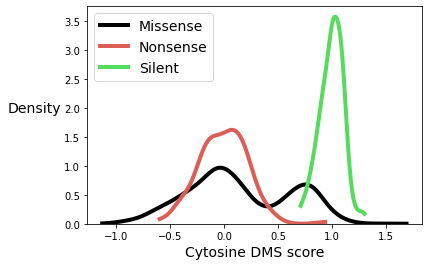

In [360]:
sns.kdeplot(missense['CY_score'], color='k', cut=0, linewidth=4)
sns.kdeplot(nonsense['CY_score'], color=colors[0], cut=0, linewidth=4)
sns.kdeplot(silent['CY_score'], color=colors[1], cut=0, linewidth=4)

plt.legend(['Missense','Nonsense', 'Silent'], fontsize=14)

plt.xlabel('Cytosine DMS score', fontsize=14)
plt.ylabel('Density', fontsize=14, rotation=0, labelpad=30)

plt.savefig('./figures/cytockdeplot.svg', format='svg', dpi=300)

In [361]:
select_stop

0        True
1       False
2       False
3       False
4       False
        ...  
3292    False
3293    False
3294    False
3295    False
3296    False
Name: measured, Length: 3297, dtype: bool

In [362]:
spurious_stop = data_df['codon'].isin([2,3,4,5,158])

In [363]:
data_df[select_stop&(~spurious_stop)]

codon wt measured      CY_1   CY_1_R1  CY_1_MAD_1   CY_1_R2  CY_1_MAD_2  \
84        6  M        * -2.849809 -2.979984    0.090473 -2.719634    0.148443   
105       7  A        * -2.539354 -2.215751    0.048836 -2.862958    0.208912   
126       8  S        * -2.922096 -2.639128    0.629446 -3.205063    0.151997   
147       9  K        * -2.431559 -2.449471    0.835190 -2.413647    0.965446   
168      10  W        * -0.136679 -0.322614    0.504528  0.049255    0.105939   
...     ... ..      ...       ...       ...         ...       ...         ...   
3171    153  F        *       NaN       NaN         NaN       NaN         NaN   
3192    154  E        *       NaN       NaN         NaN       NaN         NaN   
3213    155  D        *       NaN       NaN         NaN       NaN         NaN   
3234    156  I        *       NaN       NaN         NaN       NaN         NaN   
3255    157  G        *       NaN       NaN         NaN       NaN         NaN   

          FC_1   FC_1_R1  ...  ddG_struc_HET  ddG_struc_HM  ddG_inter_HET  \
84    1.174669  1.174345  ...            NaN           NaN            NaN   
105   1.298664  1.397968  ...            NaN           NaN            NaN   
126   1.296614  1.097120  ...            NaN           NaN            NaN   
147   1.244384  1.215765  ...            NaN           NaN            NaN   
168   1.184129  1.158049  ...            NaN           NaN            NaN   
...        ...       ...  ...            ...           ...            ...   
3171       NaN       NaN  ...            NaN           NaN            NaN   
3192       NaN       NaN  ...            NaN           NaN            NaN   
3213       NaN       NaN  ...            NaN           NaN            NaN   
3234       NaN       NaN  ...            NaN           NaN            NaN   
3255       NaN       NaN  ...            NaN           NaN            NaN   

      ddG_inter_HM  r4s_score       RSA       temp  ortholog_aa_freq  \
84             NaN     2.5208  0.736453  18.509792               NaN   
105            NaN     0.8677  0.615702  14.149000               NaN   
126            NaN     1.7803  0.192308  14.804167               NaN   
147            NaN     1.4550  0.739130  20.678333               NaN   
168            NaN     1.0380  0.196970  18.152143               NaN   
...            ...        ...       ...        ...               ...   
3171           NaN     0.0106  0.296053  14.426364               NaN   
3192           NaN    -0.9265  0.091121  10.023333               NaN   
3213           NaN    -0.9460  0.008021   8.413750               NaN   
3234           NaN    -0.8920  0.082051  10.215625               NaN   
3255           NaN    -0.6409  0.020619  10.876250               NaN   

      dist_act_site       mut_type  
84        19.303847  Nonsense-like  
105       18.769834  Nonsense-like  
126       17.106971  Nonsense-like  
147       19.359661  Nonsense-like  
168       15.447535          other  
...             ...            ...  
3171       3.203988  Nonsense-like  
3192       1.329213  Nonsense-like  
3213       0.000000  Nonsense-like  
3234       1.328411  Nonsense-like  
3255       3.428099  Nonsense-like  

[152 rows x 58 columns]

In [364]:
def plot_percentile(data, edge, color):
    
    median = np.nanmedian(data)
    
    plt.axvline(median, linestyle='-', color=color)
    plt.axvline(np.nanpercentile(data, edge), linestyle='--', color=color)
    plt.axvline(np.nanpercentile(data, 100-edge), linestyle='--', color=color)
    return median
    
    

In [365]:
np.nanpercentile(data_df[select_wt]['CY_score'], 2.5)

0.7603258883547455

(0.0, 6.0)

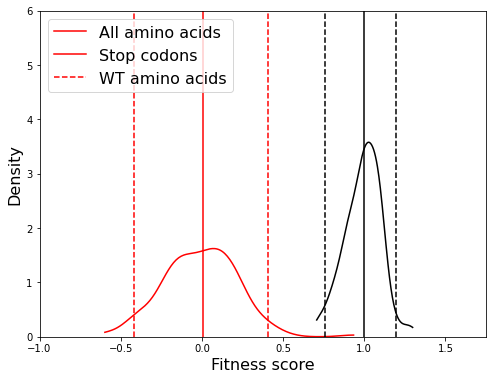

In [366]:
plt.figure(figsize=(8,6))

#sns.kdeplot(data_df['CY_123'], color='grey', cut=0)

sns.kdeplot(data_df[select_stop&(~spurious_stop)]['CY_score'], color='r', cut=0)
plot_percentile(data_df[select_stop&(~spurious_stop)]['CY_score'], 2.5, 'r')


sns.kdeplot(data_df[select_wt]['CY_score'], color='k', cut=0)
plot_percentile(data_df[select_wt]['CY_score'], 2.5, 'k')


plt.legend(['All amino acids',  'Stop codons', 'WT amino acids'], loc='upper left', fontsize=16)


plt.xlabel('Fitness score', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.xlim(-1,1.75)
plt.ylim(0,6)

In [367]:
data_df[select_stop&(~spurious_stop)]

codon wt measured      CY_1   CY_1_R1  CY_1_MAD_1   CY_1_R2  CY_1_MAD_2  \
84        6  M        * -2.849809 -2.979984    0.090473 -2.719634    0.148443   
105       7  A        * -2.539354 -2.215751    0.048836 -2.862958    0.208912   
126       8  S        * -2.922096 -2.639128    0.629446 -3.205063    0.151997   
147       9  K        * -2.431559 -2.449471    0.835190 -2.413647    0.965446   
168      10  W        * -0.136679 -0.322614    0.504528  0.049255    0.105939   
...     ... ..      ...       ...       ...         ...       ...         ...   
3171    153  F        *       NaN       NaN         NaN       NaN         NaN   
3192    154  E        *       NaN       NaN         NaN       NaN         NaN   
3213    155  D        *       NaN       NaN         NaN       NaN         NaN   
3234    156  I        *       NaN       NaN         NaN       NaN         NaN   
3255    157  G        *       NaN       NaN         NaN       NaN         NaN   

          FC_1   FC_1_R1  ...  ddG_struc_HET  ddG_struc_HM  ddG_inter_HET  \
84    1.174669  1.174345  ...            NaN           NaN            NaN   
105   1.298664  1.397968  ...            NaN           NaN            NaN   
126   1.296614  1.097120  ...            NaN           NaN            NaN   
147   1.244384  1.215765  ...            NaN           NaN            NaN   
168   1.184129  1.158049  ...            NaN           NaN            NaN   
...        ...       ...  ...            ...           ...            ...   
3171       NaN       NaN  ...            NaN           NaN            NaN   
3192       NaN       NaN  ...            NaN           NaN            NaN   
3213       NaN       NaN  ...            NaN           NaN            NaN   
3234       NaN       NaN  ...            NaN           NaN            NaN   
3255       NaN       NaN  ...            NaN           NaN            NaN   

      ddG_inter_HM  r4s_score       RSA       temp  ortholog_aa_freq  \
84             NaN     2.5208  0.736453  18.509792               NaN   
105            NaN     0.8677  0.615702  14.149000               NaN   
126            NaN     1.7803  0.192308  14.804167               NaN   
147            NaN     1.4550  0.739130  20.678333               NaN   
168            NaN     1.0380  0.196970  18.152143               NaN   
...            ...        ...       ...        ...               ...   
3171           NaN     0.0106  0.296053  14.426364               NaN   
3192           NaN    -0.9265  0.091121  10.023333               NaN   
3213           NaN    -0.9460  0.008021   8.413750               NaN   
3234           NaN    -0.8920  0.082051  10.215625               NaN   
3255           NaN    -0.6409  0.020619  10.876250               NaN   

      dist_act_site       mut_type  
84        19.303847  Nonsense-like  
105       18.769834  Nonsense-like  
126       17.106971  Nonsense-like  
147       19.359661  Nonsense-like  
168       15.447535          other  
...             ...            ...  
3171       3.203988  Nonsense-like  
3192       1.329213  Nonsense-like  
3213       0.000000  Nonsense-like  
3234       1.328411  Nonsense-like  
3255       3.428099  Nonsense-like  

[152 rows x 58 columns]

(0.0, 14.0)

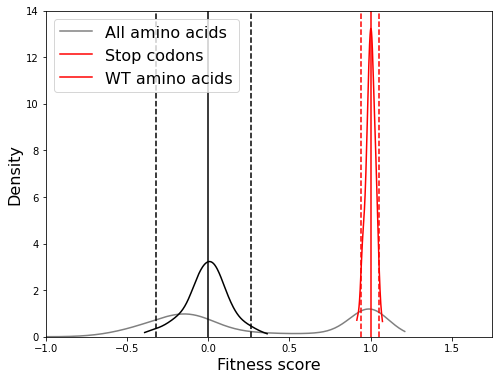

In [372]:
plt.figure(figsize=(8,6))


sns.kdeplot(data_df['FC_score'], color='grey', cut=0)
sns.kdeplot(data_df[select_stop&(~spurious_stop)]['FC_score'], color='r', cut=0)
plot_percentile(data_df[select_stop&(~spurious_stop)]['FC_score'], 2.5, 'r')

sns.kdeplot(data_df[select_wt]['FC_score'], color='k', cut=0)
plot_percentile(data_df[select_wt]['FC_score'], 2.5, 'k')



plt.legend(['All amino acids',  'Stop codons', 'WT amino acids'], loc='upper left', fontsize=16)


plt.xlabel('Fitness score', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.xlim(-1,1.75)
plt.ylim(0,14)

(0.0, 6.0)

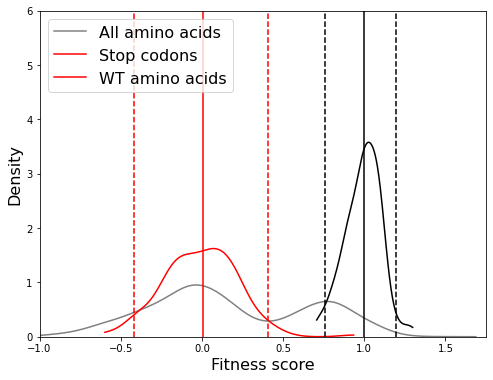

In [373]:
plt.figure(figsize=(8,6))


sns.kdeplot(data_df['CY_score'], color='grey', cut=0)
sns.kdeplot(data_df[select_stop&(~spurious_stop)]['CY_score'], color='r', cut=0)
plot_percentile(data_df[select_stop&(~spurious_stop)]['CY_score'], 2.5, 'r')

sns.kdeplot(data_df[select_wt]['CY_score'], color='k', cut=0)
plot_percentile(data_df[select_wt]['CY_score'], 2.5, 'k')



plt.legend(['All amino acids',  'Stop codons', 'WT amino acids'], loc='upper left', fontsize=16)


plt.xlabel('Fitness score', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.xlim(-1,1.75)
plt.ylim(0,6)

In [374]:
[(np.nanpercentile(data_df[select_wt]['CY_score'], 1), np.nanpercentile(data_df[select_wt]['FC_score'], 99)),
                  (np.nanpercentile(data_df[select_stop&(~spurious_stop)]['CY_score'], 99), np.nanpercentile(data_df[select_stop&(~spurious_stop)]['FC_score'], 1)), 
                  (0.29107748180149023, 0.5971137493748857)]

#data_df['mut_type'] = data_df.apply(lambda x: f_type(x['CY_123'], x['FC_123']), axis=1)
#[(np.nanpercentile(data_df[select_wt]['CY_123'], 97.5), np.nanpercentile(data_df[select_wt]['FC_123'], 2.5)), (np.nanpercentile(data_df[select_stop&(~spurious_stop)]['CY_123'], 2.5), np.nanpercentile(data_df[select_stop&(~spurious_stop)]['FC_123'], 97.5)), (0.1, 0.1)], axis=1))

[(0.7168201509581851, 0.30087411278765447),
 (0.46433161196741496, 0.9211545368509522),
 (0.29107748180149023, 0.5971137493748857)]

In [375]:
data_df['mut_type'] = data_df.apply(lambda x: f_type(x['CY_score'], x['FC_score']), axis=1)

In [376]:
data_df['mut_type'] = data_df.apply(lambda x: f_type(x['CY_score'], x['FC_score'], thresholds = [(0.7148245838322209, 0.29107748180149023),
 (0.5971137493748857, 0.9309622729264995),
 (0.29107748180149023, 0.5971137493748857)]),axis=1)


In [377]:
print(len(missense[missense['CY_score']<=0.5]['CY_score'].dropna()), len(missense[missense['CY_score']>0.5]))


2083 885


In [378]:
print(len(missense[missense['FC_score']<=0.5]['FC_score'].dropna()), len(missense[missense['FC_score']>0.5]['FC_score'].dropna()))


1782 1186


In [379]:
1784+1198

2982

In [380]:
colors=sns.color_palette("hls", 3)

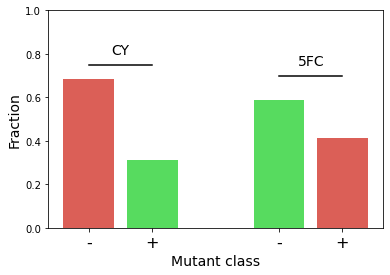

In [381]:
plt.bar([1,2, 4,5], [2256/3286, 1031/3286, 1937/3286, 1350/3286], color=[colors[0], colors[1], colors[1], colors[0]])

plt.ylim(0,1)

plt.plot([1,2],[0.75,0.75], 'k-')
plt.text(1.35,0.8, 'CY', fontsize=14)

plt.plot([4,5],[0.7,0.7], 'k-')
plt.text(4.30,0.75, '5FC', fontsize=14)


plt.xticks([1,2,4,5], ['-', '+', '-', '+'], fontsize=16)

plt.xlabel('Mutant class', fontsize=14)
plt.ylabel('Fraction', fontsize=14)

plt.savefig('./figures/proportion_mutant_phen.svg', format='svg', dpi=300)

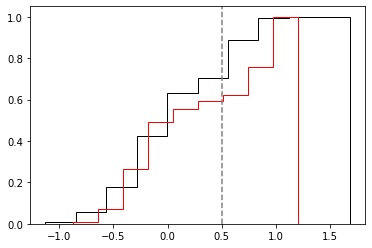

In [382]:
plt.hist(data_df['CY_score'], histtype='step', cumulative=True, color='k', density=True)
plt.hist(data_df['FC_score'], histtype='step', cumulative=True, color='r', density=True)

plt.axvline(0.5, linestyle='--', color='grey')

<AxesSubplot:xlabel='CY_score', ylabel='Density'>

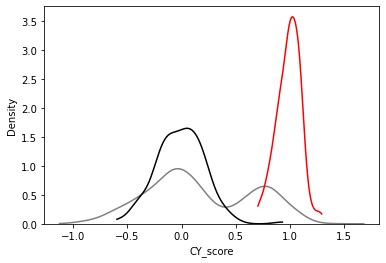

In [383]:
sns.kdeplot(data_df['CY_score'], color='grey', cut=0)
sns.kdeplot(data_df[select_stop]['CY_score'], color='k', cut=0)
sns.kdeplot(data_df[select_wt]['CY_score'], color='r', cut=0)

Text(0, 0.5, 'Fitness in 5-FC')

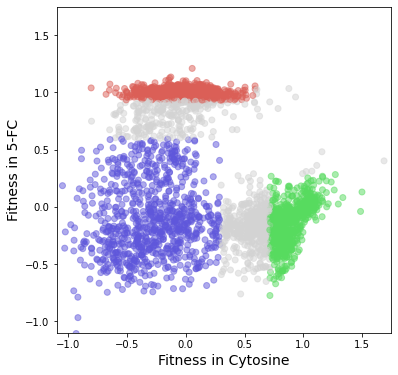

In [384]:
plt.figure(figsize=(6,6))

mut_colors = {'Wt-like':colors[1], 'Nonsense-like':colors[0], 'Elbow':colors[2], 'other':'lightgrey'}


plt.scatter(data_df['CY_score'], data_df['FC_score'], c=data_df['mut_type'].map(mut_colors), alpha=0.5)


plt.xlim(-1.1, 1.75)
plt.ylim(-1.1, 1.75)

plt.xlabel('Fitness in Cytosine', fontsize=14)
plt.ylabel('Fitness in 5-FC', fontsize=14)

In [385]:
data_df.columns


Index(['codon', 'wt', 'measured', 'CY_1', 'CY_1_R1', 'CY_1_MAD_1', 'CY_1_R2',
       'CY_1_MAD_2', 'FC_1', 'FC_1_R1', 'FC_1_MAD_1', 'FC_1_R2', 'FC_1_MAD_2',
       'CY_2', 'CY_2_R1', 'CY_2_MAD_1', 'CY_2_R2', 'CY_2_MAD_2', 'FC_2',
       'FC_2_R1', 'FC_2_MAD_1', 'FC_2_R2', 'FC_2_MAD_2', 'FC_CY_2',
       'FC_CY_2_R1', 'FC_CY_2_MAD_1', 'FC_CY_2_R2', 'FC_CY_2_MAD_2', 'CY_3',
       'CY_3_R1', 'CY_3_MAD_1', 'CY_3_R2', 'CY_3_MAD_2', 'FC_3', 'FC_3_R1',
       'FC_3_MAD_1', 'FC_3_R2', 'FC_3_MAD_2', 'CY_1_to_2', 'CY_3_to_2',
       'FC_1_to_2', 'FC_3_to_2', 'CY_123', 'FC_123', 'CY_score', 'FC_score',
       'FC_CY_score', 'interface', 'ddG_struc_HET', 'ddG_struc_HM',
       'ddG_inter_HET', 'ddG_inter_HM', 'r4s_score', 'RSA', 'temp',
       'ortholog_aa_freq', 'dist_act_site', 'mut_type'],
      dtype='object')

In [386]:
facet_cols = ['interface', 'ddG_struc_HET','ddG_inter_HET', 'ddG_inter_HM', 'nat_variants', 'r4s_score', 'RSA','temp', 'ddG', 'inter_ddG']

In [387]:
colors = []

In [388]:
data_df['mut_type'].unique()

array(['Elbow', 'Wt-like', 'other', 'Nonsense-like'], dtype=object)

In [389]:
select_wt_like  = data_df['mut_type'] == 'Wt-like'
select_nonsense_like = data_df['mut_type'] == 'Nonsense-like'
select_elbow = data_df['mut_type'] == 'Elbow'
select_other = data_df['mut_type'] == 'other'



In [390]:
colors=sns.color_palette("hls", 3)
colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.3712, 0.33999999999999997, 0.86)]

In [393]:
x_vals = data_df[select_stop|select_wt]['CY_score'].dropna()
y_vals = data_df[select_stop|select_wt]['FC_score'].dropna()

def front(x,a,k):
    return ((a)*((x)**-k))

In [394]:
popt, pcov = sci.optimize.curve_fit(front, x_vals, y_vals,)


/home/phil/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [395]:
popt

array([nan, nan])

In [396]:
residuals = y_vals - front(x_vals, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_vals-np.mean(y_vals))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

1.0

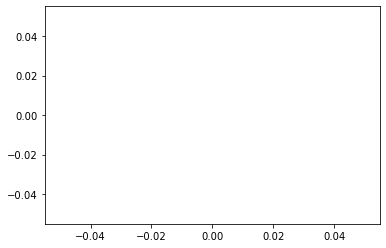

In [397]:
plt.plot(sorted(list(x_vals)), front(sorted(list(x_vals)), *popt), 'k-')


In [398]:
plt.figure(figsize=(5,5))

x = np.linspace(-0.15,0.85, 100)


# the function, which is y = x^2 here
y = ((1.25/(x+0.151))/1000)-0.25



<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Fitness in 5-FC')

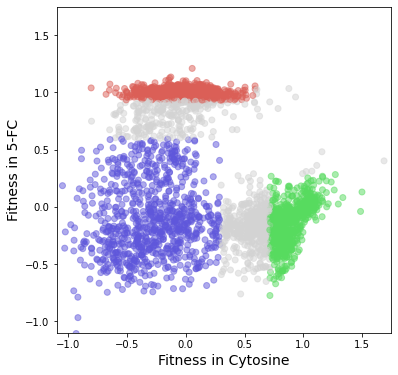

In [399]:
plt.figure(figsize=(6,6))

mut_colors = {'Wt-like':colors[1], 'Nonsense-like':colors[0], 'Elbow':colors[2], 'other':'lightgrey'}


plt.scatter(data_df['CY_score'], data_df['FC_score'], c=data_df['mut_type'].map(mut_colors), alpha=0.5)
plt.plot(sorted(list(x_vals)), front(sorted(list(x_vals)), *popt), 'k-')

#plt.plot(x,y, '-k')

plt.xlim(-1.1, 1.75)
plt.ylim(-1.1, 1.75)

plt.xlabel('Fitness in Cytosine', fontsize=14)
plt.ylabel('Fitness in 5-FC', fontsize=14)

In [400]:
from math import hypot



In [401]:
def arclength(f, a, b, tol=1e-6):
    """Compute the arc length of function f(x) for a <= x <= b. Stop
    when two consecutive approximations are closer than the value of
    tol.
    """
    nsteps = 1  # number of steps to compute
    oldlength = 1.0e20
    length = 1.0e10
    while abs(oldlength - length) >= tol:
        nsteps *= 2
        fx1 = f(a)
        xdel = (b - a) / nsteps  # space between x-values
        oldlength = length
        length = 0
        for i in range(1, nsteps + 1):
            fx0 = fx1  # previous function value
            fx1 = f(a + i * (b - a) / nsteps)  # new function value
            length += hypot(xdel, fx1 - fx0)  # length of small line segment
    return length

def f(x):
    return ((1.25/(x+0.151))/1000)-0.25

print(arclength(f, -0.15, 0.85, 1e-10))

2.191092595277594


In [402]:
x_vals = list(np.linspace(-0.15,0.85, 10000))
print(len(x_vals))

10000


In [403]:
windows = []

for x in x_vals:
    x1 = x
    
    if x <0.85:
        x2= x_vals[x_vals.index(x)+1]
        
        windows.append(tuple((x1, x2)))

    

In [404]:
length_list = []

for x in x_vals:
    length_list.append(arclength(f, -0.15, x, 1e-6))

In [405]:
len(length_list)

10000

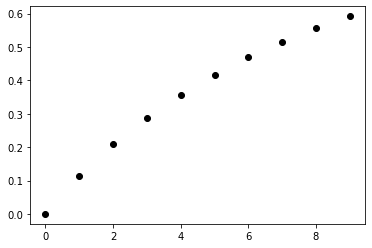

In [406]:
x = range(0,10)
plt.plot(x,length_list[0:10], 'ko')

In [407]:
max(length_list)

2.1910923427616034

In [408]:
pos_along_len = list(np.linspace(0,2.19,25))
pos_along_len

[0.0,
 0.09125,
 0.1825,
 0.27375,
 0.365,
 0.45625,
 0.5475,
 0.6387499999999999,
 0.73,
 0.82125,
 0.9125,
 1.00375,
 1.095,
 1.18625,
 1.2774999999999999,
 1.36875,
 1.46,
 1.55125,
 1.6425,
 1.73375,
 1.825,
 1.91625,
 2.0075,
 2.09875,
 2.19]

In [409]:
f_centroids = []


for dist in pos_along_len:
    absolute_difference_function = lambda list_value : abs(list_value - dist)
    closest_value = min(length_list, key=absolute_difference_function)
    
    #print(closest_value, x_vals[length_list.index(closest_value)])
    
    f_centroids.append(x_vals[length_list.index(closest_value)])




In [410]:
type(f_centroids)

list

In [411]:
f_centroids[0]

-0.15

In [412]:
f(-0.15)

0.9999999999999989

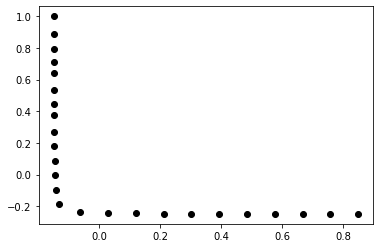

In [413]:
centroid_tuples = []

for x in f_centroids:
    
    centroid_tuples.append(tuple((x, f(x))))


plt.plot(f_centroids, [f(x)for x in f_centroids], 'ko')

In [414]:
centroid_tuples

[(-0.15, 0.9999999999999989),
 (-0.1498999899989999, 0.8863533048458938),
 (-0.1497999799979998, 0.7916493041086745),
 (-0.1496999699969997, 0.7115162704823433),
 (-0.1495999599959996, 0.6428316308307721),
 (-0.1493999399939994, 0.5312207012938294),
 (-0.1491999199919992, 0.44441357853213925),
 (-0.148999899989999, 0.37496874843742045),
 (-0.1485998599859986, 0.27080295012292044),
 (-0.1480998099809981, 0.18100624159453654),
 (-0.14729972997299728, 0.08781318414011086),
 (-0.1458995899589959, -0.0049216651306882575),
 (-0.1428992899289929, -0.09569253941406683),
 (-0.13169816981698168, -0.18523930175804024),
 (-0.06319131913191318, -0.23576450542654376),
 (0.02771777177717774, -0.24300573195620143),
 (0.11892689268926895, -0.24536911647614543),
 (0.21013601360136017, -0.2465387002322626),
 (0.3014451445144515, -0.24723723413731966),
 (0.3926542654265427, -0.24770074461014432),
 (0.4838633863386339, -0.24803107246866296),
 (0.5751725172517251, -0.2482786459549161),
 (0.6663816381638163,

In [415]:
len(centroid_tuples)

25

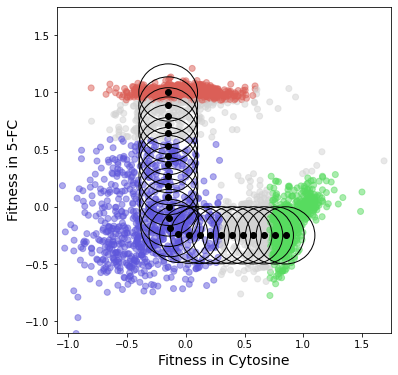

In [416]:
fig, axes = plt.subplots(figsize=(6,6))
mut_colors = {'Wt-like':colors[1], 'Nonsense-like':colors[0], 'Elbow':colors[2], 'other':'lightgrey'}


plt.scatter(data_df['CY_score'], data_df['FC_score'], c=data_df['mut_type'].map(mut_colors), alpha=0.5)

plt.plot(f_centroids, [f(x)for x in f_centroids], 'ko')
plt.xlim(-1.1, 1.75)
plt.ylim(-1.1, 1.75)

plt.xlabel('Fitness in Cytosine', fontsize=14)
plt.ylabel('Fitness in 5-FC', fontsize=14)


for tup in centroid_tuples:
    
    circle1 = plt.Circle((tup[0], tup[1]), 0.25, color='k', fill=False)

    axes.add_patch(circle1)

/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, '5-FC score')

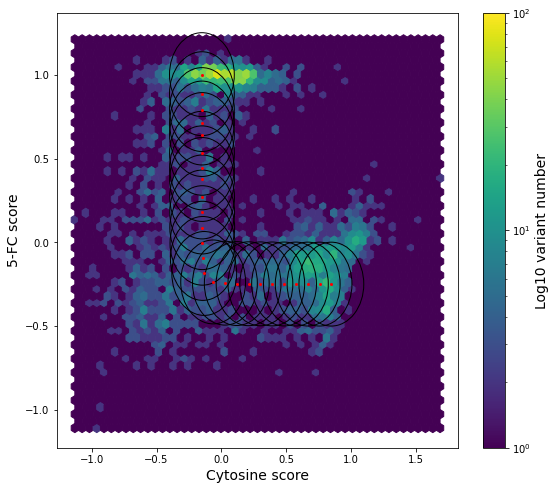

In [417]:
fig, axes = plt.subplots(figsize=(9,8))

hb = plt.hexbin(data_df['CY_score'], data_df['FC_score'], gridsize=50, bins='log', vmax=100)
plt.plot(f_centroids, [f(x)for x in f_centroids], 'ro', markersize=2)

for tup in centroid_tuples:
    
    circle1 = plt.Circle((tup[0], tup[1]), 0.25, color='k', fill=False)

    axes.add_patch(circle1)
    
cb = fig.colorbar(hb, ax=axes)
cb.set_label('Log10 variant number', fontsize=14)
cb.set_ticks([1,10,100])

plt.xlabel('Cytosine score', fontsize=14)
plt.ylabel('5-FC score', fontsize=14)

In [418]:
def check_centroid_dist(data_coord, center, r=0.25):
    
    dist_center = np.sqrt((np.abs(data_coord[0]-center[0])**2)+(np.abs(data_coord[1]-center[1])**2))
    
    if dist_center <=r:
        return 1
    else:
        return 0
    


In [419]:
 data_df['centroid_1'] = data_df.apply(lambda x: check_centroid_dist(tuple((x['CY_score'], x['FC_score'])), (-0.15, 0.9999999999999989)), axis=1)

(-1.1, 1.75)

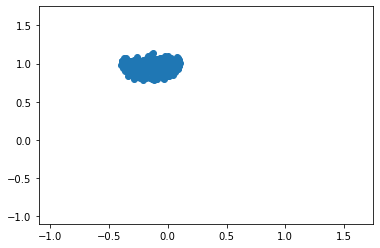

In [420]:
plt.scatter(data_df[data_df['centroid_1']==1]['CY_score'], data_df[data_df['centroid_1']==1]['FC_score'])
plt.xlim(-1.1, 1.75)
plt.ylim(-1.1, 1.75)

In [421]:
col_name_list = []

for tup in range(1,26):
    
    col_name = 'centroid_'+str(tup-1)
    
    col_name_list.append(col_name)
    
    vals = centroid_tuples[tup-1]
    
    missense[col_name] = missense.apply(lambda x: check_centroid_dist(tuple((x['CY_score'], x['FC_score'])), (vals[0], vals[1])), axis=1)
    
    
col_name_list

/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


['centroid_0',
 'centroid_1',
 'centroid_2',
 'centroid_3',
 'centroid_4',
 'centroid_5',
 'centroid_6',
 'centroid_7',
 'centroid_8',
 'centroid_9',
 'centroid_10',
 'centroid_11',
 'centroid_12',
 'centroid_13',
 'centroid_14',
 'centroid_15',
 'centroid_16',
 'centroid_17',
 'centroid_18',
 'centroid_19',
 'centroid_20',
 'centroid_21',
 'centroid_22',
 'centroid_23',
 'centroid_24']

In [422]:
cluster_size_list = []

index_list = []

coverage_list = []

for x in range(0,25):
    
    index_in_cluster = missense[col_name_list[x]] == 1
    
    sub_df = missense[index_in_cluster]
    
    indexes = list(sub_df.index)
    
    cluster_size_list.append(len(indexes))

    index_list+=indexes
    
    coverage_list.append(len(set(index_list))/2983)
    

In [423]:
len(missense)

2983

(0.0, 750.0)

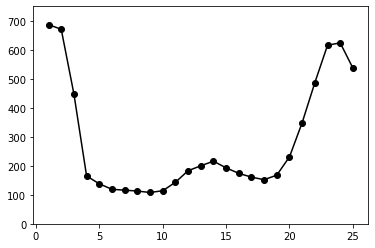

In [424]:
plt.plot(range(1,26), cluster_size_list, 'ko-')
plt.ylim(0,750)

0.6647670130740865

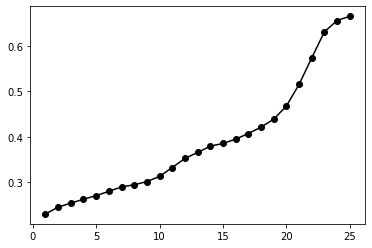

In [425]:
plt.plot(range(1,26), coverage_list, 'ko-')
max(coverage_list)

In [426]:
missense.columns

Index(['codon', 'wt', 'measured', 'CY_1', 'CY_1_R1', 'CY_1_MAD_1', 'CY_1_R2',
       'CY_1_MAD_2', 'FC_1', 'FC_1_R1', 'FC_1_MAD_1', 'FC_1_R2', 'FC_1_MAD_2',
       'CY_2', 'CY_2_R1', 'CY_2_MAD_1', 'CY_2_R2', 'CY_2_MAD_2', 'FC_2',
       'FC_2_R1', 'FC_2_MAD_1', 'FC_2_R2', 'FC_2_MAD_2', 'FC_CY_2',
       'FC_CY_2_R1', 'FC_CY_2_MAD_1', 'FC_CY_2_R2', 'FC_CY_2_MAD_2', 'CY_3',
       'CY_3_R1', 'CY_3_MAD_1', 'CY_3_R2', 'CY_3_MAD_2', 'FC_3', 'FC_3_R1',
       'FC_3_MAD_1', 'FC_3_R2', 'FC_3_MAD_2', 'CY_1_to_2', 'CY_3_to_2',
       'FC_1_to_2', 'FC_3_to_2', 'CY_123', 'FC_123', 'CY_score', 'FC_score',
       'FC_CY_score', 'interface', 'ddG_struc_HET', 'ddG_struc_HM',
       'ddG_inter_HET', 'ddG_inter_HM', 'r4s_score', 'RSA', 'temp',
       'ortholog_aa_freq', 'dist_act_site', 'mut_type', 'centroid_0',
       'centroid_1', 'centroid_2', 'centroid_3', 'centroid_4', 'centroid_5',
       'centroid_6', 'centroid_7', 'centroid_8', 'centroid_9', 'centroid_10',
       'centroid_11', 'centroid_12', 'c

In [427]:
boxplot_data_list_ddg = []

for x in range(0,len(col_name_list)):
    
    select = missense[col_name_list[x]]==1
    
    data = missense[select]['ddG_struc_HET'].dropna()
    
    boxplot_data_list_ddg.append(data)
    
#boxplot_data_list

[4.66855, 4.52444, 4.331435, 3.46457, 3.3112399999999997, 2.66698, 2.621725, 2.35116, 2.2737749999999997, 2.31113, 2.17637, 1.95378, 1.8387, 1.8387, 1.75831, 1.557455, 1.45281, 1.3682400000000001, 1.25726, 1.092395, 0.83744, 0.68442, 0.60198, 0.51264, 0.5055050000000001]


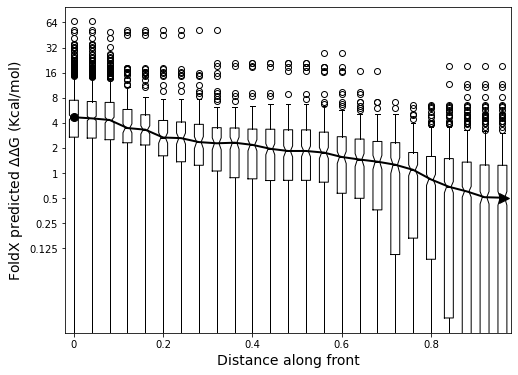

In [428]:
plt.figure(figsize=(8,6))

plt.boxplot(boxplot_data_list_ddg, notch=True, medianprops=dict(color='k'))
plt.xlabel('centroid')


plt.xticks([1,6,11,16,21,26], [str(x) for x in [0,0.2,0.4,0.6,0.8,1.0]])

y_list = []

for x in range(0, len(boxplot_data_list_ddg)):
    
    y_list.append(np.median(boxplot_data_list_ddg[x]))
    
plt.plot(range(1,26), y_list, 'k-', linewidth=2)
plt.plot(1,y_list[0], 'ko', markersize=8)
plt.plot(25.1, y_list[::-1][0], 'k>', markersize=10)
plt.yscale('log', base=2)

plt.yticks([0.125, 0.25, 0.5,1,2,4,8,16,32,64], [str(x) for x in [0.125, 0.25,0.5,1,2,4,8,16,32,64]])

plt.xlabel('Distance along front', fontsize=14)
plt.ylabel('FoldX predicted $\Delta\Delta$G (Kcal/mol)', fontsize=14)
print(y_list)

In [429]:
y_list[::-1]

[0.5055050000000001,
 0.51264,
 0.60198,
 0.68442,
 0.83744,
 1.092395,
 1.25726,
 1.3682400000000001,
 1.45281,
 1.557455,
 1.75831,
 1.8387,
 1.8387,
 1.95378,
 2.17637,
 2.31113,
 2.2737749999999997,
 2.35116,
 2.621725,
 2.66698,
 3.3112399999999997,
 3.46457,
 4.331435,
 4.52444,
 4.66855]

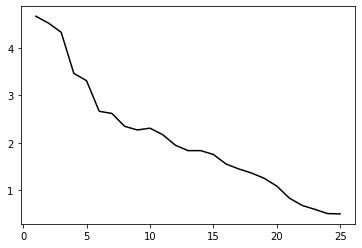

In [430]:
plt.plot(range(1,26), y_list, 'k-')


In [431]:
boxplot_data_list_r4s = []

for x in range(0,len(col_name_list)):
    
    select = missense[col_name_list[x]]==1
    
    data = missense[select]['r4s_score'].dropna()
    
    boxplot_data_list_r4s.append(data)
    
#boxplot_data_list

Text(0.5, 0, 'Distance along front')

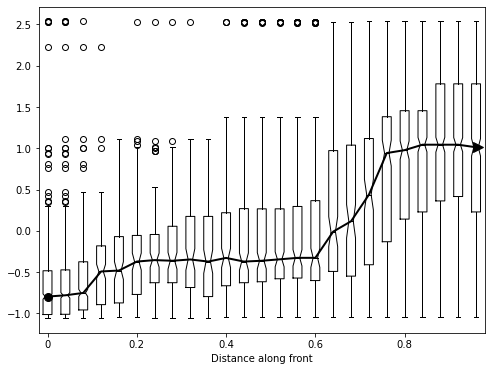

In [432]:
plt.figure(figsize=(8,6))

plt.boxplot(boxplot_data_list_r4s, notch=True, medianprops=dict(color='k'))
plt.xlabel('centroid')

plt.xticks([1,6,11,16,21,26], [str(x) for x in [0,0.2,0.4,0.6,0.8,1.0]])


y_list = []

for x in range(0, len(boxplot_data_list_r4s)):
    
    y_list.append(np.median(boxplot_data_list_r4s[x]))
    
plt.plot(range(1,26), y_list, 'k-', linewidth=2)
plt.plot(1,y_list[0], 'ko', markersize=8)
plt.plot(25.1, y_list[::-1][0], 'k>', markersize=10)


plt.xlabel('Distance along front')

In [433]:
list(missense['interface'].value_counts(ascending=True))
baseline = (588+798)/(sum(list(missense['interface'].value_counts(ascending=True))))
baseline

0.4646329198793161

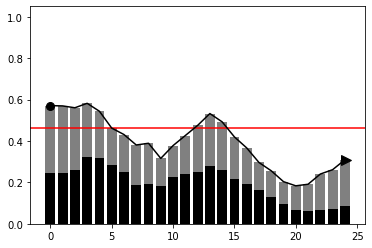

In [434]:
interface_data_list = []
near_data_list = []
not_inter_data_list = []

for x in range(0,len(col_name_list)):
    
    select = missense[col_name_list[x]]==1
    
    data = missense[select]['interface'].value_counts(ascending=True)
    
    sum_pos = data[0]+data[1]+data[0.75]
    
    interface_data_list.append(data[1]/sum_pos)
    near_data_list.append(data[0.75]/sum_pos)
    not_inter_data_list.append(data[0]/sum_pos)
    
    
    

x_pos = range(0,len(col_name_list))


plt.bar(x_pos, interface_data_list, color='black', linewidth=2)
plt.bar(x_pos, bottom=interface_data_list, height=near_data_list, color='grey')
plt.bar(x_pos, bottom=[i+j for i,j in zip(interface_data_list, near_data_list)], height=not_inter_data_list, color='white')


inter_near = [interface_data_list[x]+near_data_list[x] for x in range(0,len(col_name_list))]

plt.axhline(baseline, color='red')


plt.plot(x_pos, inter_near, 'k')
plt.plot(0,inter_near[0], 'ko', markersize=8)
plt.plot(24.1, inter_near[::-1][0], 'k>', markersize=10)
    
#boxplot_data_list

#plt.figure(figsize=(8,6))

#plt.boxplot(boxplot_data_list)
#plt.xlabel('centroid')

#plt.xticks([1,6,11,16,21,26], [str(x) for x in [0,0.2,0.4,0.6,0.8,1.0]])


#plt.xlabel('Distance along front')#

In [435]:
centroid_tuples

[(-0.15, 0.9999999999999989),
 (-0.1498999899989999, 0.8863533048458938),
 (-0.1497999799979998, 0.7916493041086745),
 (-0.1496999699969997, 0.7115162704823433),
 (-0.1495999599959996, 0.6428316308307721),
 (-0.1493999399939994, 0.5312207012938294),
 (-0.1491999199919992, 0.44441357853213925),
 (-0.148999899989999, 0.37496874843742045),
 (-0.1485998599859986, 0.27080295012292044),
 (-0.1480998099809981, 0.18100624159453654),
 (-0.14729972997299728, 0.08781318414011086),
 (-0.1458995899589959, -0.0049216651306882575),
 (-0.1428992899289929, -0.09569253941406683),
 (-0.13169816981698168, -0.18523930175804024),
 (-0.06319131913191318, -0.23576450542654376),
 (0.02771777177717774, -0.24300573195620143),
 (0.11892689268926895, -0.24536911647614543),
 (0.21013601360136017, -0.2465387002322626),
 (0.3014451445144515, -0.24723723413731966),
 (0.3926542654265427, -0.24770074461014432),
 (0.4838633863386339, -0.24803107246866296),
 (0.5751725172517251, -0.2482786459549161),
 (0.6663816381638163,

In [440]:
import matplotlib.gridspec as gridspec
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


from matplotlib.patches import Patch
from matplotlib.lines import Line2D




In [441]:
missense['centroid_0']

1       0
2       0
4       0
5       0
6       0
       ..
3291    0
3292    0
3293    0
3294    0
3295    0
Name: centroid_0, Length: 2983, dtype: int64

In [442]:
col_name_list

['centroid_0',
 'centroid_1',
 'centroid_2',
 'centroid_3',
 'centroid_4',
 'centroid_5',
 'centroid_6',
 'centroid_7',
 'centroid_8',
 'centroid_9',
 'centroid_10',
 'centroid_11',
 'centroid_12',
 'centroid_13',
 'centroid_14',
 'centroid_15',
 'centroid_16',
 'centroid_17',
 'centroid_18',
 'centroid_19',
 'centroid_20',
 'centroid_21',
 'centroid_22',
 'centroid_23',
 'centroid_24']

/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  if sys.path[0] == '':


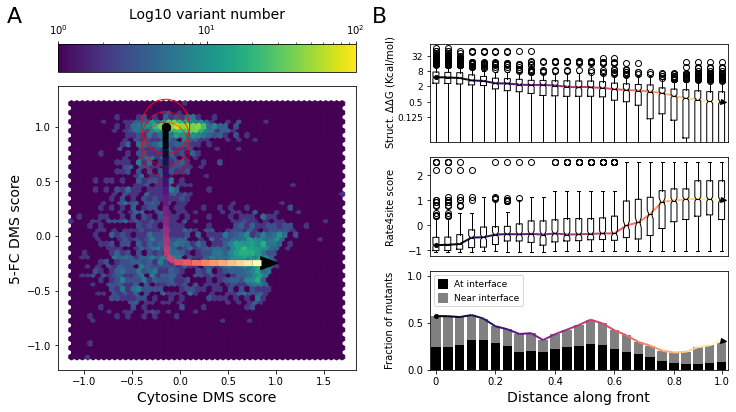

In [448]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(3, 2)

gs.update(hspace=0.15, wspace=0.25) # set the spacing between axes. 


ax1 = fig.add_subplot(gs[:, 0])




hb = plt.hexbin(missense['CY_score'], missense['FC_score'], gridsize=50, bins='log', vmax=100)

    
plt.xlabel('Cytosine DMS score', fontsize=14)
plt.ylabel('5-FC DMS score', fontsize=14)

points = np.array([np.array(f_centroids), np.array([f(x)for x in f_centroids])]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
dist_along_len = np.array([x/2.19 for x in pos_along_len[1::]])


lc = LineCollection(segments, cmap='magma')
# Set the values used for colormapping
lc.set_array(dist_along_len)
lc.set_linewidth(6)
ax1.add_collection(lc)

for tup in range(0,4):
    
    coord = centroid_tuples[tup]
    
    circle1 = plt.Circle((coord[0], coord[1]), 0.25, color = 'red', linestyle='-', fill=False, alpha=(1-0.25*tup))

    ax2.add_patch(circle1)

plt.arrow(0.74, -0.24874987484995748, 0.1,0, width=0.04, color='k')
plt.plot(-0.15, 1, 'ko', markersize=8)


for tup in range(0,4):
    
    coord = centroid_tuples[tup]
    
    circle1 = plt.Circle((coord[0], coord[1]), 0.25, color = 'r', linestyle='-', fill=False, alpha=(1-0.25*tup))

    ax1.add_patch(circle1)

plt.arrow(0.74, -0.24874987484995748, 0.1,0, width=0.02, color='k')
plt.plot(-0.15, 1, 'ko', markersize=8)


divider = make_axes_locatable(ax1)
cax = divider.new_vertical(size="10%", pad=0.2, pack_start=False)
fig.add_axes(cax)


cb = fig.colorbar(hb, cax=cax, orientation='horizontal')
cb.set_label('Log10 variant number', fontsize=14)
cb.set_ticks([1,10,100])
cb.ax.xaxis.set_ticks_position("top")
cb.ax.xaxis.set_label_position("top")

########################################## panel 2
ax2 = fig.add_subplot(gs[0, 1])

ax2.boxplot(boxplot_data_list_ddg, notch=True, medianprops=dict(color='k'))


plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

y_list = []

for x in range(0, len(boxplot_data_list_ddg)):
    
    y_list.append(np.median(boxplot_data_list_ddg[x]))
    
points = np.array([np.array(range(1,26)), np.array(y_list)]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
dist_along_len = np.array([x/2.19 for x in pos_along_len[1::]])


lc = LineCollection(segments, cmap='magma')
# Set the values used for colormapping
lc.set_array(dist_along_len)
lc.set_linewidth(2)
ax2.add_collection(lc)  
    
    
    
#plt.plot(range(1,26), y_list, 'k-', linewidth=2)
plt.plot(1,y_list[0], 'ko', markersize=4)
plt.plot(25.1, y_list[::-1][0], 'k>', markersize=5)
plt.yscale('log', base=2)

plt.yticks([0.125, 0.5,2,8,32], [str(x) for x in [0.125, 0.5,2,8,32]], fontsize=9)

#plt.xlabel('Distance along front', fontsize=14)
plt.ylabel(' Struct. $\Delta\Delta$G (Kcal/mol)', fontsize=10, labelpad=0)


### panel 3
ax3 = fig.add_subplot(gs[1, 1])
plt.boxplot(boxplot_data_list_r4s, notch=True, medianprops=dict(color='k'))

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

y_list = []

for x in range(0, len(boxplot_data_list_r4s)):
    
    y_list.append(np.median(boxplot_data_list_r4s[x]))
    
points = np.array([np.array(range(1,26)), np.array(y_list)]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
dist_along_len = np.array([x/2.19 for x in pos_along_len[1::]])


lc = LineCollection(segments, cmap='magma')
# Set the values used for colormapping
lc.set_array(dist_along_len)
lc.set_linewidth(2)
ax3.add_collection(lc)      

    
#plt.plot(range(1,26), y_list, 'k-', linewidth=2)
plt.plot(1,y_list[0], 'ko', markersize=4)
plt.plot(25.1, y_list[::-1][0], 'k>', markersize=5)

plt.ylabel('Rate4site score', labelpad=12, fontsize=10)

###################################### panel 4
ax4 = fig.add_subplot(gs[2, 1])

interface_data_list = []
near_data_list = []
not_inter_data_list = []

for x in range(0,len(col_name_list)):
    
    select = missense[col_name_list[x]]==1
    
    data = missense[select]['interface'].value_counts(ascending=True)
    
    sum_pos = data[0]+data[1]+data[0.75]
    
    interface_data_list.append(data[1]/sum_pos)
    near_data_list.append(data[0.75]/sum_pos)
    not_inter_data_list.append(data[0]/sum_pos)
    
    
    


x_pos = range(1,len(col_name_list)+1)


plt.bar(x_pos, interface_data_list, color='black', linewidth=2)
plt.bar(x_pos, bottom=interface_data_list, height=near_data_list, color='grey')
plt.bar(x_pos, bottom=[i+j for i,j in zip(interface_data_list, near_data_list)], height=not_inter_data_list, color='white')


plt.xlim(0.5, 25.5)

inter_near = [interface_data_list[x]+near_data_list[x] for x in range(0,len(col_name_list))]


points = np.array([np.array(range(1,26)), np.array(inter_near)]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
dist_along_len = np.array([x/2.19 for x in pos_along_len[1::]])


lc = LineCollection(segments, cmap='magma')
# Set the values used for colormapping
lc.set_array(dist_along_len)
lc.set_linewidth(2)
ax4.add_collection(lc) 

plt.plot(1,inter_near[0], 'ko', markersize=4)
plt.plot(25.1, inter_near[::-1][0], 'k>', markersize=5)
#plt.axhline(baseline, color='red')

plt.ylabel('Fraction of mutants', labelpad=12, fontsize=10)
plt.xticks([1,6,11,16,21,25], [str(x) for x in [0,0.2,0.4,0.6,0.8,1.0]])
plt.xlabel('Distance along front', fontsize=14)


legend_elements = [Patch(facecolor='black', edgecolor='black',
                         label='At interface'),
                  Patch(facecolor='grey', edgecolor='grey',
                         label='Near interface')]

plt.legend(handles=legend_elements, loc='upper left', fontsize=9, handlelength=1, handleheight=1.125)


ax1.text(-1.8,1.95, 'A', fontsize=22)

ax1.text(2,1.95, 'B', fontsize=22)


plt.savefig('./figures/dms_front.svg', format='svg', dpi=300)

In [457]:
mut_colors = {'Wt-like':colors[1], 'Nonsense-like':colors[0], 'Elbow':colors[2], 'other':'k'}


In [458]:
data_df['mut_type'].unique()


array(['Elbow', 'Wt-like', 'other', 'Nonsense-like'], dtype=object)

## Figure 4v2

In [472]:
mass_mol_FC = 129.09
mass_mol_CY = 111.01

def convert_to_uM(ug, mass_mol):
    
    mass = ug
    
    vol = 0.001
    
    uM = (((mass*10**-6)/(vol*mass_mol))*10**6)
    
    return uM


def hill_equation(x, E, n):
    
    return 1/(1+((E/x)**n))

In [473]:
mut_colors

{'Silent-like': (0.33999999999999997, 0.86, 0.3712),
 'Nonsense-like': (0.86, 0.3712, 0.33999999999999997),
 'Front minima': (0.3712, 0.33999999999999997, 0.86),
 'Other': 'lightgrey'}

In [464]:
validations_result_hap.columns

Index(['codon', 'wt', 'measured', 'mtx1', 'mtx2', 'dmso1', 'dmso2',
       'mtx_average', 'dmso_average', 'hap_fc_1', 'hap_fc_2', 'hap_cy_1',
       'hap_cy_2', 'hap_fc_average', 'hap_cy_average', '2nd_batch_FC',
       '2nd_batch_CY', 'adjusted_2nd_batch_FC', 'adjusted_2nd_batch_CY',
       'combined_hap_fc', 'combined_hap_cy', 'escape_outlier', 'CY_score',
       'FC_score', 'FC_CY_score', 'ddG_struc_HET', 'ddG_inter_HET',
       'ddG_inter_HM', 'Mutation cluster', 'log_hap_cy', 'log_hap_fc',
       'ddg_product'],
      dtype='object')

In [468]:
validations_result_hap.rename(columns={"escape_outlier":"Escape outlier"}, inplace=True)

In [477]:
stats.linregress(validations_result_hap['log_hap_fc'].dropna(), validations_result_hap['log_hap_cy'].dropna())

LinregressResult(slope=-3.7282554404658197, intercept=-14.581044196792774, rvalue=-0.8987001806446225, pvalue=3.580326738457651e-32, stderr=0.19733944376666165)

In [ ]:
validations_result_hap['combined_hap_cy']

/home/phil/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/phil/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: Runtime

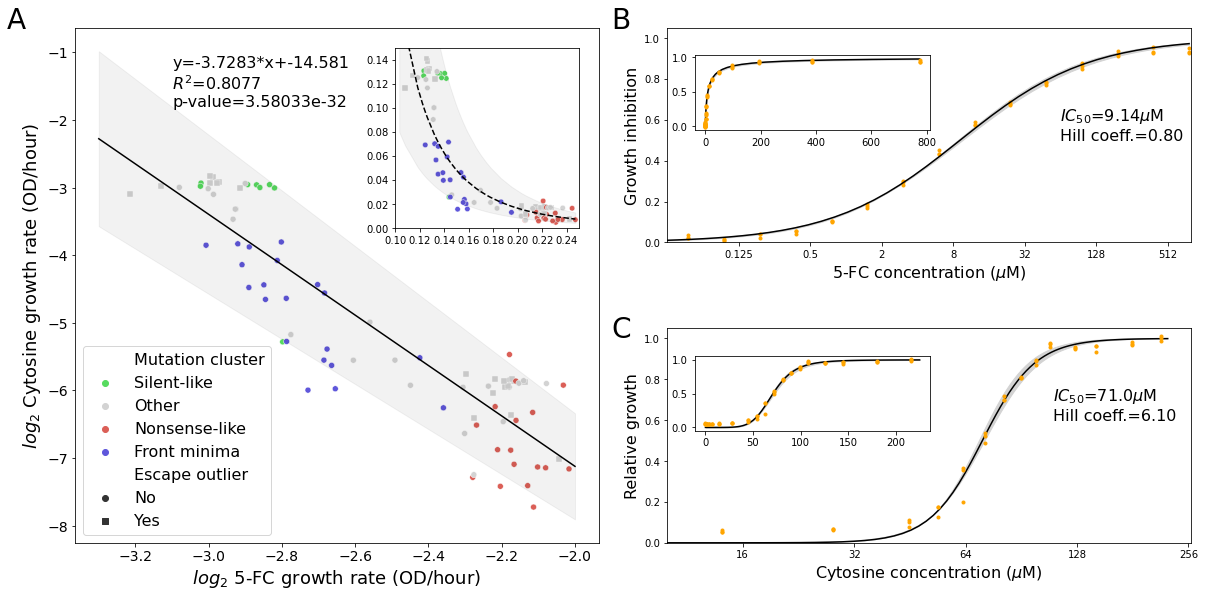

In [485]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(20,15))

gs = gridspec.GridSpec(3, 4)

gs.update(hspace=0.4, wspace=0.3 ) # set the spacing between axes. 


############# panel A: validations log-log plot
ax1 = fig.add_subplot(gs[0:2, 0:2])

colors=sns.color_palette("hls", 3)
mut_colors = {'Silent-like':colors[1], 'Nonsense-like':colors[0], 'Front minima':colors[2], 'Other':'lightgrey'}

slope, inter, rval, pval, std_slope = stats.linregress(validations_result_hap['log_hap_fc'].dropna(), 
                                                 validations_result_hap['log_hap_cy'].dropna())


xrange = np.linspace(-3.3, -2.0, 100)

sns.scatterplot(data=validations_result_hap, y='log_hap_cy', x='log_hap_fc', hue='Mutation cluster',
            palette = mut_colors, ax=ax1, style='Escape outlier', markers=['o', 's'])

ax1.plot(xrange, ((xrange*slope)+inter),  'k-')

ax1.fill_between(xrange, ((xrange*(slope+(ts*std_slope)))+inter), ((xrange*(slope-(ts*std_slope)))+inter), color='k', alpha=0.05)
#plt.plot(xrange, ((xrange*(slope+(ts*std_slope)))+inter) ,'k-', alpha=0.15)
#plt.plot(xrange, ((xrange*(slope-(ts*std_slope)))+inter), 'k-', alpha=0.15)

ax1.set_xlabel('$log_2$ 5-FC growth rate (OD/hour)', fontsize=18)
ax1.set_ylabel('$log_2$ Cytosine growth rate (OD/hour)', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


ax1.text(-3.1, -1.8, 'y='+str(np.round(slope,4)) + '*x+'+str(np.round(inter,4))+'\n' +r'$R^{2}$='+str(np.round(rval**2, 4))+'\np-value='+str(np.format_float_scientific(pval,5)), fontsize=16)

ax1.legend(fontsize=16, loc='lower left')

inset_ax = inset_axes(ax1,
                    width="35%", # width = 30% of parent_bbox
                    height="35%", # height : 1 inch
                    loc=1,
                    borderpad=2)

x_vals = validations_result_hap['hap_fc_average'].dropna()

sns.scatterplot(data=validations_result_hap, x='combined_hap_fc', y='combined_hap_cy', hue='Mutation cluster',
            palette = mut_colors, s=30, ax=inset_ax, legend=False, style='Escape outlier', markers=['o', 's'])

inset_ax.plot(sorted(list(x_vals)), front(sorted(list(x_vals)), *np.array([(2**inter), (-1*slope)])), 'k--')

lower_y = front(sorted(list(x_vals)), *np.array([2**(inter), ((-1*slope)-(ts*std_slope))]))
upper_y = front(sorted(list(x_vals)), *np.array([2**(inter), ((-1*slope)+(ts*std_slope))]))
inset_ax.fill_between(sorted(list(x_vals)), lower_y, upper_y, color='k', alpha=0.05)

inset_ax.set_ylim(0,0.15)
inset_ax.set_xlim(0.10,0.25)
inset_ax.set_xlabel('', fontsize=13)
inset_ax.set_ylabel('', fontsize=13)

inset_ax.set_xticks([0.10,0.12,0.14,0.16,0.18,0.20,0.22,0.24])
#inset_ax.axvline(0.2, ymin=0, ymax=0.5, linestyle='--', color='k')
#inset_ax.axhline(0.09, xmin=0, xmax=0.2, linestyle='--', color='k')


############ panel B: Dose response curve for 5-FC
ax2 = fig.add_subplot(gs[0:1, 2:4])

ax2_source = pd.read_csv('./hill_curve_5fc.csv', sep=',',index_col=0)

x_vals = np.logspace(np.log2(0.002955),np.log2(775), num=50, base=2)

popt, pcov = sci.optimize.curve_fit(hill_equation, ax2_source['molar'], ax2_source['rel_FC_growth'])
dof = np.size(ax2_source['molar']) - 1 # degrees of freedom:
# calculate student-t value
a = 0.05 #(1-0.95, 95% CI)
tval = stats.t.ppf(1.0-a/2, dof)


ci_fc_IC = tval*np.sqrt(pcov[0][0])
ci_fc_n = tval*np.sqrt(pcov[1][1])


ci_fc_IC, ci_fc_n


ax2.plot(ax2_source['molar'], ax2_source['rel_FC_growth'], color='orange', marker = 'o', linestyle='none', ms=3)

ax2.plot(x_vals, [hill_equation(x,9.1395844 , 0.80356349) for x in x_vals], 'k')

ax2.fill_between(x_vals, [hill_equation(x, 9.1395844-ci_fc_IC, 0.80356349+ci_fc_n) for x in x_vals],
                 [hill_equation(x, 9.1395844+ci_fc_IC, 0.80356349-ci_fc_n) for x in x_vals], color='lightgrey')
plt.xscale('log', base=2)

plt.xlim((2**-5), (2**9.65))

plt.xticks(ticks=[2**-3, 2**-1, 2**1,2**3,2**5,2**7,2**9], labels=[str(x) for x in [2**-3, 2**-1, 2**1,2**3,2**5,2**7,2**9]])
plt.xlabel(r'5-FC concentration ($\mu$M)', fontsize=16)
plt.ylabel('Growth inhibition', fontsize=16)


ax2.text(64, 0.5, '$IC_{50}$=9.14$\mu$M\nHill coeff.=0.80', fontsize=16)
plt.ylim(0,1.05)

################### inset panel C
inset_ax_fc = inset_axes(ax2,
                    width="45%", # width = 30% of parent_bbox
                    height="35%", # height : 1 inch
                    loc=2,
                    borderpad=2.75)
inset_ax_fc.plot(ax2_source['molar'], ax2_source['rel_FC_growth'], color='orange', marker='o', ms=3, linestyle='None', zorder=9)
inset_ax_fc.plot(x_vals, [hill_equation(x,9.1395844 , 0.80356349) for x in x_vals], 'k')
inset_ax_fc.fill_between(x_vals, [hill_equation(x, 9.1395844-ci_fc_IC, 0.80356349+ci_fc_n) for x in x_vals],
                 [hill_equation(x, 9.1395844+ci_fc_IC, 0.80356349-ci_fc_n) for x in x_vals], color='lightgrey')


########### panel C: Dose response curve for cytosine
ax3 = fig.add_subplot(gs[1:2, 2:4])

ax3_source = pd.read_csv('./hill_curve_cytosine.csv', sep=',',index_col=0)


popt, pcov = sci.optimize.curve_fit(hill_equation, ax3_source['molar'], ax3_source['rel_CY_growth'])
dof = np.size(ax3_source['molar']) - 1 # degrees of freedom:
# calculate student-t value
a = 0.05 #(1-0.95, 95% CI)
tval = stats.t.ppf(1.0-a/2, dof)
ci_cy = tval*np.sqrt(pcov)[0]

ax3.plot(ax3_source['molar'], ax3_source['rel_CY_growth'], color='orange', marker='o', ms=3, linestyle='None', zorder=9)
ax3.plot(np.linspace(0.1,225,100), [hill_equation(x,70.96510207, 6.10323637) for x in np.linspace(0,225,100)], 'k')
ax3.fill_between(np.linspace(0.1,225,100), [hill_equation(x,70.96510207+ci_cy[0], 6.10323637-ci_cy[1]) for x in np.linspace(0,225,100)],
                 [hill_equation(x,70.96510207-ci_cy[0], 6.10323637+ci_cy[1]) for x in np.linspace(0,225,100)], color='lightgrey')
ax3.text(110, 0.6, '$IC_{50}$=71.0$\mu$M\nHill coeff.=6.10', fontsize=16)



plt.xlabel(r'Cytosine concentration ($\mu$M)', fontsize=16)
plt.ylabel('Relative growth', fontsize=16)
plt.xlim(10,260)

plt.xscale('log', base=2)
plt.xticks(ticks=[16,32,64,128,256], labels=[str(x) for x in [16,32,64,128,256]])
plt.ylim(0,1.05)

################### inset panel C
inset_ax_cy = inset_axes(ax3,
                    width="45%", # width = 30% of parent_bbox
                    height="35%", # height : 1 inch
                    loc=2,
                    borderpad=2.75)
inset_ax_cy.plot(ax3_source['molar'], ax3_source['rel_CY_growth'], color='orange', marker='o', ms=3, linestyle='None', zorder=9)
inset_ax_cy.plot(np.linspace(0.1,225,100), [hill_equation(x,70.96510207, 6.10323637) for x in np.linspace(0,225,100)], 'k')
inset_ax_cy.fill_between(np.linspace(0.1,225,100), [hill_equation(x,70.96510207+ci_cy[0], 6.10323637-ci_cy[1]) for x in np.linspace(0,225,100)],
                 [hill_equation(x,70.96510207-ci_cy[0], 6.10323637+ci_cy[1]) for x in np.linspace(0,225,100)], color='lightgrey')


            



ax1.text(-3.55,-0.65, 'A', fontsize=28)
ax1.text(-1.9,-0.65, 'B', fontsize=28)
ax1.text(-1.9,-5.22, 'C', fontsize=28)




plt.savefig('./figures/figure4v3.pdf', format='pdf', dpi=300)

In [486]:
ddg_low = [19,8]
ddg_high = [6,18]

stats.fisher_exact([ddg_low, ddg_high])

(7.125, 0.0019070584920103594)

In [462]:
validations_result_hap.columns

Index(['codon', 'wt', 'measured', 'mtx1', 'mtx2', 'dmso1', 'dmso2',
       'mtx_average', 'dmso_average', 'hap_fc_1', 'hap_fc_2', 'hap_cy_1',
       'hap_cy_2', 'hap_sc_1', 'hap_sc_2', 'hap_sc_3', 'hap_sc_4',
       'hap_fc_average', 'hap_cy_average', 'hap_sc_average', 'CY_score',
       'FC_score', 'FC_CY_score', 'ddG_struc_HET', 'ddG_inter_HET',
       'ddG_inter_HM', 'Mutation cluster', 'log_hap_cy', 'log_hap_fc',
       'ddg_product'],
      dtype='object')

In [463]:
convert_to_uM(12.5, mass_mol_CY)

112.60246824610394

In [464]:
(2**-3), (2**9.65)

(0.125, 803.4141162462729)

In [489]:
fc_km = [0.083,0.11,0.16,0.16,0.51]
fc_kcat = [17,17,18.8,21]

cy_km = [1,1.1,1.1,1.17,1.25,1.57,1.78,2.5]
cy_kcat = [91,170]
np.median(fc_kcat), np.median(fc_km), np.median(fc_kcat)/np.median(fc_km)

(17.9, 0.16, 111.87499999999999)

In [490]:
np.median(cy_kcat), np.median(cy_km), np.median(cy_kcat)/np.median(cy_km)

(130.5, 1.21, 107.85123966942149)

124.375 86.86363636363636
111.87499999999999 107.85123966942149


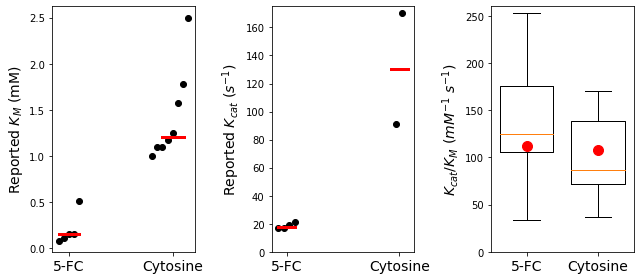

In [491]:
plt.figure(figsize=(9,4))

plt.subplot(131)

plt.plot([0.9,0.95,1,1.05,1.1], fc_km, 'ko')

plt.plot([1.80, 1.85,1.9,1.95,2,2.05,2.1, 2.15], cy_km, 'ko')

plt.plot([0.9,1.1], [np.median(fc_km),np.median(fc_km)], 'r-', lw=3)
plt.plot([1.9,2.11], [np.median(cy_km),np.median(cy_km)], 'r-', lw=3)

plt.ylabel('Reported $K_{M}$ (mM)', fontsize=14)
plt.xticks([1,2], ['5-FC', 'Cytosine'], fontsize=14)



#############################
plt.subplot(132)
plt.plot([0.925,0.975,1.025,1.075], fc_kcat, 'ko')
plt.plot([0.925,1.075], [np.median(fc_kcat),np.median(fc_kcat)], 'r-', lw=3)

plt.plot([1.975,2.025], cy_kcat, 'ko')
plt.plot([1.925,2.075], [np.median(cy_kcat),np.median(cy_kcat)], 'r-', lw=3)

plt.xticks([1,2], ['5-FC', 'Cytosine'], fontsize=14)
plt.ylabel('Reported $K_{cat}$ ($s^{-1}$)', fontsize=14)

plt.ylim(0,175)

###########################

plt.subplot(133)

data = [[x/y for x in fc_kcat for y in fc_km], [x/y for x in cy_kcat for y in cy_km]]

print(np.median([x/y for x in fc_kcat for y in fc_km]), np.median([x/y for x in cy_kcat for y in cy_km]))
print(np.median(fc_kcat)/np.median(fc_km), np.median(cy_kcat)/np.median(cy_km))

plt.plot([1], [np.median(fc_kcat)/np.median(fc_km)], 'or', ms=10)
plt.plot([2], [np.median(cy_kcat)/np.median(cy_km)], 'or', ms=10)


plt.boxplot(data, widths=[0.75,0.75])
plt.ylim(0,260)

plt.ylabel('$K_{cat}$/$K_{M}$ ($mM^{-1}$ $s^{-1}$)', fontsize=14)

plt.xticks([1,2], ['5-FC', 'Cytosine'], fontsize=14)

plt.tight_layout()

plt.savefig('./figures/km_kcat_kcat_km.svg', format='svg', dpi=300)

In [492]:
[x/y for x in fc_kcat for y in fc_km]

[204.81927710843374,
 154.54545454545453,
 106.25,
 106.25,
 33.333333333333336,
 204.81927710843374,
 154.54545454545453,
 106.25,
 106.25,
 33.333333333333336,
 226.50602409638554,
 170.9090909090909,
 117.5,
 117.5,
 36.86274509803922,
 253.01204819277106,
 190.9090909090909,
 131.25,
 131.25,
 41.17647058823529]

In [493]:
missense_at = missense[missense['interface']==1]
missense_near = missense[missense['interface']==0.75]
missense_far = missense[missense['interface']==0]

In [494]:
print(len(missense_at['ddG_struc_HET'].dropna()), len(missense_at['ddG_inter_HET'].dropna()))
print(len(missense_near['ddG_struc_HET'].dropna()), len(missense_near['ddG_inter_HET'].dropna()))
print(len(missense_far['ddG_struc_HET'].dropna()), len(missense_far['ddG_inter_HET'].dropna()))

532 532
722 722
1710 1710


In [495]:
print(stats.spearmanr(missense_at['ddG_struc_HET'], missense_at['ddG_inter_HET'], nan_policy='omit'))
print(stats.spearmanr(missense_near['ddG_struc_HET'], missense_near['ddG_inter_HET'], nan_policy='omit'))
print(stats.spearmanr(missense_far['ddG_struc_HET'], missense_far['ddG_inter_HET'], nan_policy='omit'))

SpearmanrResult(correlation=0.635238152222295, pvalue=1.8489411975397524e-61)
SpearmanrResult(correlation=0.22661694505379026, pvalue=7.322381790759379e-10)
SpearmanrResult(correlation=0.0487013255698797, pvalue=0.04404875520330921)


In [496]:
colors = sns.color_palette('Greys_r', 4) + ['red']
colors[0]

cy_conc = [90,113,225,450,901]

fc_conc = [24,48,97,194,387]

f_red = [1,2,4,8, 2048]



(-0.05, 1.05)

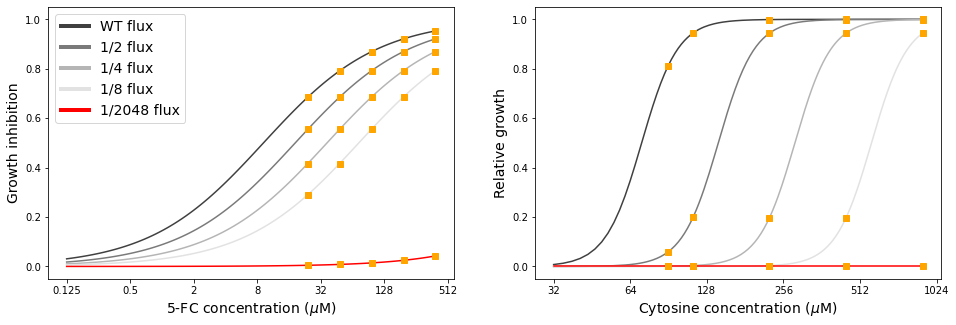

In [497]:
plt.figure(figsize=(16,5))
plt.subplot(121)

x_vals = np.logspace(np.log2(0.125),np.log2(390), num=100, base=2)


for dim in range(0,5):
    
    plt.plot(x_vals, [hill_equation(x/f_red[dim], 9.1395844 , 0.80356349) for x in x_vals], color=colors[dim], alpha=1)
    plt.plot(fc_conc, [ hill_equation(x/f_red[dim], 9.1395844 , 0.80356349) for x in fc_conc], color='orange', marker='s', linestyle='none')
    
plt.xscale('log', base=2)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4),
                Line2D([0], [0], color=colors[3], lw=4),
                Line2D([0], [0], color=colors[4], lw=4)]
plt.legend(custom_lines, ['WT flux', '1/2 flux', '1/4 flux', '1/8 flux', '1/2048 flux'], loc='upper left', fontsize=14)

plt.xlabel('5-FC concentration ($\mu$M)', fontsize=14)
plt.ylabel('Growth inhibition', fontsize=14)
plt.ylim(-0.05, 1.05)

plt.xticks([0.125,0.5,2,8,32,128,512], labels = [0.125,0.5,2,8,32,128,512])


plt.subplot(122)##########################################

for dim in range(0,5):
    
    plt.plot(np.linspace(32,900,300), [hill_equation(x/f_red[dim],70.96510207, 6.10323637) for x in np.linspace(32,900,300)], color=colors[dim], alpha=1)
    plt.plot(cy_conc, [ hill_equation(x/f_red[dim], 70.96510207, 6.10323637) for x in cy_conc], color='orange', marker='s', linestyle='none')
    
    
    
    
plt.xscale('log', base=2)

plt.xticks([32,64,128,256,512,1024], labels = [32,64,128,256,512,1024])

plt.xlabel('Cytosine concentration ($\mu$M)', fontsize=14)
plt.ylabel('Relative growth', fontsize=14)
plt.ylim(-0.05, 1.05)

In [498]:
source_ax4

WT       A23N       N39Y       A59P       C71A       E75R  \
50_FC     2.638010   3.048423   2.570363   2.478709   2.624624   2.777275   
25_FC     2.947522   3.581053   2.791325   2.639399   2.762145   3.076838   
12.5_FC   4.120649   3.766574   3.943887   3.883506   3.820102   4.235067   
6.25_FC   5.642913   5.249245   4.718761   5.440083   5.515493   5.580372   
3.12_FC   7.359205   6.969632   6.977672   7.210396   7.037713   7.322086   
100_CY   17.122707  17.050745  16.662639  17.163548  16.757988  17.273831   
50_CY    17.538430  17.479860  16.530524  17.215587  16.887638  17.671582   
25_CY    17.170873  16.291489  16.935915  16.995952  16.777005  17.251252   
12.5_CY  15.237123  12.151722  14.437656  14.176884  14.182344  13.700214   
10_CY    12.252154   8.909188   9.575833  10.042752  10.699847  10.436393   

              S89V       N39F       L74Q       I98L  ...       C91P  \
50_FC     3.238132   3.105485   2.533084   3.049667  ...  18.641031   
25_FC     3.613320   3.305562   2.797711   3.049044  ...  18.690011   
12.5_FC   5.185374   4.362774   4.285921   4.750305  ...  19.110649   
6.25_FC   6.367979   5.635031   5.744458   5.853823  ...  18.502647   
3.12_FC   8.370781   7.719096   7.570868   7.078805  ...  18.200381   
100_CY   17.766502  17.549108  17.289804  17.109596  ...   1.343833   
50_CY    18.427082  17.648808  17.958236  17.753285  ...   1.851213   
25_CY    18.753774  17.461115  17.419511  17.313923  ...   1.704749   
12.5_CY  15.835232  15.247506  14.180165  15.008823  ...   1.008923   
10_CY    12.181777  10.765747  10.211594  11.124109  ...   1.251467   

              G96M       G96W       A97W      N111W      G118W      L122N  \
50_FC    17.907713  18.250670  18.445793  18.209540  17.636369  18.087871   
25_FC    18.062745  18.584720  18.754702  18.322693  18.536256  18.055212   
12.5_FC  18.155736  18.424264  18.511418  18.731317  18.270959  18.259275   
6.25_FC  18.026661  13.077935  18.233227  18.169906  18.081066  17.676667   
3.12_FC  17.583598  17.530496  17.972292  17.644226  17.930399  17.424555   
100_CY    0.615383   1.634907   1.273097   1.289243   1.331257   1.348856   
50_CY     1.122749   1.879298   1.765508   1.788008   1.712235   2.132528   
25_CY     1.167192   1.810854   1.647329   1.882018   1.770643   1.875943   
12.5_CY   0.665903   1.349588   0.872695   1.280141   1.040010   1.072926   
10_CY     0.958467   1.340156   2.561636   2.088343   1.715618   1.219421   

             L122H      I140E      M141K  
50_FC    18.076866  17.578365  17.882391  
25_FC    18.313299  17.677884  17.821717  
12.5_FC  17.999212  17.917436  17.813079  
6.25_FC  17.919942  17.942926  17.721165  
3.12_FC  17.287265  17.699299  17.047176  
100_CY    0.742043   1.846515   1.089167  
50_CY     1.549198   2.109347   1.591525  
25_CY     1.549168   1.769729   1.404524  
12.5_CY   0.800592   1.527438   0.814778  
10_CY     1.012288   1.906243   0.911364  

[10 rows x 73 columns]

In [499]:
validations_result_hap

codon wt measured     mtx1     mtx2    dmso1    dmso2  mtx_average  \
136       8  S        F      NaN      NaN      NaN      NaN          NaN   
168      10  W        *      NaN      NaN      NaN      NaN          NaN   
227      12  Q        K      NaN      NaN      NaN      NaN          NaN   
261      14  G        W  0.01380  0.01360  0.21628  0.21208       0.0137   
263      14  G        Y  0.01388  0.01552  0.20184  0.20676       0.0147   
...     ... ..      ...      ...      ...      ...      ...          ...   
3233    155  D        E      NaN      NaN      NaN      NaN          NaN   
3249    156  I        Q      NaN      NaN      NaN      NaN          NaN   
3250    156  I        H      NaN      NaN      NaN      NaN          NaN   
3274    157  G        D      NaN      NaN      NaN      NaN          NaN   
3275    157  G        E      NaN      NaN      NaN      NaN          NaN   

      dmso_average  hap_fc_1  ...  CY_score  FC_score  FC_CY_score  \
136            NaN       NaN  ...  0.692880 -0.187155          NaN   
168            NaN       NaN  ...  0.934355  0.960428          NaN   
227            NaN       NaN  ...  1.158871  0.481955          NaN   
261        0.21418   0.20784  ...  0.193038  0.949462          NaN   
263        0.20430   0.16984  ... -0.095338  0.486492          NaN   
...            ...       ...  ...       ...       ...          ...   
3233           NaN       NaN  ...  0.628298  0.793363          NaN   
3249           NaN   0.14988  ... -1.025331 -0.218349          NaN   
3250           NaN   0.16264  ... -0.918599 -0.788823          NaN   
3274           NaN   0.21184  ...  0.405328  0.789267          NaN   
3275           NaN   0.18588  ...       NaN       NaN          NaN   

      ddG_struc_HET  ddG_inter_HET  ddG_inter_HM  Mutation cluster  \
136        -2.33217        0.00120       0.00120       Silent-like   
168             NaN            NaN           NaN             Other   
227         0.38653        0.00000       0.00000             Other   
261        61.33926        0.00000       0.00000     Nonsense-like   
263        51.91922        0.00000       0.00000             Other   
...             ...            ...           ...               ...   
3233        3.98187       -0.01388      -0.01388             Other   
3249        1.89760        0.24268       0.24268      Front minima   
3250        3.51328        0.18452       0.18452      Front minima   
3274       17.12332       11.10460      11.10460             Other   
3275       18.43000       12.46210      12.46210             Other   

      log_hap_cy  log_hap_fc  ddg_product  
136          NaN         NaN      2.33217  
168    -5.958005   -2.190925          NaN  
227    -2.845782   -2.986849      0.38653  
261    -6.514243   -2.268817     61.33926  
263    -4.991255   -2.559792     51.91922  
...          ...         ...          ...  
3233   -5.760708   -2.298331      3.98187  
3249   -5.976645   -2.654354      1.89760  
3250   -5.553003   -2.685385      3.51328  
3274   -6.412424   -2.275926     17.12332  
3275   -5.937819   -2.236303     18.43000  

[95 rows x 32 columns]

In [527]:
mut_reclass_dict = {}

for index in list(validations_result_hap.index):
    
    fc_growth_rate = validations_result_hap.loc[index]['combined_hap_fc']
    cy_growth_rate = validations_result_hap.loc[index]['combined_hap_cy']
    
    if fc_growth_rate >= 0.20:
        mut_reclass_dict[index] = 'Nonsense-like'
        
    elif cy_growth_rate >= 0.09:
        mut_reclass_dict[index] = 'Silent-like'
        
    elif np.isnan(cy_growth_rate)==False and np.isnan(fc_growth_rate)==False:
        mut_reclass_dict[index] = 'Front minima'
        
    else:
        mut_reclass_dict[index] = np.NaN
        
validations_result_hap['mut_reclass'] = pd.Series(mut_reclass_dict)

In [532]:
validations_result_hap.columns

Index(['codon', 'wt', 'measured', 'mtx1', 'mtx2', 'dmso1', 'dmso2',
       'mtx_average', 'dmso_average', 'hap_fc_1', 'hap_fc_2', 'hap_cy_1',
       'hap_cy_2', 'hap_fc_average', 'hap_cy_average', '2nd_batch_FC',
       '2nd_batch_CY', 'adjusted_2nd_batch_FC', 'adjusted_2nd_batch_CY',
       'combined_hap_fc', 'combined_hap_cy', 'Escape outlier', 'CY_score',
       'FC_score', 'FC_CY_score', 'ddG_struc_HET', 'ddG_inter_HET',
       'ddG_inter_HM', 'Mutation cluster', 'log_hap_cy', 'log_hap_fc',
       'ddg_product', 'mut_reclass'],
      dtype='object')

In [533]:
validations_result_hap.to_csv('./S_table_8_v2.csv', sep=',')
validations_result_hap

codon wt measured     mtx1     mtx2    dmso1    dmso2  mtx_average  \
136       8  S        F      NaN      NaN      NaN      NaN          NaN   
168      10  W        *      NaN      NaN      NaN      NaN          NaN   
227      12  Q        K      NaN      NaN      NaN      NaN          NaN   
261      14  G        W  0.01380  0.01360  0.21628  0.21208       0.0137   
263      14  G        Y  0.01388  0.01552  0.20184  0.20676       0.0147   
...     ... ..      ...      ...      ...      ...      ...          ...   
3233    155  D        E      NaN      NaN      NaN      NaN          NaN   
3249    156  I        Q      NaN      NaN      NaN      NaN          NaN   
3250    156  I        H      NaN      NaN      NaN      NaN          NaN   
3274    157  G        D      NaN      NaN      NaN      NaN          NaN   
3275    157  G        E      NaN      NaN      NaN      NaN          NaN   

      dmso_average  hap_fc_1  ...  FC_score  FC_CY_score  ddG_struc_HET  \
136            NaN       NaN  ... -0.187155          NaN       -2.33217   
168            NaN       NaN  ...  0.960428          NaN            NaN   
227            NaN       NaN  ...  0.481955          NaN        0.38653   
261        0.21418   0.20784  ...  0.949462          NaN       61.33926   
263        0.20430   0.16984  ...  0.486492          NaN       51.91922   
...            ...       ...  ...       ...          ...            ...   
3233           NaN       NaN  ...  0.793363          NaN        3.98187   
3249           NaN   0.14988  ... -0.218349          NaN        1.89760   
3250           NaN   0.16264  ... -0.788823          NaN        3.51328   
3274           NaN   0.21184  ...  0.789267          NaN       17.12332   
3275           NaN   0.18588  ...       NaN          NaN       18.43000   

      ddG_inter_HET  ddG_inter_HM  Mutation cluster  log_hap_cy  log_hap_fc  \
136         0.00120       0.00120       Silent-like         NaN         NaN   
168             NaN           NaN             Other   -5.958005   -2.190925   
227         0.00000       0.00000             Other   -2.845782   -2.986849   
261         0.00000       0.00000     Nonsense-like   -6.514243   -2.268817   
263         0.00000       0.00000             Other   -4.991255   -2.559792   
...             ...           ...               ...         ...         ...   
3233       -0.01388      -0.01388             Other   -5.760708   -2.298331   
3249        0.24268       0.24268      Front minima   -5.976645   -2.654354   
3250        0.18452       0.18452      Front minima   -5.553003   -2.685385   
3274       11.10460      11.10460             Other   -6.412424   -2.275926   
3275       12.46210      12.46210             Other   -5.937819   -2.236303   

      ddg_product    mut_reclass  
136       2.33217            NaN  
168           NaN  Nonsense-like  
227       0.38653    Silent-like  
261      61.33926  Nonsense-like  
263      51.91922   Front minima  
...           ...            ...  
3233      3.98187  Nonsense-like  
3249      1.89760   Front minima  
3250      3.51328   Front minima  
3274     17.12332  Nonsense-like  
3275     18.43000  Nonsense-like  

[95 rows x 33 columns]

In [534]:
data_df.columns

Index(['codon', 'wt', 'measured', 'CY_1', 'CY_1_R1', 'CY_1_MAD_1', 'CY_1_R2',
       'CY_1_MAD_2', 'FC_1', 'FC_1_R1', 'FC_1_MAD_1', 'FC_1_R2', 'FC_1_MAD_2',
       'CY_2', 'CY_2_R1', 'CY_2_MAD_1', 'CY_2_R2', 'CY_2_MAD_2', 'FC_2',
       'FC_2_R1', 'FC_2_MAD_1', 'FC_2_R2', 'FC_2_MAD_2', 'FC_CY_2',
       'FC_CY_2_R1', 'FC_CY_2_MAD_1', 'FC_CY_2_R2', 'FC_CY_2_MAD_2', 'CY_3',
       'CY_3_R1', 'CY_3_MAD_1', 'CY_3_R2', 'CY_3_MAD_2', 'FC_3', 'FC_3_R1',
       'FC_3_MAD_1', 'FC_3_R2', 'FC_3_MAD_2', 'CY_1_to_2', 'CY_3_to_2',
       'FC_1_to_2', 'FC_3_to_2', 'CY_123', 'FC_123', 'CY_score', 'FC_score',
       'FC_CY_score', 'interface', 'ddG_struc_HET', 'ddG_struc_HM',
       'ddG_inter_HET', 'ddG_inter_HM', 'r4s_score', 'RSA', 'temp',
       'ortholog_aa_freq', 'dist_act_site', 'mut_type', 'centroid_1'],
      dtype='object')

In [535]:
data_df.to_csv('./S_table_7_2.csv', sep=',')

In [536]:
cy_vals = [(hill_equation((71.6/(2**x)), 71,6.10)) for x in np.linspace(0,8,100)]
#cy_vals

In [537]:
fc_vals = [(1-(hill_equation((9.14/(2**x)), 9.14,0.80))) for x in np.linspace(0,8,100)]
#fc_vals

Text(0, 0.5, 'Relative growth in cytosine')

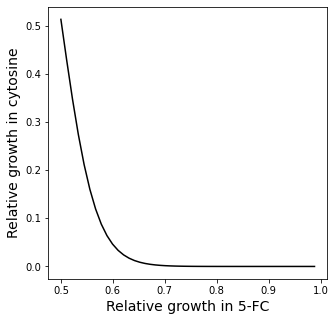

In [538]:
plt.figure(figsize=(5,5))
plt.plot(fc_vals, cy_vals, 'k')

plt.xlabel('Relative growth in 5-FC', fontsize=14)
plt.ylabel('Relative growth in cytosine', fontsize=14)

(-0.05, 1.05)

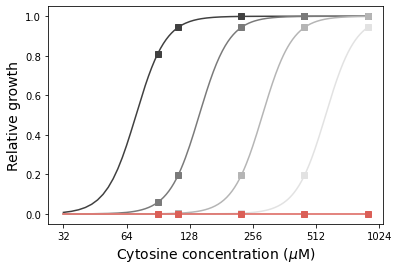

In [539]:
cy_conc = [90,113,225,450,901]

f_red = [1,2,4,8, 1024]


for dim in range(0,5):
    
    plt.plot(np.linspace(32,900,300), [hill_equation(x/f_red[dim],70.96510207, 6.10323637) for x in np.linspace(32,900,300)], color=colors[dim], alpha=1)
    plt.plot(cy_conc, [ hill_equation(x/f_red[dim], 70.96510207, 6.10323637) for x in cy_conc], color=colors[dim], marker='s', linestyle='none')
    
    
    
    
plt.xscale('log', base=2)

plt.xticks([32,64,128,256,512,1024], labels = [32,64,128,256,512,1024])

plt.xlabel('Cytosine concentration ($\mu$M)', fontsize=14)
plt.ylabel('Relative growth', fontsize=14)
plt.ylim(-0.05, 1.05)

In [540]:
[1]*5

[1, 1, 1, 1, 1]

(-0.05, 1.05)

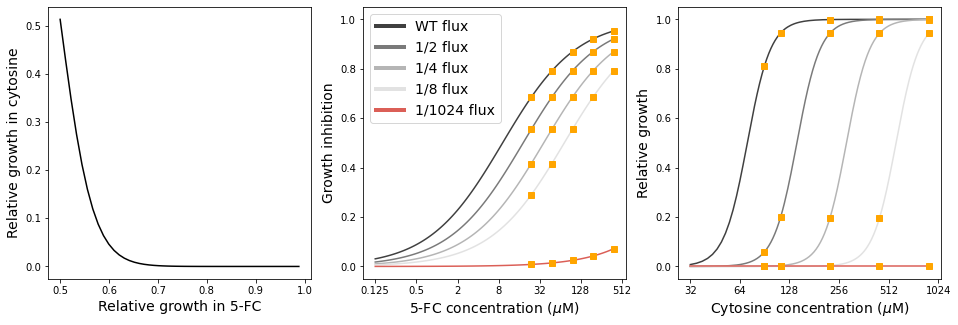

In [541]:
plt.figure(figsize=(16,5))


plt.subplot(131)

plt.plot(fc_vals, cy_vals, 'k')

plt.xlabel('Relative growth in 5-FC', fontsize=14)
plt.ylabel('Relative growth in cytosine', fontsize=14)



plt.subplot(132)########################################



x_vals = np.logspace(np.log2(0.125),np.log2(390), num=100, base=2)


for dim in range(0,5):
    
    plt.plot(x_vals, [hill_equation(x/f_red[dim], 9.1395844 , 0.80356349) for x in x_vals], color=colors[dim], alpha=1)
    plt.plot(fc_conc, [ hill_equation(x/f_red[dim], 9.1395844 , 0.80356349) for x in fc_conc], color='orange', marker='s', linestyle='none')
    
plt.xscale('log', base=2)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4),
                Line2D([0], [0], color=colors[3], lw=4),
                Line2D([0], [0], color=colors[4], lw=4)]
plt.legend(custom_lines, ['WT flux', '1/2 flux', '1/4 flux', '1/8 flux', '1/1024 flux'], loc='upper left', fontsize=14)

plt.xlabel('5-FC concentration ($\mu$M)', fontsize=14)
plt.ylabel('Growth inhibition', fontsize=14)
plt.ylim(-0.05, 1.05)

plt.xticks([0.125,0.5,2,8,32,128,512], labels = [0.125,0.5,2,8,32,128,512])


plt.subplot(133)##########################################

for dim in range(0,5):
    
    plt.plot(np.linspace(32,900,300), [hill_equation(x/f_red[dim],70.96510207, 6.10323637) for x in np.linspace(32,900,300)], color=colors[dim], alpha=1)
    plt.plot(cy_conc, [ hill_equation(x/f_red[dim], 70.96510207, 6.10323637) for x in cy_conc], color='orange', marker='s', linestyle='none')
    
    
    
    
plt.xscale('log', base=2)

plt.xticks([32,64,128,256,512,1024], labels = [32,64,128,256,512,1024])

plt.xlabel('Cytosine concentration ($\mu$M)', fontsize=14)
plt.ylabel('Relative growth', fontsize=14)
plt.ylim(-0.05, 1.05)

In [520]:
validations_result_hap['Escape outlier']

136      No
168     Yes
227     Yes
261      No
263      No
       ... 
3233    Yes
3249     No
3250     No
3274    Yes
3275     No
Name: Escape outlier, Length: 95, dtype: object

In [521]:
colors = sns.color_palette('Greys_r', 4) + [mut_colors['Nonsense-like']]
markers_dict = {'Yes':'s', 'No':'o'}

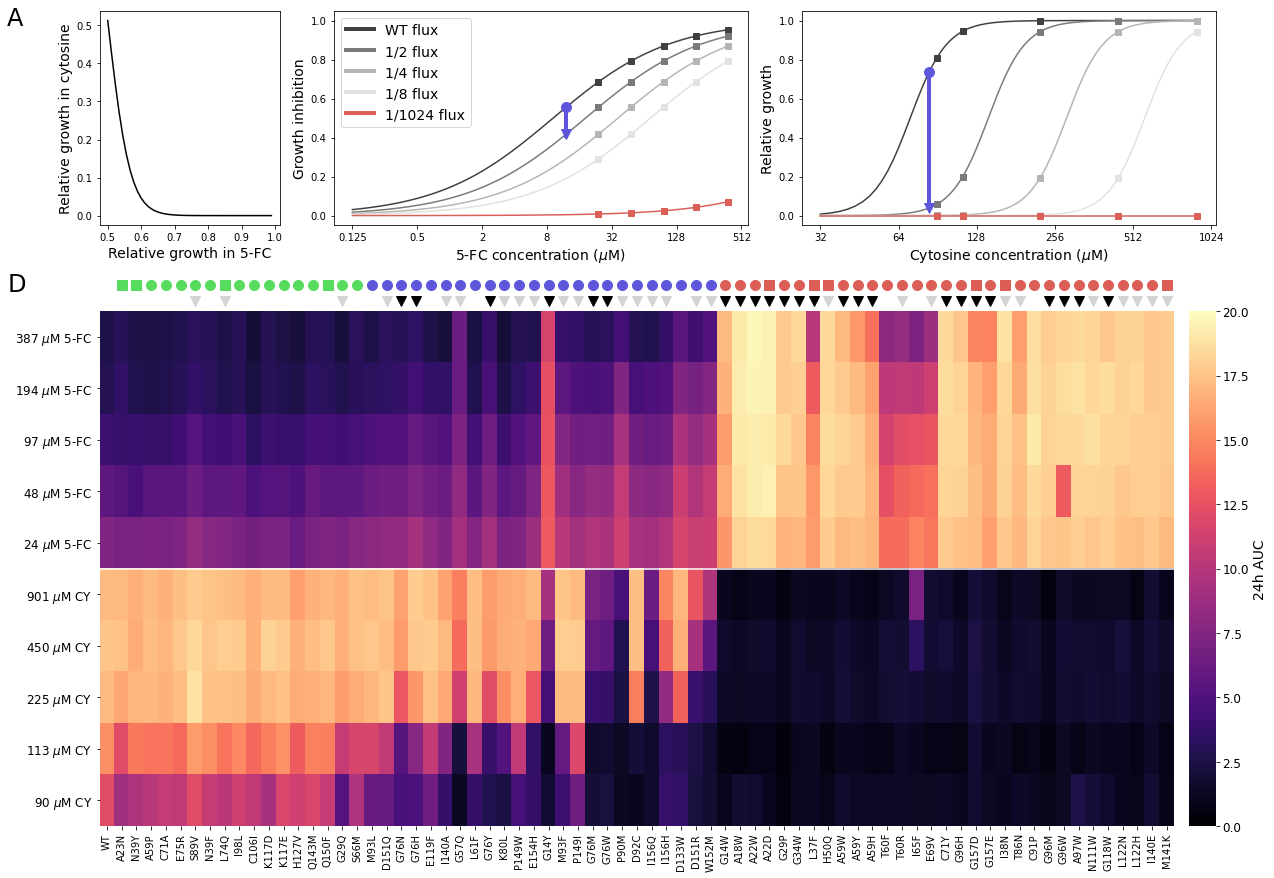

In [531]:
fig = plt.figure(figsize=(20,15))

gs = gridspec.GridSpec(3, 5)

gs.update(hspace=0.4, wspace=0.3 ) # set the spacing between axes

ax1 = fig.add_subplot(gs[0, 0])

plt.plot(fc_vals, cy_vals, 'k')

plt.xlabel('Relative growth in 5-FC', fontsize=14)
plt.ylabel('Relative growth in cytosine', fontsize=14)

ax2 = fig.add_subplot(gs[0, 1:3])

x_vals = np.logspace(np.log2(0.125),np.log2(390), num=100, base=2)


for dim in range(0,5):
    
    plt.plot(x_vals, [hill_equation(x/f_red[dim], 9.1395844 , 0.80356349) for x in x_vals], color=colors[dim], alpha=1)
    plt.plot(fc_conc, [ hill_equation(x/f_red[dim], 9.1395844 , 0.80356349) for x in fc_conc], color=colors[dim], marker='s', linestyle='none')
    
plt.xscale('log', base=2)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4),
                Line2D([0], [0], color=colors[3], lw=4),
                Line2D([0], [0], color=mut_colors['Nonsense-like'], lw=4)]
plt.legend(custom_lines, ['WT flux', '1/2 flux', '1/4 flux', '1/8 flux', '1/1024 flux'], loc='upper left', fontsize=14)

plt.xlabel('5-FC concentration ($\mu$M)', fontsize=14)
plt.ylabel('Growth inhibition', fontsize=14)
plt.ylim(-0.05, 1.05)

plt.xticks([0.125,0.5,2,8,32,128,512], labels = [0.125,0.5,2,8,32,128,512])

mid_decrease = hill_equation(12/2, 9.1395844, 0.80356349)

plt.axvline(x=12, ymin=mid_decrease, ymax=hill_equation(12, 9.1395844, 0.80356349), color=mut_colors['Front minima'], lw=4)
plt.plot(12, mid_decrease, marker="v", color=mut_colors['Front minima'], ms=10)
plt.plot(12, hill_equation(12, 9.1395844, 0.80356349), marker="o", color=mut_colors['Front minima'], ms=10)    


ax3 = fig.add_subplot(gs[0, 3:5])###########################


for dim in range(0,5):
    
    plt.plot(np.linspace(32,900,300), [hill_equation(x/f_red[dim],70.96510207, 6.10323637) for x in np.linspace(32,900,300)], color=colors[dim], alpha=1)
    plt.plot(cy_conc, [ hill_equation(x/f_red[dim], 70.96510207, 6.10323637) for x in cy_conc], color=colors[dim], marker='s', linestyle='none')
    
mid_decrease = hill_equation(84/2, 70.96510207, 6.10323637)
   
plt.plot([84,84], [mid_decrease, hill_equation(84, 70.96510207, 6.10323637)], color=mut_colors['Front minima'], lw=4, linestyle='-', marker='')
plt.plot(84, hill_equation(84, 70.96510207, 6.10323637), marker="o", color=mut_colors['Front minima'], ms=10)    
plt.plot(84, mid_decrease, marker="v", color=mut_colors['Front minima'], ms=10)    

plt.xscale('log', base=2)

plt.xticks([32,64,128,256,512,1024], labels = [32,64,128,256,512,1024])

plt.xlabel('Cytosine concentration ($\mu$M)', fontsize=14)
plt.ylabel('Relative growth', fontsize=14)
plt.ylim(-0.05, 1.05)






########## panel D: mutant titration
ax4 = fig.add_subplot(gs[1:3, 0:5])

source_ax4 = pd.read_csv('./combined_auc.csv', sep=',', index_col=0)
# get source data

divider = make_axes_locatable(ax4)
cax = divider.new_horizontal(size="2.5%", pad=0.2, pack_start=False)
fig.add_axes(cax)
# add ax for colorbar

ytick_labels = []
for y in source_ax4.index:
    
    if 'FC' in y:
        ug = float(y.split('_')[0])
        molar = int(np.round(convert_to_uM(ug, mass_mol_FC)))
        string = str(molar)+r' $\mu$M 5-FC'
        ytick_labels.append(string)
        
    else:
        ug = float(y.split('_')[0])
        molar = int(np.round(convert_to_uM(ug, mass_mol_CY)))
        string = str(molar)+r' $\mu$M CY'
        ytick_labels.append(string)
        
# convert to molar and format labels
        
g = sns.heatmap(source_ax4, cmap='magma', vmin=0, vmax=20, ax=ax4, cbar_ax=cax, cbar_kws={'label':'24h AUC'}, yticklabels=ytick_labels)
#plot heatmap

g.set_yticklabels(ytick_labels, size = 12)

g.figure.axes[-1].yaxis.label.set_size(14)

ax4.axhline(5, color='w')

plt.yticks(fontsize=12)

for col in source_ax4.columns:
    
    x_pos = list(source_ax4).index(col)+0.5
    
    if col == 'WT':
        
        ax4.plot(x_pos, -0.6, marker='o', color='w', zorder=9, ms=10, clip_on=False)
    else:
        
        wt = col[0]
        
        measured = col[-1] 
        
        pos = int(col[1:-1])
        
        row = validations_result_hap[(validations_result_hap['wt']==wt)&(validations_result_hap['codon']==pos)&(validations_result_hap['measured']==measured)].index[0]
        
        mut_type = validations_result_hap.loc[row]['mut_reclass']
        
        is_escape = validations_result_hap.loc[row]['Escape outlier']
        
        color=mut_colors[mut_type]
        
        ax4.plot(x_pos, -0.5, marker=markers_dict[is_escape], color=color, zorder=9, clip_on=False,  ms=10)
        
        
        ddg= validations_result_hap.loc[row]['ddG_struc_HET']
        
        if ddg >=1 and ddg <=5:
            
            ax4.plot(x_pos, -0.20, marker='v', color='lightgrey', zorder=9, clip_on=False,  ms=10)
            
        elif ddg > 5:
            ax4.plot(x_pos, -0.20, marker='v', color='k', zorder=9, clip_on=False,  ms=10)
            
            



ax1.text(0.2,0.5, 'A', fontsize=24)

#ax1.text(1.03,0.5, 'B', fontsize=24)

#ax1.text(2.43,0.5, 'C', fontsize=24)


ax1.text(0.2,-0.2, 'D', fontsize=24)



#ax1.text(-3.55,-9.5, 'D', fontsize=28)

plt.savefig('./figures/figure5noletter.pdf', format='pdf', dpi=300)

In [321]:
mid_decrease

0.039118292763566716

In [322]:
mut_colors

{'Silent-like': (0.33999999999999997, 0.86, 0.3712),
 'Nonsense-like': (0.86, 0.3712, 0.33999999999999997),
 'Front minima': (0.3712, 0.33999999999999997, 0.86),
 'Other': 'lightgrey'}

In [323]:
convert_to_uM(0.024, mass_mol_FC)

0.18591680223100163